# 파이널 프로젝트 : 은행 이탈 고객 예측



- **분류**
- 회귀

- 데이터
    - URL : https://www.kaggle.com/competitions/playground-series-s4e1
    - train : 훈련 데이터 세트
    - test : 테스트 데이터 세트
    - sample_submission : 올바른 형식의 샘플 제출 파일

- 평가 지표
    - ROC Curve


- 변수
    - Features(X)
        - ID : 순번
        - Customer ID: 각 고객의 고유 식별번호
        - Surname: 고객의 성
        - Credit Score: 고객의 신용점수
        - Geography: 고객이 거주하는 국가
        - Gender: 고객의 성별
        - Age: 고객의 나이
        - Tenure: 고객이 은행을 이용한 기간
        - Balance: 고객의 계좌 잔액
        - NumOfProducts: 고객이 이용하는 은행 상품의 수(ex. 예금,적금)
        - HasCrCard: 신용카드 보유 여부
        - IsActiveMember: 활성 회원 여부
        - EstimatedSalary: 고객의 예상 연봉
    - Target(Y)
        - Exited: 고객 이탈 여부







## 1.전처리

### 패키지

#### 먼저 설치 후 재시작해야하는 패키지

In [1]:
!pip install pycaret
!pip install optuna
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 21.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 27.7 MB/s eta 0:00:00
   ━━━━━

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.6/383.6 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


#### 일반 패키지

In [1]:
# 기본 패키지
import pandas as pd
import numpy as np

# 설정
pd.set_option('display.max_columns', None)  # 최대 컬럼 설정

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 출력 관련(이미지 표시)
from IPython.display import Image

# 계층적 클러스터링
import scipy.cluster.hierarchy as sch  # 계층적 군집화 알고리즘

# 데이터 전처리
## 인코딩
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder # pd.get_dummies로 OneHotEncoder 대체
## 스케일링
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# 데이터 분할
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# 다중공선성 확인(VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

# PyCaret: AutoML (자동화된 머신러닝 워크플로우, 모델 선택)
from pycaret.classification import *

# Optuna: 하이퍼파라미터 최적화
import optuna
from optuna.samplers import TPESampler  # 샘플링 알고리즘 (TPE)

# 머신러닝 모델
## GBR
from sklearn.ensemble import GradientBoostingClassifier
## AdaBoost
from sklearn.ensemble import AdaBoostClassifier
## LightGBM
from lightgbm import LGBMClassifier
import lightgbm as lgb
## DecisionTree
from sklearn.tree import DecisionTreeClassifier
## XGBoost
from xgboost import XGBClassifier
import xgboost as xgb
## CatBoost
from catboost import CatBoostClassifier, Pool # pool : catboost에서 데이터 관리위한 특수 클래스(데이터 컨테이너), 범주 변수 자동 인식, 데이터 빠른 처리 등
from catboost.utils import eval_metric

# 성능 평가 지표
from sklearn.metrics import roc_auc_score  # ROC AUC 점수 계산

# 모델 앙상블
from sklearn.ensemble import VotingClassifier  # 앙상블 학습을 위한 VotingClassifier

# 조합 생성 함수
from itertools import combinations

# 변수 중요도
from sklearn.inspection import permutation_importance

### 피쳐요약표


- 타입
- 고유값수
- 타입
- 고유값수
- 결측치수
- 중복치수
- 최소값
- 최대값
- 예시1
- 예시2

In [2]:
# 피쳐요약표
def feature_summary(df):
  df_temp = pd.DataFrame()
  df_temp['타입'] = df.dtypes
  df_temp['고유값수'] = df.nunique()
  df_temp['결측치수'] = df.isnull().sum()
  df_temp['중복치수'] = df.apply(lambda x: x.duplicated().sum())
  df_temp['최소값'] = df.min()
  df_temp['최대값'] = df.max()
  df_temp['예시1'] = df.iloc[0]
  df_temp['예시2'] = df.iloc[1]
  return df_temp

### 데이터 불러오기
- train
- test
- submission

In [3]:
train = pd.read_csv('/content/drive/MyDrive/파이널 프로젝트_이정수/분류/train.csv')
test = pd.read_csv('/content/drive/MyDrive/파이널 프로젝트_이정수/분류/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/파이널 프로젝트_이정수/분류/sample_submission.csv')

#### 데이터 파악

##### 데이터 크기



- train
    - 데이터 : 165034
    - 변수 : 14
- test
    - 데이터 : 110023
    - 변수 : 13
- submission
    - 데이터 : 110023
    - 변수 : 2

In [4]:
for i in [train, test,submission] :
  print(i.shape)

(165034, 14)
(110023, 13)
(110023, 2)


##### 데이터 타입, 결측

- **train**
  - 결측치
      - 0개
  - 타입
      - Int64, float64 : 11개
      - object : 3개
          - Surname : 고객의 성
          - Geography : 고객이 거주하는 국가
          - Gender : 고객의 성별
- **test**
  - 결측치
      - 0개
  - 타입
      - train과 동일(Exited 제외)
- **submission**
  - 결측치
      - 0개
  - 타입
      - int64, float64

#### 시각화
- **Barplot**
    - Surname : 범주형 변수이지만 고유값 수가 2797개로 부적합
    - Geography
    - Gender
    - NumOfProducts
    - HasCrCard
    - IsActiveMember
    - Exited
- **Histplot, 밀도추정그래프, BoxPlot, ScatterPlot**
    - CreditScore
    - Age
    - Tenure
    - Balance
    - EstimatedSalary

- **상관관계 히트맵**

##### 시각화 함수 생성

In [5]:
# 1. BarPlot
def custom_barplot(ax, count):
    for bar in ax.patches:                                                            # ax.patches : 그래프 그려지는 모든 도형 요소
        if bar.get_height() == 0: continue                                            # 막대의 높이가 0이면 건너뜀
        rate = bar.get_height() / count * 100                                         # 백분율 계산

        ax.text(x=bar.get_x() + bar.get_width() / 2,                                  # 막대의 중앙 위치 : bar.get_x(막대의 왼쪽 x좌표), bar.get_width(막대의 너비 = 가로 길이)
                y=bar.get_height() + count * 0.005,                                   # 막대 위쪽에 텍스트 위치 : bar.get_height(막대의 높이 = 세로 길이)
                s=f'{rate:1.1f}%', ha='center')                                       # 비율 텍스트 추가

    ax.set_ylabel('')                                                                 # y축 레이블 제거
    return ax                                                                         # 수정된 Axes 객체 반환

# 2. Histogram
def custom_histogram(ax, data):
    mean = data.mean()                                                                # 데이터 평균 계산
    ax.text(x=ax.get_xlim()[0] + 0.05 * (ax.get_xlim()[1] - ax.get_xlim()[0]),        # 왼쪽 여백
            y=max([bar.get_height() for bar in ax.patches]) * 0.85,                   # y 위치 조정
            s=f'Mean: {mean:.2f}', ha='left', color='red')                            # 평균값 표시

    ax.set_ylabel('')                                                                 # y축 레이블 제거
    return ax                                                                         # 수정된 Axes 객체 반환

# 3. Box Plot
def custom_boxplot(ax, data):
    y_median = np.median(data)                                                        # 중앙값 계산
    ax.text(x=1.02, y=y_median, s=f'Median: {y_median:.2f}', ha='left', color='red')  # 중앙값 표시


##### train 시각화


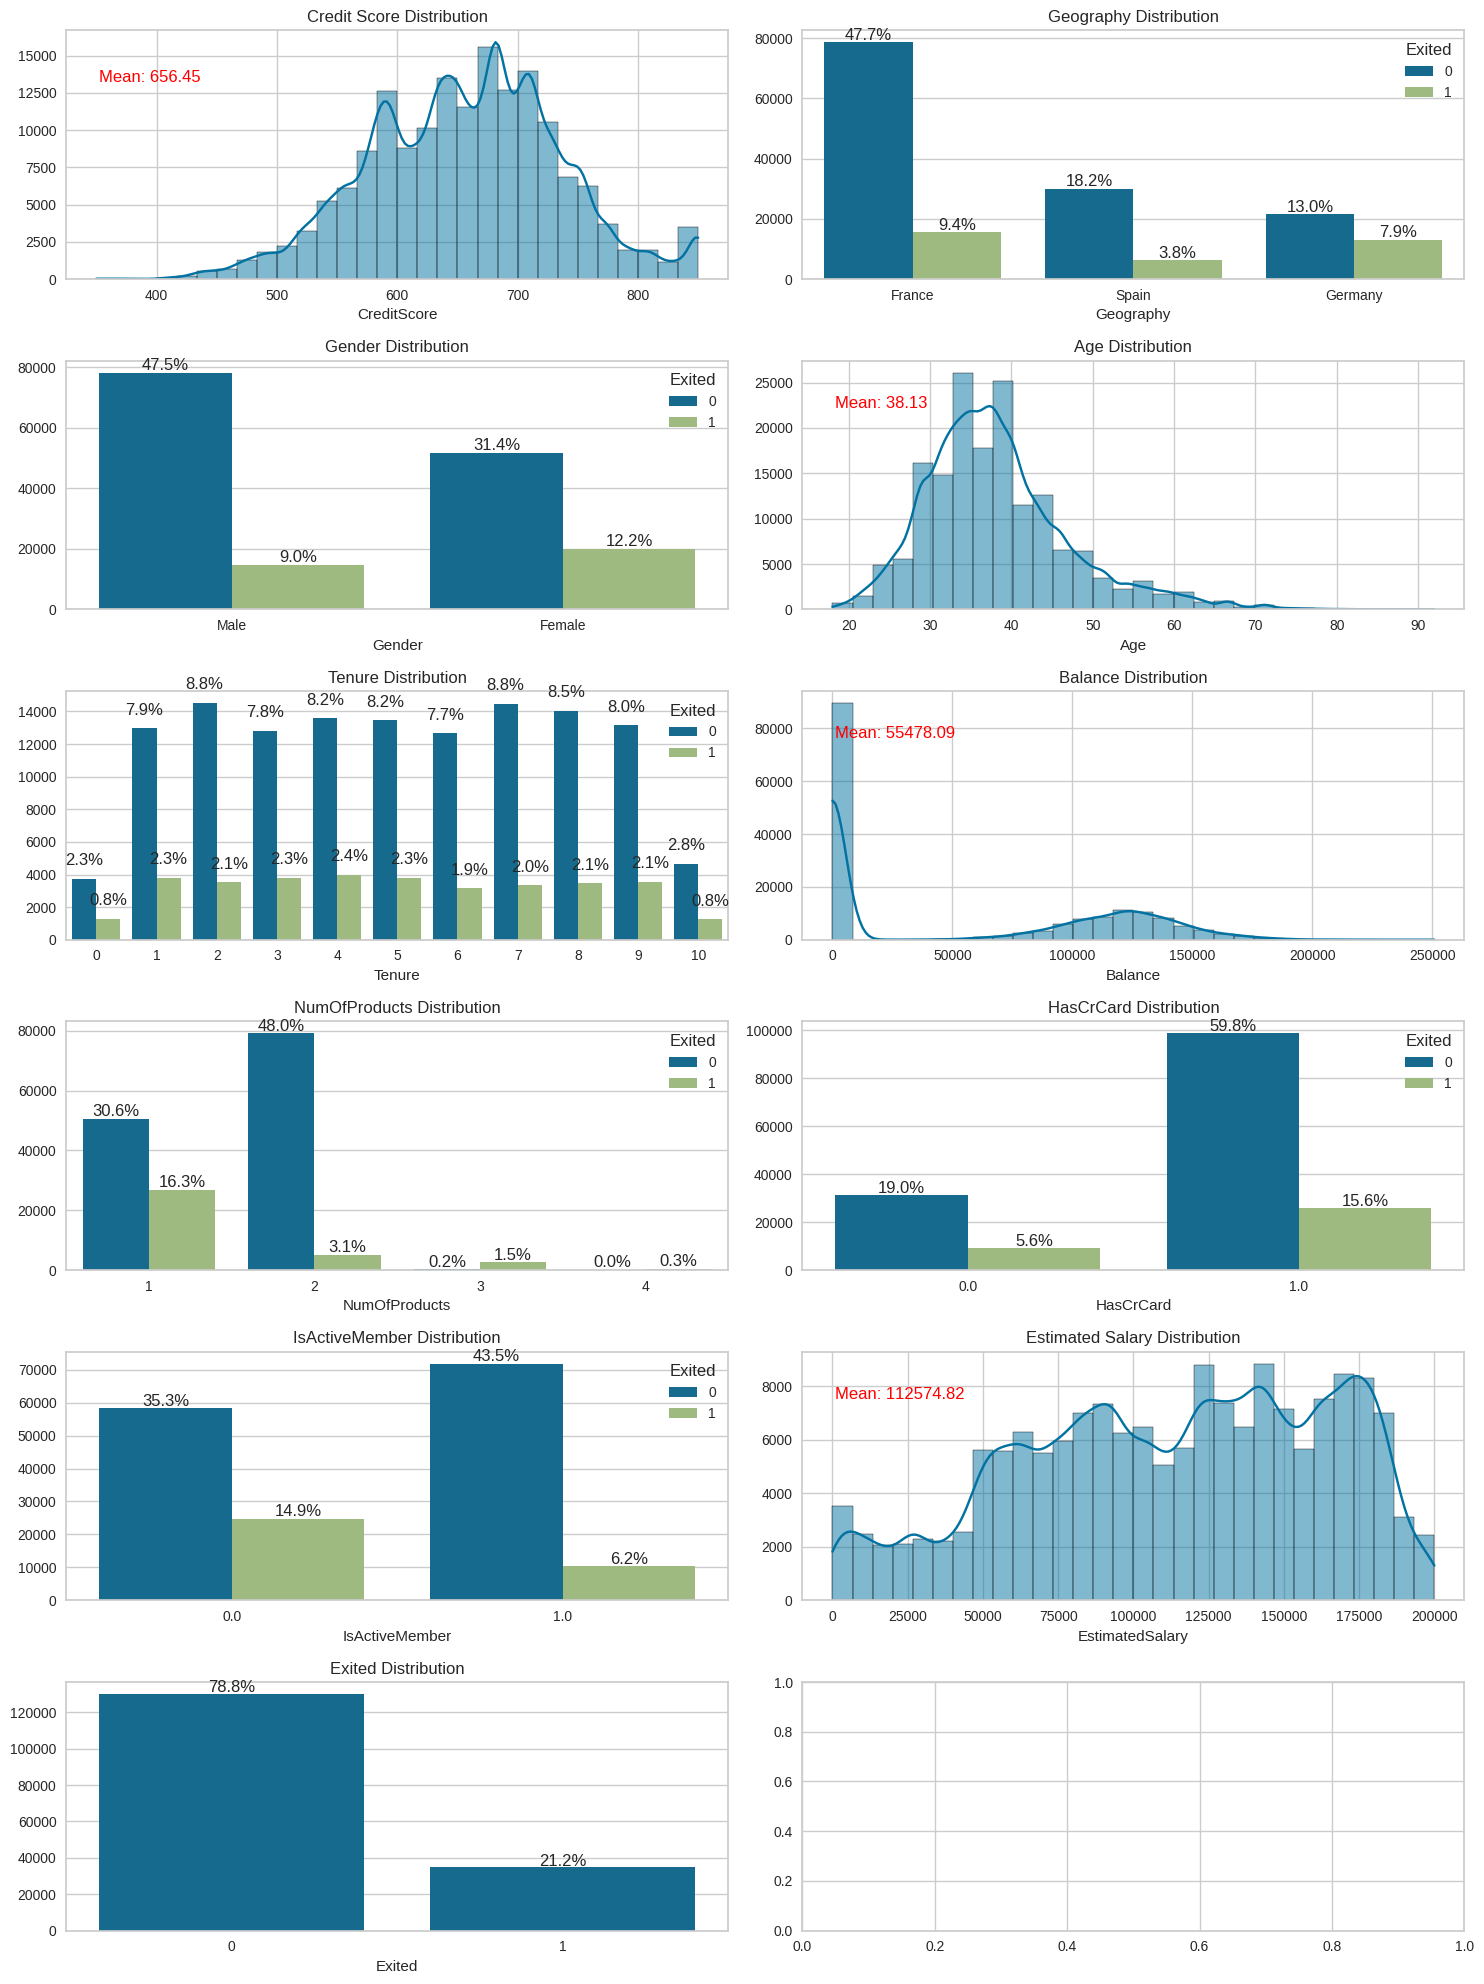

In [ ]:
fig, axes = plt.subplots(6, 2, figsize=(15, 20))

# Credit Score Distribution
sns.histplot(train['CreditScore'], bins=30, kde=True, ax=axes[0, 0])
custom_histogram(axes[0, 0], train['CreditScore'])  # CreditScore 데이터 전달
axes[0, 0].set_title('Credit Score Distribution')

# Geography Distribution
ax_geo = sns.countplot(data=train, x='Geography', hue='Exited', ax=axes[0, 1])
custom_barplot(ax_geo, train.shape[0])  # 비율 추가
axes[0, 1].set_title('Geography Distribution')

# Gender Distribution
ax_gender = sns.countplot(data=train, x='Gender', hue='Exited', ax=axes[1, 0])
custom_barplot(ax_gender, train.shape[0])  # 비율 추가
axes[1, 0].set_title('Gender Distribution')

# Age Distribution
sns.histplot(train['Age'], bins=30, kde=True, ax=axes[1, 1])
custom_histogram(axes[1, 1], train['Age'])  # Age 데이터 전달
axes[1, 1].set_title('Age Distribution')

# Tenure Distribution
ax_tenure = sns.countplot(data=train, x='Tenure', hue='Exited', ax=axes[2, 0])
custom_barplot(ax_tenure, train.shape[0])  # 비율 추가
axes[2, 0].set_title('Tenure Distribution')

# Balance Distribution
sns.histplot(train['Balance'], bins=30, kde=True, ax=axes[2, 1])
custom_histogram(axes[2, 1], train['Balance'])  # Balance 데이터 전달
axes[2, 1].set_title('Balance Distribution')

# NumOfProducts Distribution
ax_num_products = sns.countplot(data=train, x='NumOfProducts', hue='Exited', ax=axes[3, 0])
custom_barplot(ax_num_products, train.shape[0])  # 비율 추가
axes[3, 0].set_title('NumOfProducts Distribution')

# HasCrCard Distribution
ax_has_crcard = sns.countplot(data=train, x='HasCrCard', hue='Exited', ax=axes[3, 1])
custom_barplot(ax_has_crcard, train.shape[0])  # 비율 추가
axes[3, 1].set_title('HasCrCard Distribution')

# IsActiveMember Distribution
ax_active_member = sns.countplot(data=train, x='IsActiveMember', hue='Exited', ax=axes[4, 0])
custom_barplot(ax_active_member, train.shape[0])  # 비율 추가
axes[4, 0].set_title('IsActiveMember Distribution')

# Estimated Salary Distribution
sns.histplot(train['EstimatedSalary'], bins=30, kde=True, ax=axes[4, 1])
custom_histogram(axes[4, 1], train['EstimatedSalary'])  # Estimated Salary 데이터 전달
axes[4, 1].set_title('Estimated Salary Distribution')

# Exited Distribution
ax_exited = sns.countplot(data=train, x='Exited', ax=axes[5, 0])
custom_barplot(ax_exited, train.shape[0])  # 비율 추가
axes[5, 0].set_title('Exited Distribution')

plt.tight_layout()
plt.show()

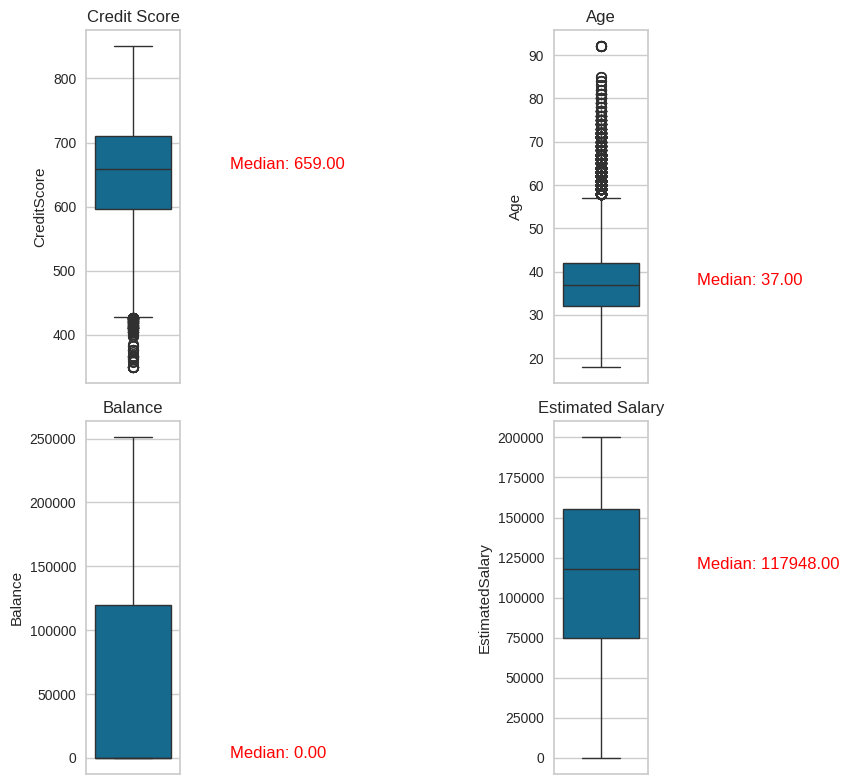

In [ ]:
# 박스플롯을 그릴 수직 축 배열 설정
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Credit Score 박스플롯
sns.boxplot(y=train['CreditScore'], ax=axes[0, 0])
custom_boxplot(axes[0, 0], train['CreditScore'])  # 중앙값 텍스트 추가
axes[0, 0].set_title('Credit Score')

# Age 박스플롯
sns.boxplot(y=train['Age'], ax=axes[0, 1])
custom_boxplot(axes[0, 1], train['Age'])  # 중앙값 텍스트 추가
axes[0, 1].set_title('Age')

# Balance 박스플롯
sns.boxplot(y=train['Balance'], ax=axes[1, 0])
custom_boxplot(axes[1, 0], train['Balance'])  # 중앙값 텍스트 추가
axes[1, 0].set_title('Balance')

# Estimated Salary 박스플롯
sns.boxplot(y=train['EstimatedSalary'], ax=axes[1, 1])
custom_boxplot(axes[1, 1], train['EstimatedSalary'])  # 중앙값 텍스트 추가
axes[1, 1].set_title('Estimated Salary')

plt.tight_layout()  # 그래프 사이의 간격을 조정하여 보기 좋게 배치
plt.show()

###### train 시각화 해석

- BarPlot, HistPlot 해석
    - **Credit Score(신용점수)**
        - 평균
            - 656.45
        - 분포
            - 대체로 정규분포 형태
            - 신용 점수 분포가 넓게 퍼져있어 다양한 점수 분포
            - 신용점수가 600-700 사이에 가장 많은 고객이 분포

    - **Geography(고객 거주 국가)**
        - 분포
            - France가 전체의 57.1%로 가장 많고, 그 다음 Spain 22%, Germany 20.9% 순서
        - 이탈
            - 세 국가 모두 이탈하지 않은 고객(0)이 이탈 고객(1)보다 많다
                - 프랑스는 이탈 비율이 낮고, 독일은 상대적으로 높은 이탈율을 보인다

    - **Gender(고객 성별)**
        - 분포
            - 남성이 약 56.5%, 여성이 43.6%로 대략 6:4 비율
        - 이탈
            - 남성, 여성 모두 이탈하지 않은 사람(0)이 이탈자(1)보다 많다
                - 남성보다 여성이 이탈 비율이 더 높다

    - **Age(고객 연령)**
        - 평균
            - 38.13
        - 분포
            - 대체로 정규분포 형태
            - 30,40대에 주 고객층이 모여있다
            - 나이가 많을 수록 고객 수가 급격히 감소하는 경향
                - 젊은 고객층(30-40대)에서 고객수가 집중

    - **Tenure(은행 이용 기간)**
        - 분포
            - 모든 기간에 고객수가 고르게 분포되어 있지만, 0년과 10년에 소폭 감소
        - 이탈
            - 이용 기간에 관계없이 이탈하지 않은 사람이(0)이 이탈자(1) 보다 많다

    - **Balance(계좌잔액)**
        - 평균
            - 55478.09
        - 분포
            - 0인 경우가 가장 많으며, 0을 제외한 나머지 값들은 정규분포에 가깝게 분포
            - 주로 50,000~200,000 구간에 집중

    - **NumOfProducts(고객 이용 은행 상품 수)**
        - 분포
            - 1개 또는 2개 상품을 보유한 고객이 대부분
                - 1개(46.9%), 2개(51.1%)
        - 이탈
            - 상품 개수가 1개인 고객의 이탈 비율이 상대적으로 높다

    - **HasCrCard(신용카드 보유 여부)**
        - 분포
            - 신용카드 보유 고객(1)이 75.4%, 비보유 고객(0)이 24.6%의 분포로 보유한 고객이 더 많다
        - 이탈
            - 신용카드 보유 여부와 관계없이 이탈하지 않은 고객이 더 많다.

    - **IsActiveMemebr(활성 회원 여부)**
        - 분포
          - 비활성회원이 50.2%, 활성회원이 49.7%로 차이가 매우 적었다.
        - 이탈
            - 비활성 회원의 이탈율이 더 높다.

    - **EstimatedSalary(추정 연봉)**
        - 평균
            - 112574.82
        - 분포
            - 급여가 0에서 200000까지 고르게 분포
                - 주요 구간 : 50000 - 175000

    - **Exited(이탈 여부)**
        - 분포
            - 전체 고객 중 이탈하지 않은 사람(0)이 78.8%, 이탈자(1)는 21.2%로 대략 8:2 비율
            
- BoxPlot 해석
    - CreditScore
        - 이상치
            - O
            - 신용 점수 하단에 이상치 다수 존재
                - 특히 400이하 낮은 점수 고객, 점수가 낮은 일부 고객층 포함
        - 중앙값
            - 659
        - 분포
            - 약간 오른쪽으로 치우친 분포
                - 왼쪽꼬리

    - Age
        - 이상치
            - O
            - 60 이상의 나이에서 이상치 다수 존재
                - 특히 80세 이상 고객이 드물게 포함, 고령층 소수 포함
        - 중앙값
            - 37
        - 분포
            - 오른쪽 긴 꼬리
    - Balance
        - 이상치
            - X
        - 중앙값
            - 0
    - EstimatedSalary
        - 이상치
            - X
        - 중앙값
            - 117,948

##### test 시각화


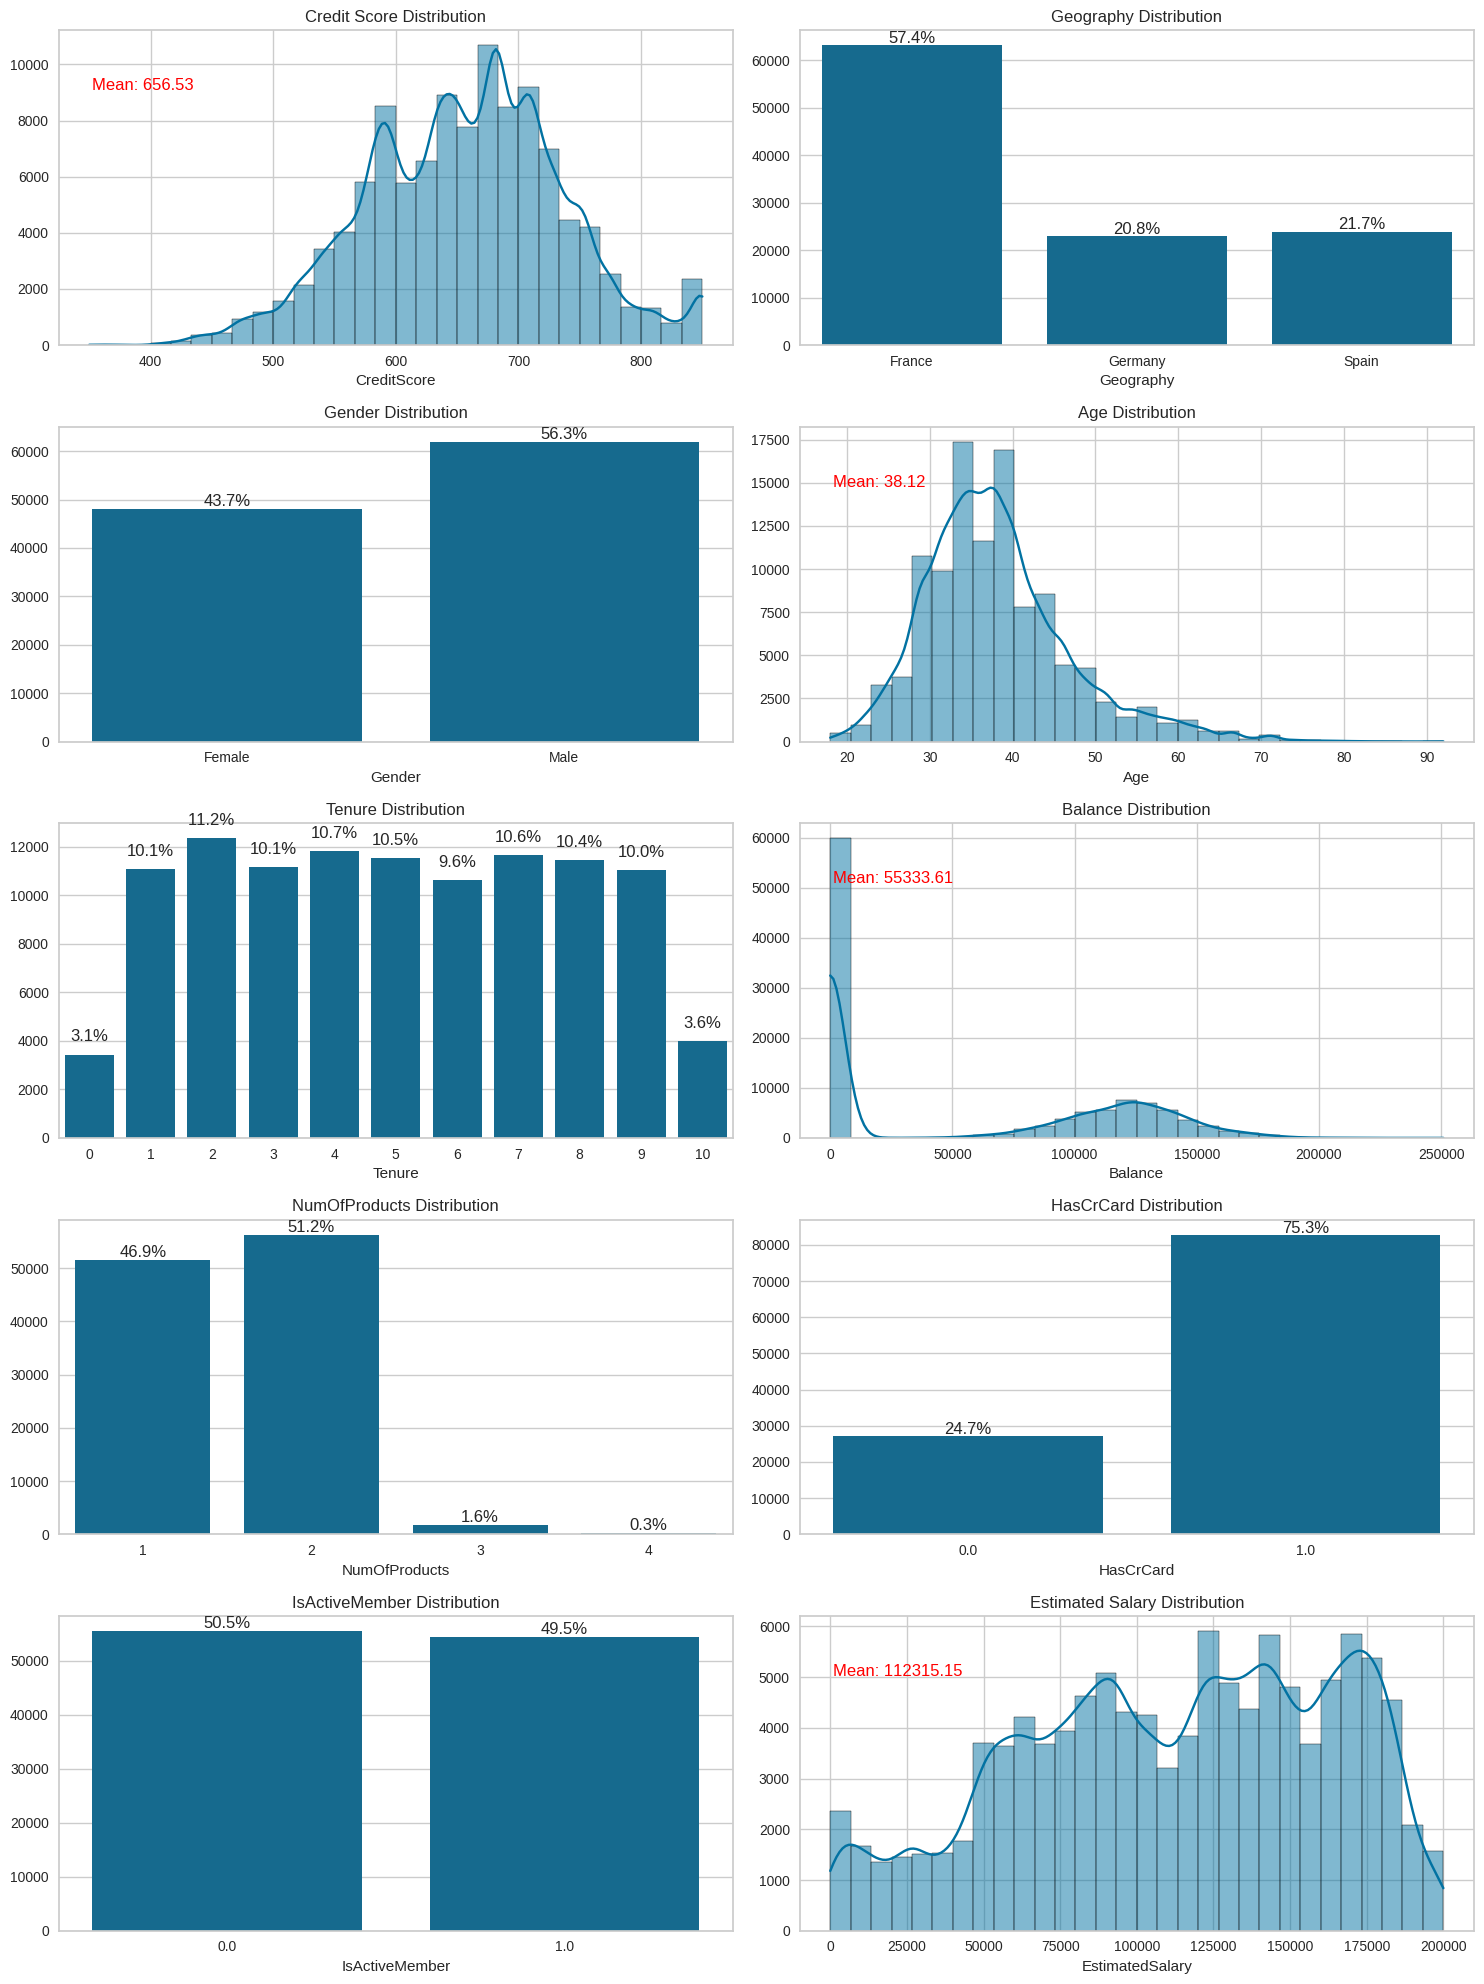

In [ ]:
fig, axes = plt.subplots(5, 2, figsize=(15, 20))

# Credit Score Distribution
sns.histplot(test['CreditScore'], bins=30, kde=True, ax=axes[0, 0])
custom_histogram(axes[0, 0], test['CreditScore'])  # CreditScore 데이터 전달
axes[0, 0].set_title('Credit Score Distribution')

# Geography Distribution (without hue)
ax_geo = sns.countplot(data=test, x='Geography', ax=axes[0, 1])
custom_barplot(ax_geo, test.shape[0])  # 비율 추가
axes[0, 1].set_title('Geography Distribution')

# Gender Distribution (without hue)
ax_gender = sns.countplot(data=test, x='Gender', ax=axes[1, 0])
custom_barplot(ax_gender, test.shape[0])  # 비율 추가
axes[1, 0].set_title('Gender Distribution')

# Age Distribution
sns.histplot(test['Age'], bins=30, kde=True, ax=axes[1, 1])
custom_histogram(axes[1, 1], test['Age'])  # Age 데이터 전달
axes[1, 1].set_title('Age Distribution')

# Tenure Distribution (without hue)
ax_tenure = sns.countplot(data=test, x='Tenure', ax=axes[2, 0])
custom_barplot(ax_tenure, test.shape[0])  # 비율 추가
axes[2, 0].set_title('Tenure Distribution')

# Balance Distribution
sns.histplot(test['Balance'], bins=30, kde=True, ax=axes[2, 1])
custom_histogram(axes[2, 1], test['Balance'])  # Balance 데이터 전달
axes[2, 1].set_title('Balance Distribution')

# NumOfProducts Distribution (without hue)
ax_num_products = sns.countplot(data=test, x='NumOfProducts', ax=axes[3, 0])
custom_barplot(ax_num_products, test.shape[0])  # 비율 추가
axes[3, 0].set_title('NumOfProducts Distribution')

# HasCrCard Distribution (without hue)
ax_has_crcard = sns.countplot(data=test, x='HasCrCard', ax=axes[3, 1])
custom_barplot(ax_has_crcard, test.shape[0])  # 비율 추가
axes[3, 1].set_title('HasCrCard Distribution')

# IsActiveMember Distribution (without hue)
ax_active_member = sns.countplot(data=test, x='IsActiveMember', ax=axes[4, 0])
custom_barplot(ax_active_member, test.shape[0])  # 비율 추가
axes[4, 0].set_title('IsActiveMember Distribution')

# Estimated Salary Distribution
sns.histplot(test['EstimatedSalary'], bins=30, kde=True, ax=axes[4, 1])
custom_histogram(axes[4, 1], test['EstimatedSalary'])  # Estimated Salary 데이터 전달
axes[4, 1].set_title('Estimated Salary Distribution')

plt.tight_layout()
plt.show()


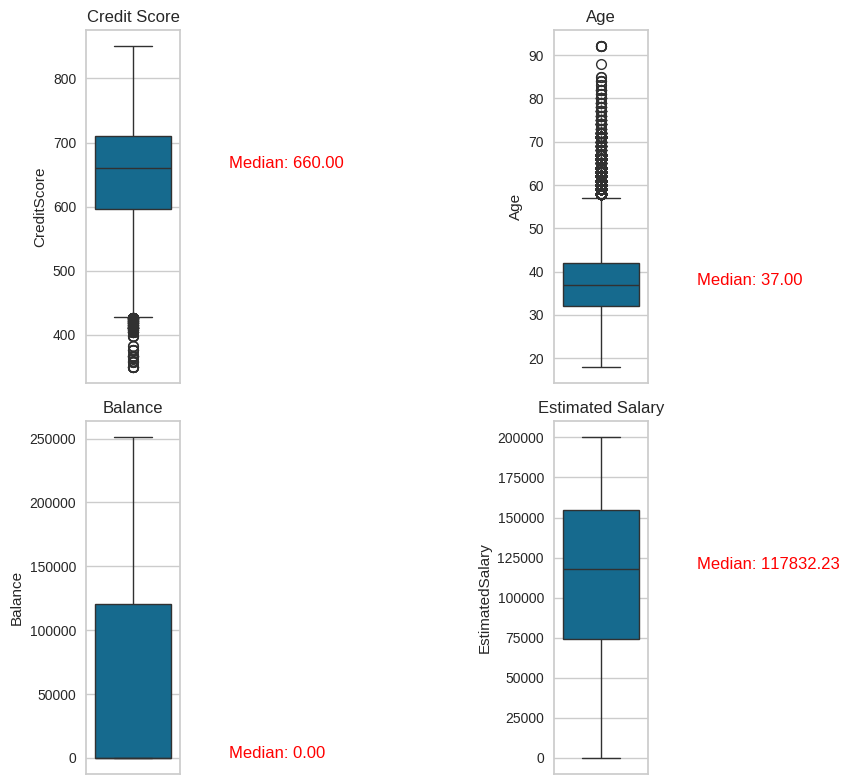

In [ ]:
# 박스플롯을 그릴 수직 축 배열 설정
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Credit Score 박스플롯
sns.boxplot(y=test['CreditScore'], ax=axes[0, 0])
custom_boxplot(axes[0, 0], test['CreditScore'])  # 중앙값 텍스트 추가
axes[0, 0].set_title('Credit Score')

# Age 박스플롯
sns.boxplot(y=test['Age'], ax=axes[0, 1])
custom_boxplot(axes[0, 1], test['Age'])  # 중앙값 텍스트 추가
axes[0, 1].set_title('Age')

# Balance 박스플롯
sns.boxplot(y=test['Balance'], ax=axes[1, 0])
custom_boxplot(axes[1, 0], test['Balance'])  # 중앙값 텍스트 추가
axes[1, 0].set_title('Balance')

# Estimated Salary 박스플롯
sns.boxplot(y=test['EstimatedSalary'], ax=axes[1, 1])
custom_boxplot(axes[1, 1], test['EstimatedSalary'])  # 중앙값 텍스트 추가
axes[1, 1].set_title('Estimated Salary')

plt.tight_layout()  # 그래프 사이의 간격을 조정하여 보기 좋게 배치
plt.show()

###### train 시각화 해석

- BarPlot, HistPlot 해석
    - - **Credit Score(신용점수)**
    - 평균
        - 656.53
    - 분포
        - 대체로 정규분포 형태
        - 신용 점수 분포가 넓게 퍼져있어 다양한 점수 분포
        - 신용점수가 600-700 사이에 가장 많은 고객이 분포

- **Geography(고객 거주 국가)**
    - 분포
        - France가 전체의 57.4%로 가장 많고, 그 다음 Spain 21.7%, Germany 20.8% 순서

- **Gender(고객 성별)**
    - 분포
        - 남성이 약 56.3%, 여성이 43.7%

- **Age(고객 연령)**
    - 평균
        - 38.12
    - 분포
        - 대체로 정규분포 형태
        - 30,40대에 주 고객층이 모여있다
        - 연령이 증가할수록 고객 수가 급격히 감소하는 경향
            - 젊은 고객층(30-40대)에서 고객수가 집중

- **Tenure(은행 이용 기간)**
    - 분포
        - 모든 기간에 고객수가 고르게 분포되어 있지만, 0년과 10년에 소폭 감소

- **Balance(계좌잔액)**
    - 평균
        - 55333.61
    - 분포
        - 0인 경우가 가장 많으며, 0을 제외한 나머지 값들은 정규분포에 가깝게 분포
        - 주로 50,000~200,000 구간에 집중

- **NumOfProducts(고객 이용 은행 상품 수)**
    - 분포
        - 1개 또는 2개 상품을 보유한 고객이 대부분
            - 1개(46.9%), 2개(51.2%)

- **HasCrCard(신용카드 보유 여부)**
    - 분포
        - 신용카드 보유 고객(1)이 73.3%, 비보유 고객(0)이 24.7%의 분포로 보유한 고객이 더 많다

- **IsActiveMemebr(활성 회원 여부)**
    - 분포
      - 비활성회원이 50.5%, 활성회원이 49.5%로 차이가 매우 적었다.

- **EstimatedSalary(추정 연봉)**
    - 평균
        - 112315.15
    - 분포
        - 급여가 0에서 200000까지 고르게 분포
            - 주요 구간 : 50000 - 175000
- BoxPlot 해석
    - CreditScore
        - 이상치
            - O
            - 신용 점수 하단에 이상치 다수 존재
                - 특히 400이하 낮은 점수 고객, 점수가 낮은 일부 고객층 포함
        - 중앙값
            - 660
        - 분포
            - 약간 오른쪽으로 치우친 분포
                - 왼쪽꼬리

    - Age
        - 이상치
            - O
            - 60 이상의 나이에서 이상치 다수 존재
                - 특히 80세 이상 고객이 드물게 포함, 고령층 소수 포함
        - 중앙값
            - 37
        - 분포
            - 오른쪽 긴 꼬리
    - Balance
        - 이상치
            - X
        - 중앙값
            - 0
    - EstimatedSalary
        - 이상치
            - X
        - 중앙값
            - 117,832.23

### 데이터 파악 후 전처리 계획

```
# ID, Surname 제거


# Credit Score => 로그 변환, 스케일링 진행 가능성
- 대체로 정규 분포
- 신용점수 하단에 이상치 다수 존재 -> 왼쪽꼬리
- 필요시 로그 변환 진행
- 분포가 넓게 퍼져있다 -> 필요시 스케일링 진행

# Geography => OneHot Encoding
- 문자형,범주형 변수 : 인코딩 진행
- 고유값 3개
- 순서 X
- OneHot Encoding 진행 가능성

# Gender => Label, Binary Encoding
- 문자형,범주형 변수 : 인코딩 진행
- 고유값 2개 : 라벨 인코딩 or 이진 인코딩

# Age => 로그 변환, 스케일링, 구간 변환 가능성
- 대체로 정규분포 형태
- 60세 이상 이상치 존재 -> 오른쪽 꼬리
- 필요시 로그 변환 진행
- 분포가 넓게 퍼져있다(20대 – 90대) -> 필요시 스케일링 진행
- 분포 30,40대 집중 / 60대 이상은 극소수 -> 이상치(60대 이상)들을 포함시키기 위해 age를 구간으로 사용할 가능성

# Tenure => 그대로 or Label Encoding
- 정수형,범주형 변수 : 그대로 사용 or Label Encoding(일관성 위해 인코딩 진행)
- 0년, 10년만 소폭 감소

# Balance => 로그변환, 스케일링, 이항변수, 클러스터링(범주형) 가능성
- 0인 경우가 매우 많고, 나머지가 정규분포에 가까움 -> 왼쪽 꼬리
- 필요시 로그 변환 혹은 스케일링
- 0 처리 -> 이항변수(범주형)로 만드는 방법
- 범주형(낮음, 중간, 높음) : 클러스터링

# NumOfProducts => OneHot Encoding 가능성
- 정수형, 범주형 변수
- 순서가 없다
- OneHot Encoding 가능성
- 1개(46.9%), 2개(51.1%)가 대부분

# HasCrCard => Label Encoding 가능성
- 정수형, 범주형 변수
- 순서 X
- 이진 변수
-> Label Encoding 적합 가능성(일관성 위해)


# IsActiveMember => Label Encoding 가능성
- 정수형, 범주형 변수
- 순서
- 이진 변수
-> LabelEncoding 적합해보임(일관성 위해)

# EstimatedSalary => 스케일링 가능성
- 분포가 넓게 퍼져있다(0-200000)
- 주요 구간 : 5000 - 175000
-> 스케일링 가능성

# Exited

```

### 전처리 진행
- 파생변수 O
- ID, Surname 제거
- 인코딩 O
- 이상치 확인
- 중복치 처리 O
- 스케일링 O
- 다중공선성 확인



#### 변수 제거
- Id, Surname

In [6]:
# train, test 동시 진행
## Id, Surname 제거
train.drop(columns=['id','Surname'],inplace=True)
test.drop(columns=['id','Surname'],inplace=True)

#### 이상치
- 그래프를 통한 이상치들은 의미상 제외하기엔 무리가 있으므로 유지
- 음수 존재 X
- 처리 할 값 X

In [7]:
# 음수 존재 여부 확인
for i in ['CreditScore','Age','Tenure','Balance','EstimatedSalary' ] :
  print(i ,':', train[i].min())

CreditScore : 350
Age : 18.0
Tenure : 0
Balance : 0.0
EstimatedSalary : 11.58


#### 중복치
- 동시에 중복 불가
    - **모든 값 중복**
        - 30개
        - 제거(train data만)
    - CustomerId 중복
        - 155733개
        - 고유값으로써 기능이 없으므로 중복치 유지

In [8]:
# 모든 열의 값이 동일한 중복치
train[train.duplicated(keep=False)].sort_values('CustomerId')

# CustomerId만 동일한 중복치
train[train.duplicated(subset=['CustomerId'],keep=False)].sort_values('CustomerId').shape[0]

# CustomerID 고유값 수
train['CustomerId'].nunique()

23221

##### 중복치 제거

In [9]:
train = train.drop_duplicates()

#### 파생변수_1

- 단일 모델 범주화_1
    - Age_group
        - 연령대(10살 단위)
        - 특이점
            - BoxPlot의 IQR을 통한 그룹 구분 추가
                - 10대
                - 20대
                - 30대
                - 40대
                - 50대 - 57세
                - 57세 초과
    - Balance_group
        - 0과 1

##### Age_group

In [10]:
# Age 이상치
## train, test : 57세부터 이상치로 확인

Q1 = np.quantile(train['Age'],0.25)
Q3 = np.quantile(train['Age'],0.75)
IQR = Q3-Q1

Outlier_Age_over = Q3 + 1.5*IQR
Outlier_Age_over

train[train['Age'] > 57].shape # 6391
train[train['Age'] < 57].shape # 157627


Q1_test = np.quantile(test['Age'],0.25)
Q3_test = np.quantile(test['Age'],0.75)
IQR_test = Q3-Q1

Outlier_Age_over_test = Q3 + 1.5*IQR_test
Outlier_Age_over_test

57.0

###### Age_group 생성


In [11]:
bins = [0,19,29,39,49,57,np.inf]
labels = [10,20,30,40,50,57]
train['Age_group'] = pd.cut(train['Age'], bins= bins,labels = labels,right=True)
test['Age_group'] = pd.cut(test['Age'], bins= bins,labels = labels,right=True)

##### Balance_group

In [12]:
# Balance 고유값 수
## - Balance = 0 : 89633
## - Balance != 0 : 75371
train[train['Balance'] == 0].shape # 89633
train[train['Balance'] != 0].shape # 75371

train['Balance'].min()  # 0
train['Balance'].max()  # 250898.09

train['Balance'].apply(lambda x: '0' if x == 0 else '1').value_counts()

,count
Balance,
0,89633
1,75371


###### Balance 생성



In [13]:
train['Balance_group'] = train['Balance'].apply(lambda x: 0 if x == 0 else 1)
test['Balance_group'] = test['Balance'].apply(lambda x: 0 if x == 0 else 1)

#### 로그변환 & 스케일링
```
- StandardScaler : Mean = 0, std = 1
    - 데이터 정규분포에 가까운 경우
    - 변수 크기 차이가 크고, 이상치 적을 때

- RobustScaler : Median, IQR 사용
    - 이상치 영향 최소화
    - 중앙값 기준으로 스케일링 하므로 분포가 비대칭적인 경우 효율
    - 데이터가 정규분포를 따르는 경우, StandarScaler만큼 효과적이지 않을 수 있다

- MinMaxScaler : Min = 0 , Max = 1 사이 스케일링
    - 데이터가 특정 범위내로 제한되어야 할 때
    - 값의 분포가 균등하지 않을때
    - 딥러닝 모델에서 주로 사용
    - 해석이 쉽다
    - 값의 분포를 유지하며 스케일링
    - 이상치에 민감
```

- Balance, Age : 로그변환
- CreditScore, Age, Balance, EstimatedSalary : 스케일링
    - CreditScore, Age
        - RobustScaler
    - Balance
        - MinMaxScaler
    - estimatedSalary
        - StandardScaler


In [14]:
scaled_features = {
    'CreditScore': RobustScaler(),
    'EstimatedSalary': StandardScaler(),
    'Age': ('log', RobustScaler()),        # 로그 변환 후 스케일링
    'Balance': ('log1p', MinMaxScaler())   # 로그 변환 후 스케일링
}

# 로그변환, 스케일링 적용
for feature, scaled_info in scaled_features.items() :
  if isinstance(scaled_info, tuple) :
    log_info, scaler = scaled_info
    if log_info == 'log' :
      train_feature = np.log(train[[feature]])
      test_feature = np.log(test[[feature]])
    elif log_info == 'log1p' :
      train_feature = np.log1p(train[[feature]])
      test_feature = np.log1p(test[[feature]])
  else :
    scaler = scaled_info
    train_feature = train[[feature]]
    test_feature = test[[feature]]

  # 스케일링 적용
  scaled_feature = feature + '_Scaled'
  train[scaled_feature] = scaler.fit_transform(train_feature)
  test[scaled_feature] = scaler.transform(test_feature)

#### 스케일링 후 시각화

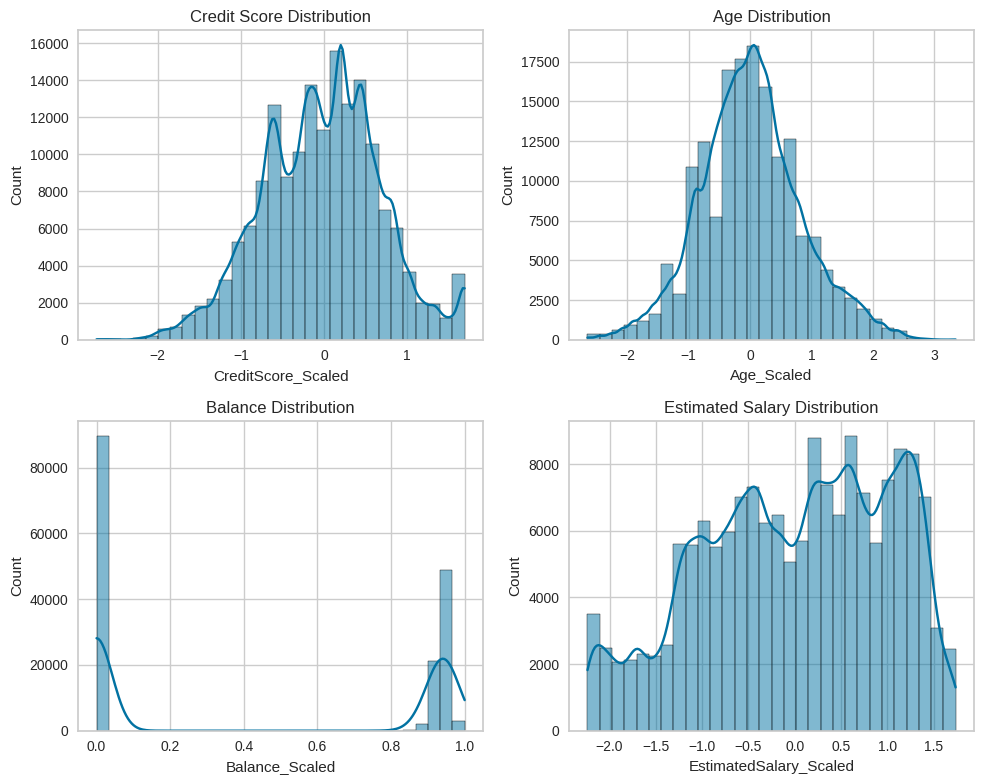

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# Credit Score Distribution
sns.histplot(train['CreditScore_Scaled'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Credit Score Distribution')

# Age Distribution
sns.histplot(train['Age_Scaled'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Age Distribution')

# Balance Distribution
sns.histplot(train['Balance_Scaled'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Balance Distribution')

# Estimated Salary Distribution
sns.histplot(train['EstimatedSalary_Scaled'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Estimated Salary Distribution')

plt.tight_layout()
plt.show()

#### 파생변수_2


##### 1.단일 모델 범주화

- NumOfProducts_group(0과 1, 나머지)

```
근거_1 : 이탈율이 3개와 4개가 극단적으로 높다. 1개 및 2개와 다른 성격을 지니고 있다 판단. 또한 이탈율이 높으므로 충분히 의미 있는 변수가 될 수 있다 판단.
train.groupby('NumOfProducts')['Exited'].mean()

                    Exited
NumOfProducts
1	              0.347122
2	              0.060421
3	              0.882516
4	              0.875789


근거_2 : 원본 모델링 모델에서 NumOfProducts의 feature_importance와 permutation_importance의 중요도가 상대적으로 높다. 따라서 의미있는 변수라 판단 -> 의미적으로 살리는 것이 좋아보임
<gbc feature_importance TOP 5>
Age: 0.326
NumOfProducts_2: 0.179
NumOfProducts_1: 0.141
IsActiveMember: 0.096
Balance: 0.063
Final_voting_model permutation importance TOP 5

<final_voting_model permutation_importance>
NumOfProducts_2: 0.158
Age: 0.088
IsActiveMember: 0.029
Balance: 0.024
NumOfProducts_1: 0.021

```


In [ ]:
train.groupby('NumOfProducts')['Exited'].mean()

,Exited
NumOfProducts,
1,0.347122
2,0.060421
3,0.882516
4,0.875789


###### 1_1. NumOfProducts_group 생성

In [16]:
def NumOfProducts_new_categorize(x) :
  if x == 1 :
    return 1
  elif x ==2 :
    return 2
  else :
    return 34

train['NumOfProducts_group'] = train['NumOfProducts'].apply(NumOfProducts_new_categorize)
test['NumOfProducts_group'] = test['NumOfProducts'].apply(NumOfProducts_new_categorize)

##### 2.유의미 변수 정리

- **이탈원인**
    - 수준 낮은 고객 서비스
        - Tenure, NumOfProducts, HasCrCard, IsActiveMember
    - 목표 시장에 대한 이해 부족(변화하는 고객 파악 X)
        - Age, Geography, Gender
    - 가격 최적화 결여(비싼가격)
        - Balance, EstimatedSalary
    - 제품의 시장 적합성 부족(제품이 타겟 고객 적합 X)
        - Tenure, Balance, EstimatedSalary, NumOfProducts, CreditScore
    - 참여도 결여(참여도가 낮은(구독 요금 안내는) 고객들 참여도와 제품 사용도 높이기)
        - IsActiveMember, NumOfProducts
    - 총 포함된 변수
        - Age, Balance, CreditScore,NumOfProducts,Tenure,IsActiveMember, EstimatedSalary, Geogrphy, Gender,  HasCrCard,
- **유입원인**
    - 고객 니즈 파악
        - Age, NumOrProducts, Geogrphy
    - 선제적 지원 제공(고객이 조언을 구하기 전에 돕기)
        - CreditScore, IsActiveMember, Balance
    - 적합한 대상 그룹 타겟팅(타겟 고객 파악)
        - EstimatedSalary, Geography, NumOfProducts
    - 적극 소통
        - IsActiveMember, Tenure
    - 고객 이탈 경고 징후 인지
        - Balance, CreditScore, NumOfProducts
    - 사용자 경험 향상(긍정적 경험 이해)
        - Age, HasCrCard, EstimatedSalary
    - 고객 여정 지도 구축
        - Tenure, NumOfProducts, Balance
    - 총 포함 변수
        - Age, Balance, CreditScore, NumOfProducts, Tenure, IsActiveMember, EstimatedSalary, Geography, HasCrCard

- 공통
    - Age, Balance, CreditScore, NumOfProducts, Tenure, IsActiveMember, EstimatedSalary, Geography, HasCrCard

- **예측**
    - 양(이탈율 높게)
        - Age, Balance, Tenure, EstimatedSalary
    - 음(이탈율 낮게)
        - CreditScore, NumOfProducts
    - soso
        - IsActiveMember, Geography, HasCrCard

##### 3.도메인 지식 기반 변수 조합

- **고객 충성도(Tenure, NumOfPrudcts)**
    - Age + Tenure : 나이에 따른 은행과의 관계 지속성
        - Tenure / Age
    - Age + NumOfProducts : 연령 별 이용 상품 수
        - NumOfProducts / Age
    - Balance + NumOfProducts : 잔고에 따른 이용 상품 수
        - NumOfProducts / Balance
    - EstimatedSalary + NumOfProducts : 이용 상품 별 예상 소득
        - EstimatedSalary / NumOfProducts

- **경제적 상황(Balance, EstimatedSalary, HasCrCard)**
    - Balance + EstimatedSalary : 예상 소득 대비 잔고 수준
        - Balance / EstimatedSalary
    - Balance + Tenure : 은행 이용 기간 대비 잔고
        - Balance / Tenure
    - Balance + CreditScore : 신용점수 대비 잔고
        - Balance / CreditScore
    - Age + EstimatedSalary : 연령 대비 예상 소득
        - EstimatedSalary / Age

- **고객의 활동성(CreditScore, NumOfProducts, Tenure, IsActiveMember, HasCrCard)**
    - IsActiveMember + NumOfProducts : 활성회원과 이용 상품 수 관계
        - 활성회원 + 이용상품수 (6개 범주 만들기)
    - Tenure + NumOfPRoducts : 이용 기간 대비 이용 상품 수
        - NumOfProducts / Tenure
    - IsActiveMember + CreditScore
        - 1 일때 개인 신용점수 - 1일때의 신용점수 평균
        - 0 일때 개인 신용점수 - 0일때의 신용점수 평균
    - Tenure + IsActivemember
        - 1일 때 이용기간 - 1일 때 평균 이용 기간
        - 0일 때 이용기간 - 0일 때 평균 이용 기간

- **지역적 특성(Geography)**
    - Geography + Balance : 국가 대비 잔고 수준차이
        - 개인 잔고 - 지역별 평균 잔고
    - Geography + IsActiveMember : 국가 대비 고객 활동성
        - 국가별 활성회원 여부 확인(6개 범주 만들기)
    - Geogrphy + EstimatedSalary
        - 개인 예상 연봉 - 지역 평균 예상 연봉

- **리스크 관리(CreditScore, HasCrCard)**
    - CreditScore + Balance : 신용점수 대비 잔고 수준
        - Balance / CreditScore
    - CreditScore + Age : 연령 별 신용점수
        - CreditScore / Age
    - CreditScore + Tenure : 이용 기간 대비 신용점수
        - CreditScore / Tenure
    - Balance + HasCrCard : 신용카드 보유 여부 대비 잔고
        - 신용카드 없을 때 잔고 - 신용카드 없을 때 평균 잔고
        - 신용카드 있을 때 잔고 - 신용카드 있을 때 평균 잔고


- **고객의 활동성(CreditScore, NumOfProducts, Tenure, IsActiveMember, HasCrCard)**
    - IsActiveMember + CreditScore
        - 1 일때 개인 신용점수 - 1일때의 신용점수 평균
        - 0 일때 개인 신용점수 - 0일때의 신용점수 평균
    - Tenure + IsActivemember
        - 1일 때 이용기간 - 1일 때 평균 이용 기간
        - 0일 때 이용기간 - 0일 때 평균 이용 기간

- **지역적 특성(Geography)**
    - Geography + Balance : 국가 대비 잔고 수준차이
        - 개인 잔고 - 지역별 평균 잔고
    - Geography + IsActiveMember : 국가 대비 고객 활동성
        - 국가별 활성회원 여부 확인(6개 범주 만들기)
    - Geogrphy + EstimatedSalary
        - 개인 예상 연봉 - 지역 평균 예상 연봉

- **리스크 관리(CreditScore, HasCrCard)**
    - Balance + HasCrCard : 신용카드 보유 여부 대비 잔고
        - 신용카드 없을 때 잔고 - 신용카드 없을 때 평균 잔고
        - 신용카드 있을 때 잔고 - 신용카드 있을 때 평균 잔고


##### 4.파생 변수 생성
- **범주 문자형**
    - Geography, Gender
- **범주 수치형**
    - Tenure, NumOfProducts, HasCrCard, IsActiveMemebr
- **0을 포함하는 변수 처리**
    - 변수 원형 사용
        - Age, CreditScore
    - np.finfo(float).eps 사용
        - Tenure, Balance
    

###### 변수 확인

In [17]:
# 변수들 0 포함 여부 확인
for i in train.columns :
       if (train[train[i] == 0]).shape[0] != 0 :
        print(f'{i} : {(train[train[i] == 0]).shape[0]}')
'''
CreditScore : 948
Age : 9251
Tenure : 5006
Balance : 89633
HasCrCard : 40602
IsActiveMember : 82875
Exited : 130089
Balance_group : 89633
'''
train['Tenure'] = train['Tenure'] + np.finfo(float).eps
train['Balance'] = train['Balance'] + np.finfo(float).eps

# 재확인
for i in train.columns :
       if (train[train[i] == 0]).shape[0] != 0 :
        print(f'{i} : {(train[train[i] == 0]).shape[0]}')

Tenure : 5006
Balance : 89633
HasCrCard : 40602
IsActiveMember : 82875
Exited : 130089
Balance_group : 89633
CreditScore_Scaled : 948
Age_Scaled : 9251
Balance_Scaled : 89633
HasCrCard : 40602
IsActiveMember : 82875
Exited : 130089
Balance_group : 89633
CreditScore_Scaled : 948
Age_Scaled : 9251
Balance_Scaled : 89633


###### 변수 0 처리
- np.finfo(float).eps 이용


In [18]:
# train
train['Tenure'] = train['Tenure'] + np.finfo(float).eps
test['Tenure'] = test['Tenure'] + np.finfo(float).eps
# test
train['Balance'] = train['Balance'] + np.finfo(float).eps
test['Balance'] = test['Balance'] + np.finfo(float).eps

In [19]:
# 검토
for i in train.columns :
       if (train[train[i] == 0]).shape[0] != 0 :
        print(f'{i} : {(train[train[i] == 0]).shape[0]}')

HasCrCard : 40602
IsActiveMember : 82875
Exited : 130089
Balance_group : 89633
CreditScore_Scaled : 948
Age_Scaled : 9251
Balance_Scaled : 89633


###### 파생 변수 생성


In [20]:
# train, test 합치고 후에 분리 로 진행
combined = pd.concat([train,test])

# 고객 충성도(Tenure, NumOfPrudcts)
## Age + Tenure : 연령별 은행과의 관계 지속성
combined['Tenure_Age'] = combined['Tenure'] / combined['Age']

## Age + NumOfProducts : 연령별 이용 상품 수
combined['NumOfProducts_Age'] = combined['NumOfProducts'] / combined['Age']

## Balance + NumOfProducts : 잔고에 따른 이용 상품 수
combined['NumOfProducts_Balance'] = combined['NumOfProducts'] / combined['Balance']

## EstimatedSalary + NumOfProducts : 이용 상품 별 예상 소득
combined['EstimatedSalary_NumOfProducts'] = combined['EstimatedSalary'] / combined['NumOfProducts']

# 경제적 상황(Balance, EstimatedSalary, HasCrCard)

## Balance + EstimatedSalary : 예상 소득 대비 잔고 수준
combined['Balance_EstimatedSalary'] = combined['Balance'] / combined['EstimatedSalary']

## Balance + Tenure : 은행 이용 기간 대비 잔고
combined['Balance_Tenure'] = combined['Balance'] / combined['Tenure']

## Balance + CreditScore : 신용점수 대비 잔고
combined['Balance_CreditScore'] = combined['Balance'] / combined['CreditScore']

## Age + EstimatedSalary : 연령 대비 예상 소득
combined['EstimatedSalary_Age'] = combined['EstimatedSalary'] / combined['Age']

# 고객의 활동성(CreditScore, NumOfProducts, Tenure, IsActiveMember, HasCrCard)

## IsActiveMember + NumOfProducts : 활성회원과 이용 상품 수 관계 (6개 범주 만들기)
def IsActive_NumProducts(data) :
  if (data['IsActiveMember'] == 0) & (data['NumOfProducts'] == 1) :
    return 1
  elif (data['IsActiveMember'] == 0) & (data['NumOfProducts'] == 2) :
    return 2
  elif (data['IsActiveMember'] == 0) & (data['NumOfProducts'] == 3) :
    return 3
  elif (data['IsActiveMember'] == 1) & (data['NumOfProducts'] == 1) :
    return 11
  elif (data['IsActiveMember'] == 1) & (data['NumOfProducts'] == 2) :
    return 12
  else :
    return 13
combined['IsActiveMember_NumOfProducts'] = combined.apply(IsActive_NumProducts, axis=1)

## Tenure + NumOfProducts : 이용 기간 대비 이용 상품 수 ->
combined['NumOfProducts_Tenure'] = combined['NumOfProducts'] / combined['Tenure']

## IsActiveMember + CreditScore( 개인 신용점수 - 활동 여부 별 신용점수 평균)
combined['IsActiveMember_CreditScore'] = combined['CreditScore'] - combined.groupby('IsActiveMember')['CreditScore'].transform('mean')

## Tenure + IsActiveMember
combined['Tenure_IsActiveMember'] = combined['Tenure'] - combined.groupby('IsActiveMember')['Tenure'].transform('mean')

# 지역적 특성(Geography)
## Geography + Balance : 국가 대비 잔고 수준차이(개인잔고 - 지역별 평균 잔고)
combined['Balance_Geography'] = combined['Balance'] - combined.groupby('Geography')['Balance'].transform('mean')

## Geography + IsActiveMember : 국가 대비 고객 활동성 (6개 범주 만들기)
def IsActive_Geography(data) :
    if (data['IsActiveMember'] == 0) & (data['Geography'] == 'France') :
      return 'France_0'
    elif (data['IsActiveMember'] == 1) & (data['Geography'] == 'France') :
      return 'France_1'
    elif (data['IsActiveMember'] == 0) & (data['Geography'] == 'Germany') :
      return 'Germany_0'
    elif (data['IsActiveMember'] == 1) & (data['Geography'] == 'Germany') :
      return 'Germany_1'
    elif (data['IsActiveMember'] == 0) & (data['Geography'] == 'Spain') :
      return 'Spain_0'
    else :
      return 'Spain_1'

combined['Geography_IsActiveMember'] = combined.apply(IsActive_Geography, axis=1)

## Geography + EstimatedSalary : 개인 예상 연봉 - 지역 평균 예상 연봉
combined['EstimatedSalary_Geography'] = combined['EstimatedSalary'] - combined.groupby('Geography')['EstimatedSalary'].transform('mean')

# 리스크 관리(CreditScore, HasCrCard)
## CreditScore + Balance : 신용점수 대비 잔고 수준
combined['Balance_CreditScore'] = combined['Balance'] / combined['CreditScore']

## CreditScore + Age : 연령 별 신용점수
combined['CreditScore_Age'] = combined['CreditScore'] / combined['Age']

## CreditScore + Tenure : 이용 기간 대비 신용점수
combined['CreditScore_Tenure'] = combined['CreditScore'] / combined['Tenure']

## Balance + HasCrCard : 신용카드 보유 여부 대비 잔고
combined['Balance_HasCrCard'] = combined['Balance'] - combined.groupby('HasCrCard')['Balance'].transform('mean')

#### 인코딩

In [21]:
##### 문자, 범주형 변수 파악

# - Object
#     - **Geography, Gender**, Geography_IsActiveMember
# - category
#     - Age_Group
# - 범주형
#     - **Tenure, HasCrCard, NumOfProducts, IsActiveMember**

for i in combined.columns :
  if combined[i].dtypes == 'object':
    print(i,': object')
  elif combined[i].dtypes == 'category' :
    print(i,': category')

Geography : object
Gender : object
Age_group : category
Geography_IsActiveMember : object


In [22]:
# Geography -> OneHot Encoding
combined = pd.get_dummies(combined, columns=['Geography'],dtype=int)

# Gender -> Label Encoding
encoder = LabelEncoder()
combined['Gender'] = encoder.fit_transform(combined['Gender'])

'''
- 매칭 값 확인 -
코드 :
    original_classes = encoder.classes_
    mapping = {}
    for i, original in enumerate(original_classes):
        mapping[original] = i
    print("매핑:", mapping)

결과 :
    매핑: {'Female': 0, 'Male': 1}
'''

# Tenure -> Label Encoding
encoder = LabelEncoder()
combined['Tenure'] = encoder.fit_transform(combined['Tenure'])

'''
- 매칭 값 확인 -
코드 :
    original_classes = encoder.classes_
    mapping = {}
    for i, original in enumerate(original_classes):
        mapping[original] = i
    print("매핑:", mapping)

결과 :
    매핑: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10}
'''

# NumOfProducts -> OneHot Encoding
combined = pd.get_dummies(combined, columns=['NumOfProducts'],dtype=int)

# HasCrCard -> Label Encoding
encoder = LabelEncoder()
combined['HasCrCard'] = encoder.fit_transform(combined['HasCrCard'])

'''
- 매칭 값 확인 -
코드 :
    original_classes = encoder.classes_
    mapping = {}
    for i, original in enumerate(original_classes):
        mapping[original] = i
    print("매핑:", mapping)

결과 :
    매핑: {0.0: 0, 1.0: 1}
'''

# IsActiveMember -> Label Encoding

encoder = LabelEncoder()
combined['IsActiveMember'] = encoder.fit_transform(combined['IsActiveMember'])

'''
- 매칭 값 확인 -
코드 :
    original_classes = encoder.classes_
    mapping = {}
    for i, original in enumerate(original_classes):
        mapping[original] = i
    print("매핑:", mapping)

결과 :
    매핑: {0.0: 0, 1.0: 1}
'''


# Age_group
# train['Age_group'].unique()
Age_group_mapping = {10:1, 20:2, 30:3 , 40:4, 50:5, 57: 6}
combined['Age_group'] = combined['Age_group'].map(Age_group_mapping)

# Geography_IsActiveMember
# train['Geography_IsActiveMember'].unique() # ['France_0', 'France_1', 'Spain_1', 'Germany_0', 'Spain_0', 'Germany_1']
Geography_IsActiveMember_mapping = {'France_0':1, 'France_1':2, 'Spain_0':3, 'Spain_1':4, 'Germany_0':5, 'Germany_1':6}
combined['Geography_IsActiveMember'] = combined['Geography_IsActiveMember'].map(Geography_IsActiveMember_mapping)



# 스케일링 원 변수 제거
combined.drop(columns = ['Age','Balance','CreditScore','EstimatedSalary'],inplace=True)

train = combined.iloc[:train.shape[0]].copy()
test = combined.iloc[train.shape[0]:].copy()

# test 데이터 타겟 변수 제거
test.drop(columns = 'Exited', inplace=True)

#### train, test scaling 변수 분포 비교

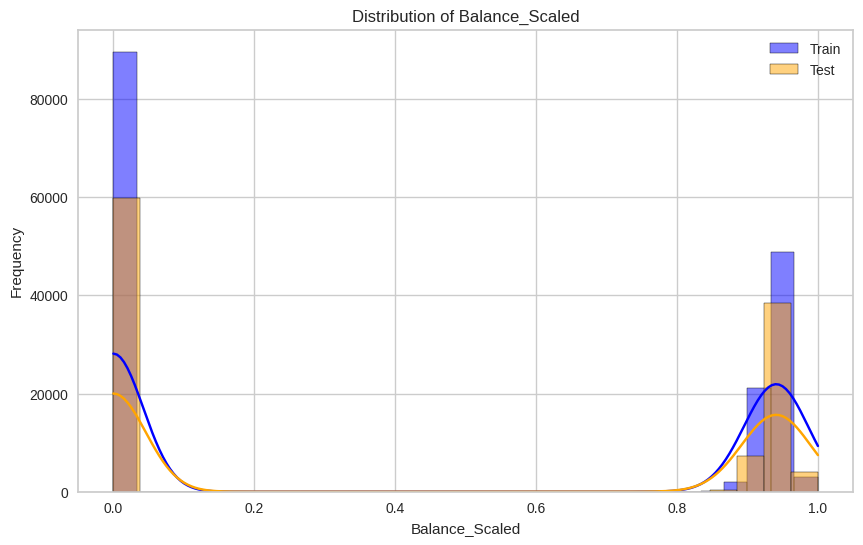

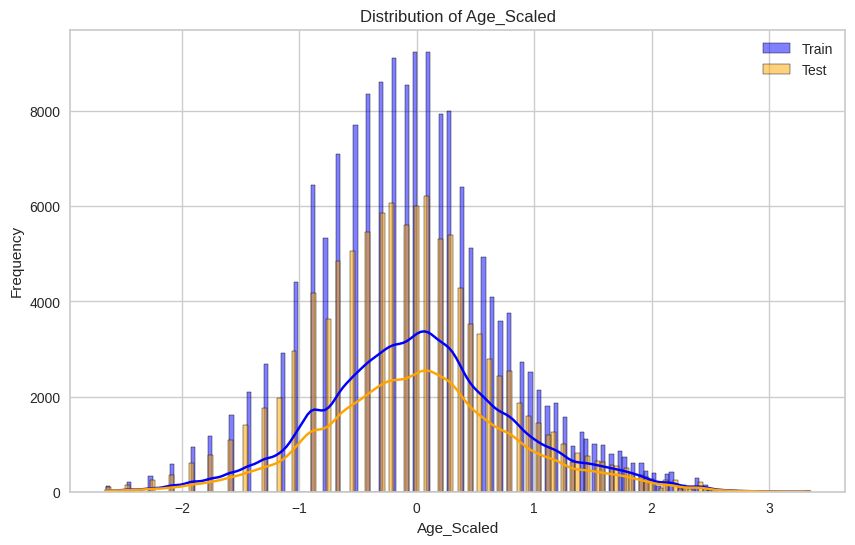

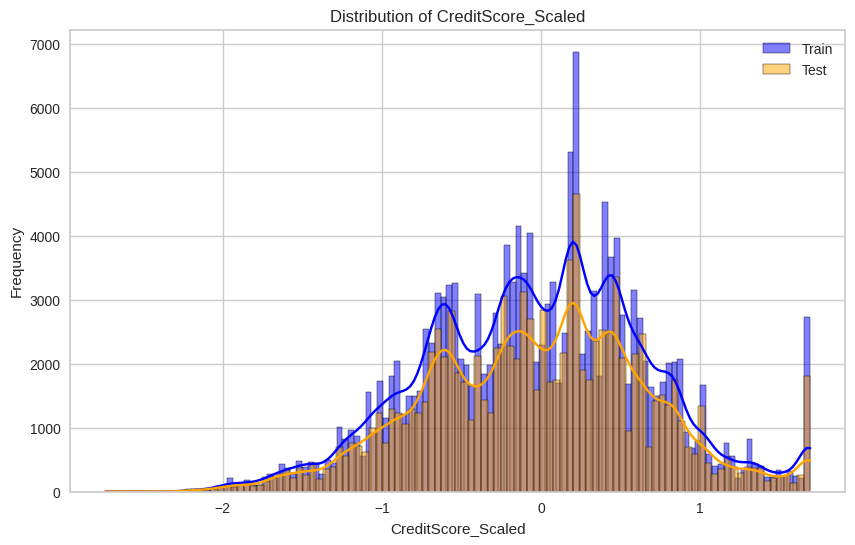

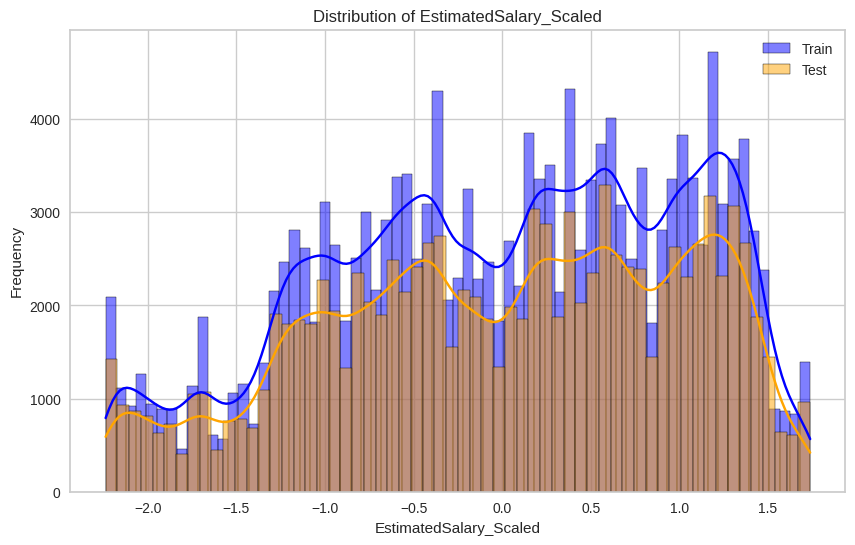

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# 주요 연속형 변수
scaled_columns = ['Balance_Scaled', 'Age_Scaled', 'CreditScore_Scaled', 'EstimatedSalary_Scaled']

# 변수별 히스토그램
for column in scaled_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(train[column], color="blue", label="Train", kde=True)
    sns.histplot(test[column], color="orange", label="Test", kde=True)
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

#### 다중공선성(VIF)

- 인코딩으로 인한 더미변수 제외 모두 다중공선성 X

```
                          Feature        VIF
0                      CustomerId   0.000159
1                          Gender   1.000821
2                          Tenure   1.109649
3                       HasCrCard   1.000419
4                  IsActiveMember   1.001078
5                       Age_group   1.010235
6                   Balance_group   7.060322
7              CreditScore_Scaled   1.005243
8          EstimatedSalary_Scaled   1.000079
9                      Age_Scaled   1.010357
10                 Balance_Scaled   7.035890
11            NumOfProducts_group   1.024231
12                     Tenure_Age   1.090783
13              NumOfProducts_Age   1.411414
14          NumOfProducts_Balance   3.844244
15  EstimatedSalary_NumOfProducts   1.168519
16        Balance_EstimatedSalary   1.000541
17                 Balance_Tenure   2.138256
18            Balance_CreditScore   4.435130
19            EstimatedSalary_Age   1.001223
20   IsActiveMember_NumOfProducts   1.009847
21           NumOfProducts_Tenure   8.294561
22     IsActiveMember_CreditScore   1.005260
23          Tenure_IsActiveMember   1.109744
24              Balance_Geography   2.129831
25       Geography_IsActiveMember   1.228856
26      EstimatedSalary_Geography   1.000013
27                CreditScore_Age   1.006829
28             CreditScore_Tenure  10.728240
29              Balance_HasCrCard   4.926360
30               Geography_France   1.113864
31              Geography_Germany   1.367807
32                Geography_Spain   1.016694
33                NumOfProducts_1   1.681190
34                NumOfProducts_2   1.603802
35                NumOfProducts_3   1.007192
36                NumOfProducts_4   1.001844
```

In [ ]:
# target 변수 제외: train_features
train_features = train.drop(columns=['Exited'])

# VIF 계산 : (exog : Any, exog_idx : Any ) -> (독립변수, 독립변수 인덱스) -> 독립변수 : 독립 변수들을 포함하는 2D 배열이나 데이터프레임 /
vif_data = pd.DataFrame()
vif_data['Feature'] = train_features.columns
vif_data['VIF'] = [variance_inflation_factor(train_features.values, i) for i in range(train_features.shape[1])]
print(vif_data)

#### 추가 시각화_상관관계 히트맵

- **Exited**
    - **양**
        - **Age(0.34)**
            - 연령이 높을수록 이탈 가능성이 다소 증가
        - Age_group(0.33)
            - 연령대가 높을수록 이탈 가능성이 다소 증가
        - NumOfProducts_1(0.31)
            - 이용중인 상품이 1개일 경우 이탈 가능성 다소 증가
    - **음**
        - **NumOfProducts_2(-0.38)**
            - 이용중인 상품이 2개일 경우 이탈 가능성이 다소 감소
        - NumOfProducts_Age(-0.32)
            - 연령 대비 이용 상품 수가 높을수록 이탈 가능성 다소 감소
        - CreditScore_Age(-0.29)
            - 연령 대비 신용점수 높을수록 이탈 가능성 다소 감소
- **전체 상관계수**
    - 다수의 파생변수 생성으로 변수간 상관관계가 복잡해지고 중복성이 높아짐
    - 수치의 신뢰성과 해석력 저하
    - 전체 상관계수 분석은 참고용으로 활용

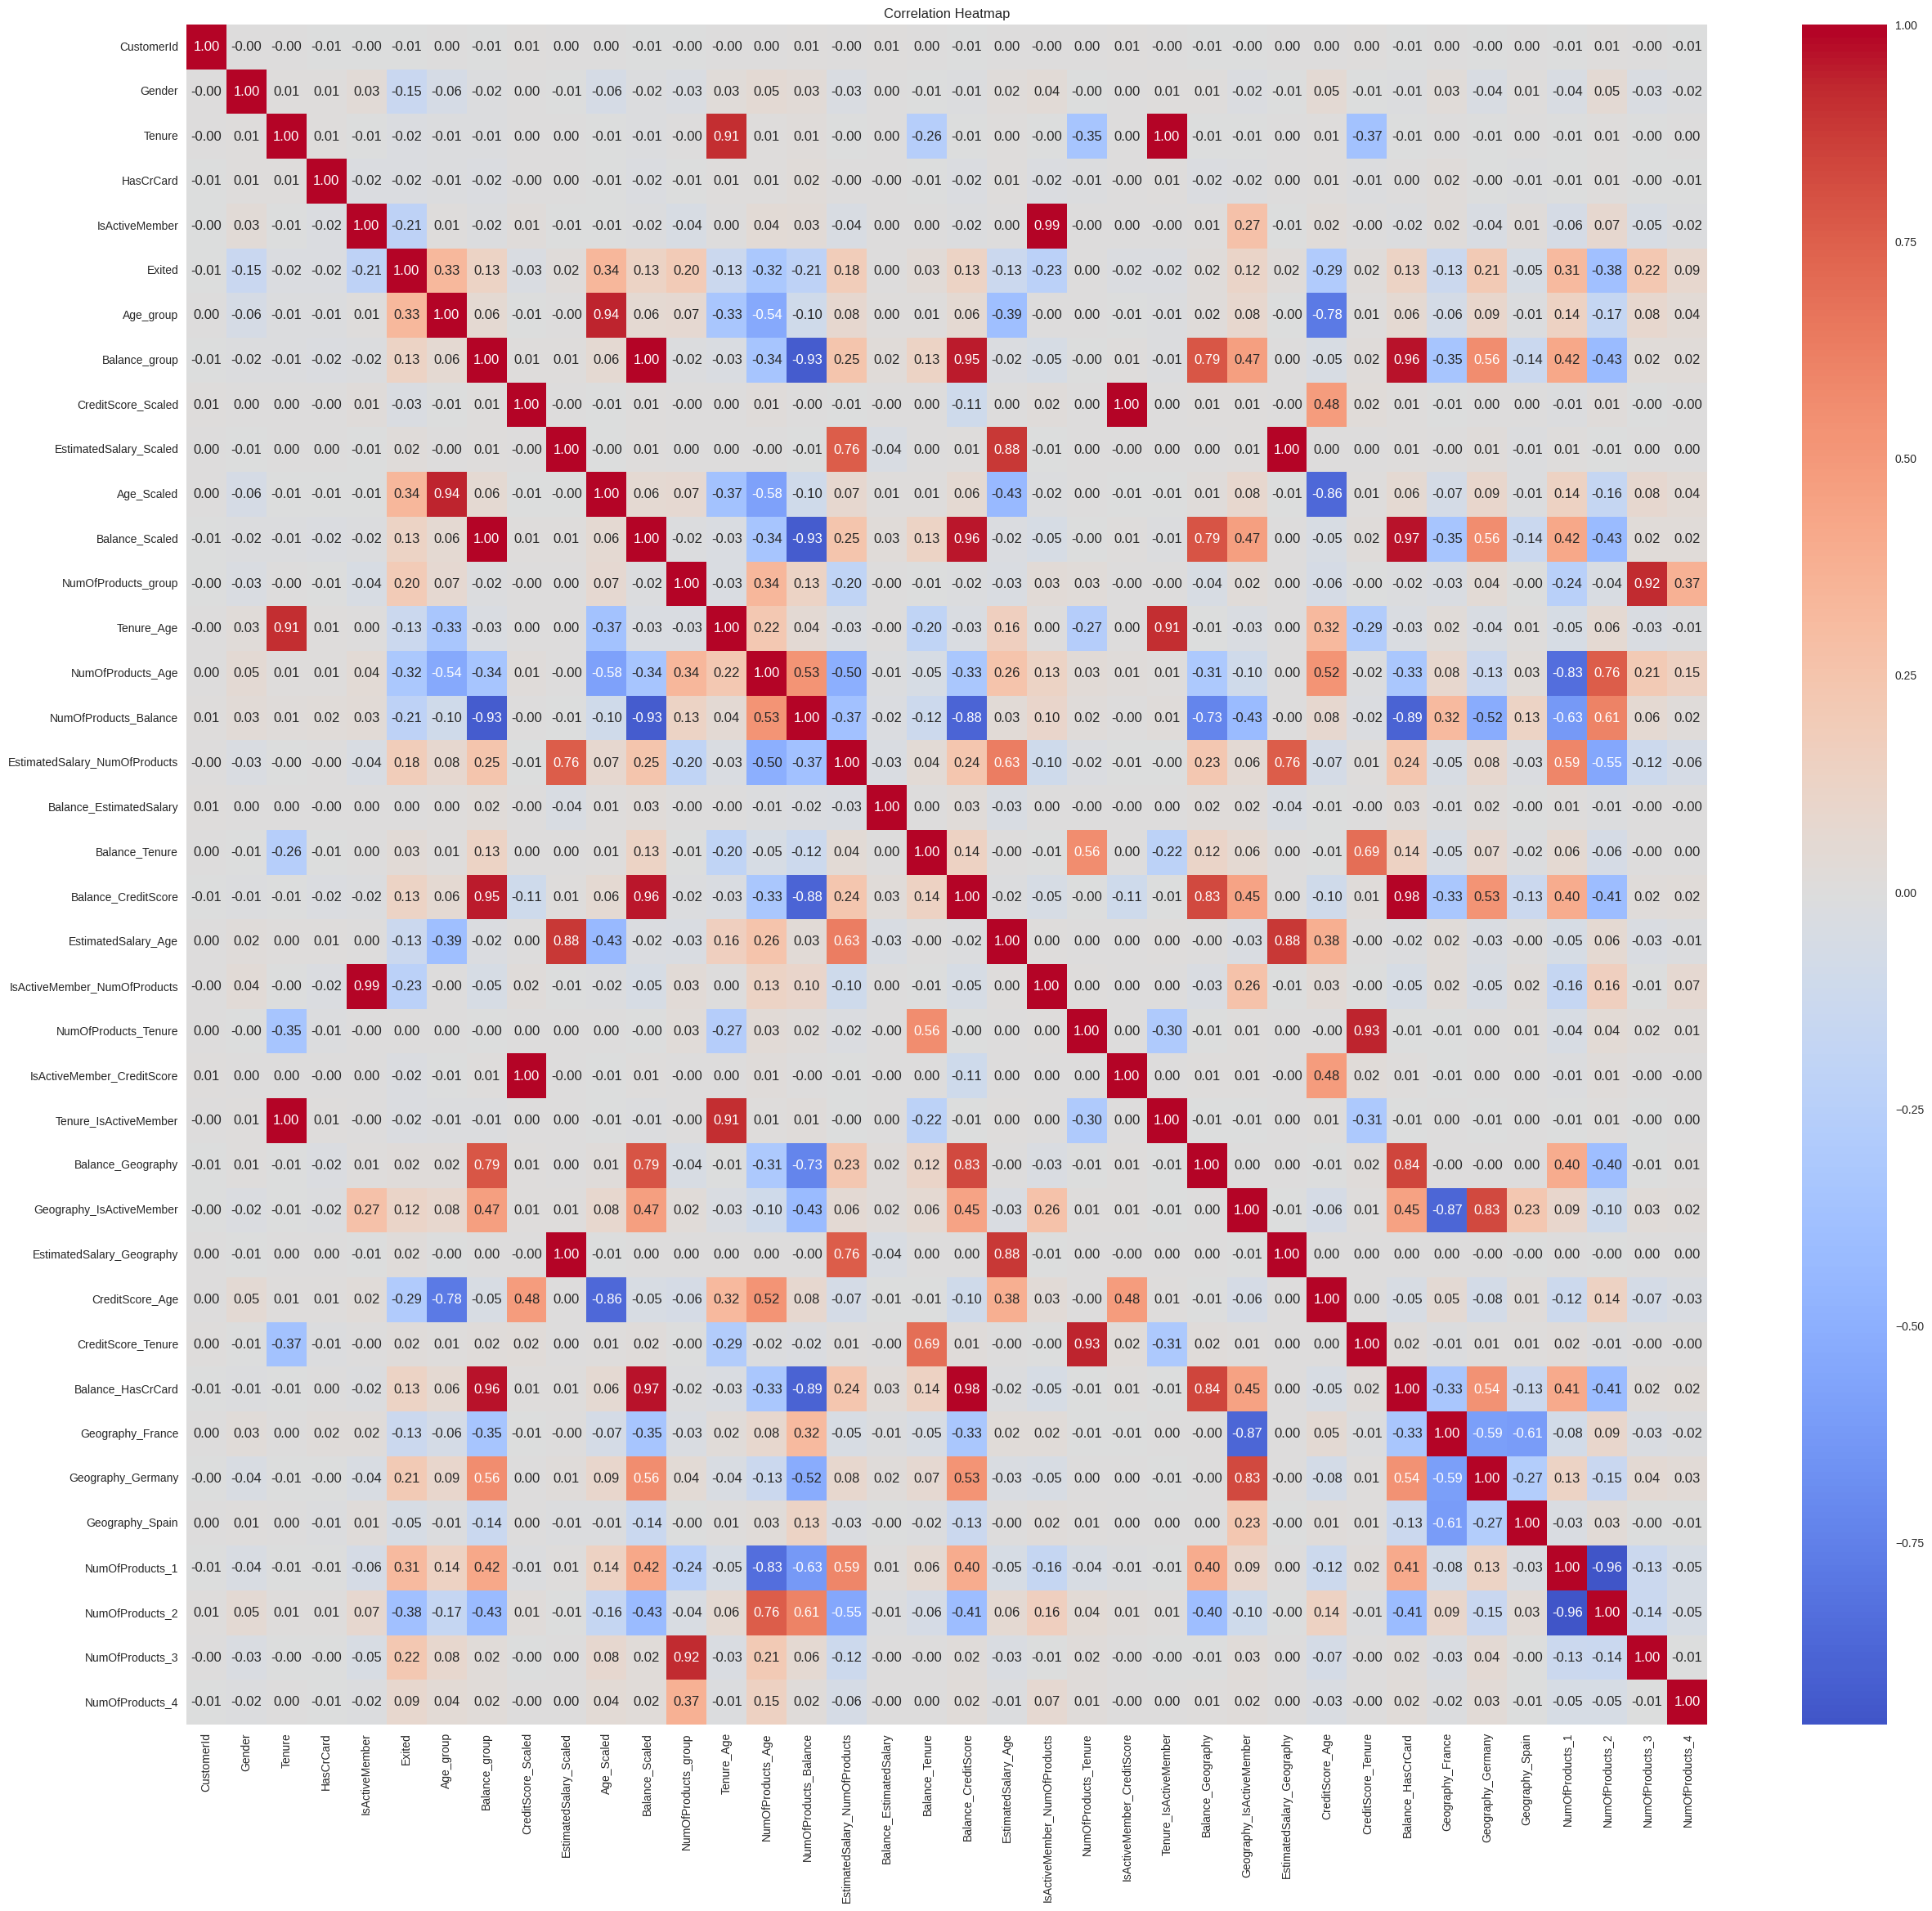

In [ ]:
corr = train.corr()

# 히트맵 시각화
plt.figure(figsize=(30, 27))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', center=0, cbar=True)

# 그래프 제목 추가
plt.title('Correlation Heatmap')

# 그래프 출력
plt.show()

## 2.모델링

### 데이터 분리

In [24]:
# feature, target 분리
train_feature = train.drop(columns='Exited')
train_target = train['Exited']

# 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(train_feature, train_target,
                                                      test_size = 0.3,
                                                      random_state=0)

# 분리 데이터 크기 확인
for i in [X_train, X_valid, y_train, y_valid] :
  print(i.shape)

# (115502, 37)
# (49502, 37)
# (115502,)
# (49502,)

(115502, 37)
(49502, 37)
(115502,)
(49502,)


### AutoML
- GBC : Gradient Boosting Classifier
- LightGBM : Light Gradient Boosting Machine
- CatBoost : CatBoost Classifier
- AdaBoost : Ada Boost Classifier
- XGBoost : Extreme Gradient Boosting



In [ ]:
# 인덱스 번호 새로 할당
X_train_automl = X_train.reset_index(drop=True)
y_train_automl = y_train.reset_index(drop=True)

# X_train, y_train 합치기
Xy_train_automl = pd.concat([X_train_automl, y_train_automl], axis=1)

# AutoML 모델 세팅
clf = setup(data=Xy_train_automl,
            target = 'Exited',
            train_size = 0.7,
            data_split_shuffle=True,
            session_id = 0,
            fold = 5
            )

# AutoML top5 model 설정
top5_model = compare_models(fold=5, round=3, n_select=5, sort = 'AUC', errors='ignore',verbose=True)
top5_model

,Description,Value
0,Session id,0
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(115502, 38)"
4,Transformed data shape,"(115502, 43)"
5,Transformed train set shape,"(80851, 43)"
6,Transformed test set shape,"(34651, 43)"
7,Numeric features,36
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.864,0.886,0.535,0.748,0.624,0.543,0.555,82.834
lightgbm,Light Gradient Boosting Machine,0.864,0.886,0.550,0.738,0.630,0.549,0.558,5.406
catboost,CatBoost Classifier,0.863,0.885,0.546,0.739,0.628,0.547,0.556,35.046
ada,Ada Boost Classifier,0.862,0.884,0.544,0.735,0.625,0.543,0.552,15.336
xgboost,Extreme Gradient Boosting,0.860,0.879,0.549,0.721,0.623,0.539,0.546,2.838
ridge,Ridge Classifier,0.859,0.877,0.474,0.768,0.586,0.507,0.528,0.604
lda,Linear Discriminant Analysis,0.859,0.874,0.557,0.713,0.625,0.540,0.546,0.770
rf,Random Forest Classifier,0.859,0.871,0.533,0.728,0.616,0.532,0.542,33.686
et,Extra Trees Classifier,0.856,0.865,0.537,0.710,0.611,0.525,0.532,14.734
qda,Quadratic Discriminant Analysis,0.785,0.739,0.024,0.401,0.045,0.020,0.048,0.698


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=0, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=0, reg_alpha=0.0, reg_lambda=0

### Optuna

- GBC
```
Best AUC: 0.8882353624113233
Best hyperparameters:
  n_estimators: 449
  learning_rate: 0.044150878877115926
  max_depth: 6
  min_samples_split: 2
  min_samples_leaf: 4
  subsample: 0.9731842381863204
  max_features: log2
  loss: exponential
  ccp_alpha: 4.9347750239549366e-05
  validation_fraction: 0.2518351573156265
  n_iter_no_change: 18
  tol: 0.004088217530008802
  min_impurity_decrease: 0.03799795246825141
  max_leaf_nodes: 95
```
- LightGBM
```
Best AUC: 0.8891460901206308
Best hyperparameters:
  num_boost_round: 532
  learning_rate: 0.04137208387151803
  num_leaves: 46
  max_depth: -1
  min_data_in_leaf: 86
  feature_fraction: 0.8139255851821137
  bagging_fraction: 0.8082068952185747
  bagging_freq: 4
  min_gain_to_split: 0.5814034631622789
  lambda_l1: 0.07098715189710325
  lambda_l2: 0.07241610219010308
  tree_learner: feature
  max_bin: 343
  early_stopping_rounds: 50
  num_threads: 3
  scale_pos_weight: 2.872248166434921
```
- CatBoost
```
Best AUC: 0.8891316004587454
Best hyperparameters:
  iterations: 193
  learning_rate: 0.05731626408645584
  depth: 5
  l2_leaf_reg: 0.12172037289908884
  random_strength: 0.11159304953837404
  bagging_temperature: 2.0950687664171803
  grow_policy: Lossguide
  border_count: 147
  od_wait: 40
```
- AdaBoost
```
Best AUC: 0.8874794558932251
Best hyperparameters:
  n_estimators: 312
  learning_rate: 0.06668653847352878
  algorithm: SAMME
  random_state: 853
  max_depth: 8
  min_samples_split: 3
  min_samples_leaf: 6
  max_features: log2
  max_leaf_nodes: 16
  min_impurity_decrease: 0.00026999077869702197
```
- XGBoost
```
Best AUC: 0.8872248463597316
Best hyperparameters:
  num_round: 349
  alpha: 0.10967146719877353
  base_score: 0.8675191316221191
  booster: gbtree
  colsample_bylevel: 0.6587236837621269
  colsample_bynode: 0.4542054877542777
  colsample_bytree: 0.8836850766965889
  eta: 0.23332571464656857
  eval_metric: auc
  gamma: 0.2762294374380138
  grow_policy: depthwise
  lambda: 4.034139666189761
  max_bin: 497
  max_delta_step: 8
  max_depth: 12
  max_leaves: 48
  min_child_weight: 9.477651521287859
  objective: binary:logistic
  scale_pos_weight: 8.433168368359874
  seed: 434
  subsample: 0.9545112785469709
  verbosity: 1
  early_stopping_rounds: 54                    
```



#### GBC : Gradient Boosting Classifier

In [ ]:
sampler = TPESampler(seed=0)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),                          # 트리의 개수
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),                     # 학습률
        'max_depth': trial.suggest_int('max_depth', 3, 10),                                   # 트리의 최대 깊이
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),                   # 분할을 위한 최소 샘플 수
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),                     # 리프 노드에 최소한 있어야 할 샘플 수
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),                              # 샘플링 비율
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),    # 분할에 사용할 특성의 수
        'loss': trial.suggest_categorical('loss', ['log_loss', 'exponential']),               # 손실 함수
        'ccp_alpha': trial.suggest_float('ccp_alpha', 0.0, 0.1),                              # 가지치기 파라미터
        'random_state': 0,                                                                    # 고정된 랜덤 시드
        'validation_fraction': trial.suggest_float('validation_fraction', 0.1, 0.3),          # 검증 데이터 비율
        'n_iter_no_change': trial.suggest_int('n_iter_no_change', 5, 20),                     # 성능 향상이 없을 경우 훈련 중단
        'tol': trial.suggest_float('tol', 1e-4, 1e-2),                                        # 수렴을 위한 tolerance 값
        'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.1),      # 불순도 감소 기준
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 10, 100),                       # 최대 리프 노드 수
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    auc_list = []

    for _, (train_index, valid_index) in enumerate(cv.split(train_feature,train_target)):
        X_train, y_train = train_feature.iloc[train_index], train_target.iloc[train_index]
        X_valid, y_valid = train_feature.iloc[valid_index], train_target.iloc[valid_index]


        gbc_model = GradientBoostingClassifier(**params)
        gbc_model.fit(X_train, y_train)

        # 예측 확률 계산
        y_prob = gbc_model.predict_proba(X_valid)[:,1]
        auc_score = roc_auc_score(y_valid, y_prob)
        auc_list.append(auc_score)

    # 평균 auc 반환
    mean_auc = np.mean(auc_list)
    return mean_auc

# optuna 최적화 실행(AUC 최대화)
optuna_gbc = optuna.create_study(direction='maximize', sampler=sampler)
optuna_gbc.optimize(objective, n_trials=50)

# 최적 결과 출력
best_trial = optuna_gbc.best_trial
print(f"Best AUC: {best_trial.value}")
print("Best hyperparameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")

#### LightGBM : Light Gradient Boosting Machine

In [ ]:
sampler = TPESampler(seed=0)

def objective(trial):
    params = {
        'num_boost_round': trial.suggest_int('num_boost_round', 100, 1000),                                   # 최대 부스팅 반복 횟수 (트리의 수) / default: 100
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),                                     # 학습률 (각 예제마다 가중치를 업데이트하는 비율) / default: 0.1
        'num_leaves': trial.suggest_int('num_leaves', 31, 128),                                               # 트리의 최대 잎 수 / default: 64
        'max_depth': trial.suggest_int('max_depth', -1, 15),                                                  # 트리의 최대 깊이 / default: 6
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 20, 100),                                   # 각 리프 노드에 최소 데이터 수 / default: 3
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),                                # 각 트리에서 선택할 특징의 비율 / default: 0.9
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),                                # 배깅의 비율 (데이터의 일부를 무작위로 선택) / default: 0.9
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),                                             # 배깅을 수행하는 빈도 / default: 1
        'min_gain_to_split': trial.suggest_float('min_gain_to_split', 0.0, 1.0),                              # 각 트리에서 사용할 최소 게인 / default: 0.0
        'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 0.1),                                              # L1 정규화 / default: 0.0
        'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 0.1),                                              # L2 정규화 / default: 0.0
        'tree_learner': trial.suggest_categorical('tree_learner', ['serial', 'feature', 'data', 'voting']),   # 트리 훈련자 유형 / default: 'serial'
        'max_bin': trial.suggest_int('max_bin', 255, 512),                                                    # 최대 빈 수 (기능 값을 버킷화하는 데 사  용) / default: 255
        'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 10, 50),                          # 조기 중단 라운드 / default: 10
        'metric': 'auc',                                                                                      # 평가 지표 (auc 고정)
        'num_threads': trial.suggest_int('num_threads', 1, 8),                                                # 트리 학습에 사용하는 스레드 수 / default: 0
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 5.0),                                # 스케일링된 레이블의 가중치 (바이너리 분류에만 사용) / default: 1.0
        'verbosity': 0                                                                                        # 인쇄메시지
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    auc_list = []

    for _, (train_index, valid_index) in enumerate(cv.split(train_feature,train_target)):
        X_train, y_train = train_feature.iloc[train_index], train_target.iloc[train_index]
        X_valid, y_valid = train_feature.iloc[valid_index], train_target.iloc[valid_index]

        # LightGBM 모델 학습
        train_data = lgb.Dataset(X_train, label=y_train)
        valid_data = lgb.Dataset(X_valid, label=y_valid)

        # lightGBM 모델 학습
        lgb_model = lgb.train(
            params,
            train_data,
            valid_sets = [train_data, valid_data]
        )

        # 예측 확률 계산
        y_prob = lgb_model.predict(X_valid)
        auc_score = roc_auc_score(y_valid, y_prob)
        auc_list.append(auc_score)

    # 평균 auc 반환
    mean_auc = np.mean(auc_list)
    return mean_auc

# optuna 최적화 실행(AUC 최대화)
optuna_lgb = optuna.create_study(direction='maximize', sampler=sampler)
optuna_lgb.optimize(objective, n_trials=50)

# 최적 결과 출력
best_trial = optuna_lgb.best_trial
print(f"Best AUC: {best_trial.value}")
print("Best hyperparameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")

#### Catboost : CatBoost Classifier


In [ ]:
sampler = TPESampler(seed=0)

def objective(trial):
    # 하이퍼파라미터 정의
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000),                                               # 트리 개수 (Boosting 반복 횟수) / default: 1000
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1.0),                                  # 학습률 (트리의 가중치를 조정하는 비율) / default: 0.03
        "depth": trial.suggest_int("depth", 1, 16),                                                             # 트리의 최대 깊이 (과적합 방지) / default: 6
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-2, 10.0),                                     # L2 정규화 계수 (과적합 방지) / default: 3.0
        "random_strength": trial.suggest_loguniform("random_strength", 1e-2, 10.0),                             # 트리 분할 시 무작위성 정도 (과적합 방지) / default: 1.0
        "bagging_temperature": trial.suggest_loguniform("bagging_temperature", 1e-5, 10.0),                     # 베이지안 부트스트랩 샘플링 강도 (1 이상이면 샘플링 강화) / default: 1.0
        "grow_policy": trial.suggest_categorical("grow_policy", ["SymmetricTree", "Depthwise", "Lossguide"]),   # 트리 성장 정책 (균형 성장 vs 깊이 우선 vs 손실 기반) / default: SymmetricTree
        "border_count": trial.suggest_int("border_count", 1, 255),                                              # 연속형 피처를 구간화할 때 사용할 분할 개수 / default: 254
        "thread_count": -1,                                                                                     # 사용할 CPU 스레드 개수 (-1이면 모든 코어 사용) / default: -1
        "random_seed": 42,                                                                                      # 재현 가능성을 위한 난수 시드 고정 / default: 없음
        "eval_metric": "AUC",                                                                                   # 평가 지표 (Area Under Curve) / default: Logloss
        "verbose": 0,                                                                                           # 학습 과정 출력 여부 (0이면 출력 안 함)
        "od_type": "Iter",                                                                                      # 조기 종료 조건 (Iteration 기반) / default: IncToDec
        "od_wait": trial.suggest_int("od_wait", 10, 50),                                                        # 조기 종료를 위한 대기 스텝 수 / default: 50
        "task_type": "CPU",                                                                                     # 실행 환경 설정 (CPU 사용)
        "loss_function": "Logloss"                                                                              # 손실 함수 (이진 분류 문제에서는 Logloss 사용)
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    auc_list = []

    # 범주형 컬럼 자동 감지
    cat_features_indices = [
        train_feature.columns.get_loc(col)
        for col in train_feature.select_dtypes(include=['category']).columns
    ]

    for _, (train_index, valid_index) in enumerate(cv.split(train_feature, train_target)):
        X_train, y_train = train_feature.iloc[train_index], train_target.iloc[train_index]
        X_valid, y_valid = train_feature.iloc[valid_index], train_target.iloc[valid_index]

        # CatBoostClassifier 초기화 및 학습
        cat_model = CatBoostClassifier(**params)
        cat_model.fit(
            X_train, y_train,
            eval_set=(X_valid, y_valid),
            early_stopping_rounds=50,
            verbose=0,
            cat_features=cat_features_indices  # 범주형 컬럼 지정
        )

        # 예측 확률 계산
        y_score = cat_model.predict_proba(X_valid)[:, 1]
        auc_score = roc_auc_score(y_valid, y_score)
        auc_list.append(auc_score)

    # 평균 auc 반환
    mean_auc = np.mean(auc_list)
    return mean_auc

# optuna 최적화 실행(AUC 최대화)
optuna_cat = optuna.create_study(direction='maximize', sampler=sampler)
optuna_cat.optimize(objective, n_trials=50)

# 최적 결과 출력
best_trial = optuna_cat.best_trial
print(f"Best AUC: {best_trial.value}")
print("Best hyperparameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")


#### XGBoost : Extreme Gradient Boosting

In [ ]:
sampler = TPESampler(seed=0)

def objective(trial):
    params = {
        'num_round': trial.suggest_int('num_round', 100, 1000),                               # 부스팅 반복 횟수 (트리 개수) / default: 100
        'alpha': trial.suggest_float('alpha', 0.0, 1.0),                                      # L1 정규화 항 (Lasso 규제, 가중치 감소 효과) / default: 0.0
        'base_score': trial.suggest_float('base_score', 0.0, 1.0),                            # 초기 예측값 (모든 샘플의 기본 예측값) / default: 0.5
        'booster': trial.suggest_categorical('booster', ['gbtree']),                          # 부스팅 방식 ('gbtree': 트리 기반, 'gblinear': 선형 모델) / default: 'gbtree'
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1.0),              # 트리의 각 레벨에서 선택할 피처 비율 / default: 1.0
        'colsample_bynode': trial.suggest_float('colsample_bynode', 0.1, 1.0),                # 트리 각 노드에서 선택할 피처 비율 / default: 1.0
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),                # 각 트리에서 선택할 피처 비율 (컬럼 샘플링) / default: 1.0
        'eta': trial.suggest_float('eta', 0.01, 0.3),                                         # 학습률 (트리 가중치 업데이트 비율) / default: 0.3
        'eval_metric': 'auc',                                                                 # 평가 지표 (AUC로 고정)
        'gamma': trial.suggest_float('gamma', 0.0, 1.0),                                      # 트리 분할을 위한 최소 손실 감소값 (클수록 보수적 분할) / default: 0.0
        'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),  # 트리 성장 방식 ('depthwise': 깊이 우선, 'lossguide': 손실 기반) / default: 'depthwise'
        'lambda': trial.suggest_float('lambda', 0.0, 10.0),                                   # L2 정규화 항 (Ridge 규제, 과적합 방지) / default: 1.0
        'max_bin': trial.suggest_int('max_bin', 10, 512),                                     # 연속형 변수를 이산화할 때 사용할 빈 개수 / default: 256
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10),                         # 클래스 불균형 보정 (가중치 변화 제한) / default: 0
        'max_depth': trial.suggest_int('max_depth', 3, 12),                                   # 개별 트리의 최대 깊이 (깊을수록 모델 복잡도 증가) / default: 6
        'max_leaves': trial.suggest_int('max_leaves', 0, 50),                                 # 트리의 최대 리프 노드 개수 (0이면 제한 없음) / default: 0
        'min_child_weight': trial.suggest_float('min_child_weight', 0.1, 10.0),               # 리프 노드가 분할되기 위한 최소 가중치 합 (클수록 덜 분할) / default: 1.0
        'objective': 'binary:logistic',                                                       # 학습 목표 (이진 분류: 로지스틱 회귀) / default: 'binary:logistic'
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.1, 10.0),               # 불균형 데이터 조정 가중치 / default: 1.0
        'seed': trial.suggest_int('seed', 0, 1000),                                           # 난수 시드 (재현 가능성 확보) / default: 0
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),                              # 트리 학습 시 사용하는 샘플링 비율 (과적합 방지) / default: 1.0
        'verbosity': trial.suggest_int('verbosity', 0, 3),                                    # 출력 메시지 수준 (0: 없음, 3: 상세 로그) / default: 1
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    auc_list = []

    for _, (train_index, valid_index) in enumerate(cv.split(train_feature,train_target)):
        X_train, y_train = train_feature.iloc[train_index], train_target.iloc[train_index]
        X_valid, y_valid = train_feature.iloc[valid_index], train_target.iloc[valid_index]

        dtrain = xgb.DMatrix(X_train, label=y_train,enable_categorical=True)
        dvalid = xgb.DMatrix(X_valid, label=y_valid,enable_categorical=True)

        xgb_model = xgb.train(
            params,
            dtrain,
            evals=[(dtrain, 'train'), (dvalid, 'valid')],
            early_stopping_rounds=trial.suggest_int('early_stopping_rounds', 10, 100)
        )

        # 예측 확률 계산
        y_prob = xgb_model.predict(dvalid)
        auc_score = roc_auc_score(y_valid, y_prob)
        auc_list.append(auc_score)

    # 평균 auc 반환
    mean_auc = np.mean(auc_list)
    return mean_auc

# optuna 최적화 실행(AUC 최대화)
optuna_xgb = optuna.create_study(direction='maximize', sampler=sampler)
optuna_xgb.optimize(objective, n_trials=50)

# 최적 결과 출력
best_trial = optuna_xgb.best_trial
print(f"Best AUC: {best_trial.value}")
print("Best hyperparameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")

#### AdaBoost : Ada Boost Classifier

In [ ]:
sampler = TPESampler(seed=0)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 500),                         # 부스팅할 약한 학습기의 개수 / default: 50
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),         # 학습률 (작을수록 보수적 학습) / default: 1.0
        'algorithm': trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R']),          # 부스팅 알고리즘 ('SAMME': 분류기 확률 사용 안 함, 'SAMME.R': 확률 사용) / default: 'SAMME.R'
        'random_state': trial.suggest_int('random_state', 0, 1000)                          # 난수 시드 (재현 가능성 확보) / default: None
    }

    # 기본 학습기 (약한 학습기)로 결정 트리 사용 시 세부 하이퍼파라미터 설정
    base_estimator_params = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),                                 # 트리의 최대 깊이 (깊을수록 복잡한 모델) / default: None (무제한)
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),                 # 노드를 분할하기 위한 최소 샘플 개수 / default: 2
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),                   # 리프 노드에 있어야 하는 최소 샘플 개수 / default: 1
        'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2']),  # 트리 분할 시 사용할 최대 특성 개수 / default: None (모든 특성 사용)
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 10, 100, log=True),           # 리프 노드 최대 개수 (과적합 방지) / default: None (제한 없음)
        'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.1)     # 최소 불순도 감소 기준 (값이 클수록 덜 분할) / default: 0.0
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    auc_list = []

    for _, (train_index, valid_index) in enumerate(cv.split(train_feature,train_target)):
        X_train, y_train = train_feature.iloc[train_index], train_target.iloc[train_index]
        X_valid, y_valid = train_feature.iloc[valid_index], train_target.iloc[valid_index]


        base_estimator = DecisionTreeClassifier(**base_estimator_params)


        ada_model = AdaBoostClassifier(estimator=  base_estimator, **params)
        ada_model.fit(X_train,y_train)

        # 예측 확률 계산
        y_prob = ada_model.predict_proba(X_valid)[:,1]
        auc_score = roc_auc_score(y_valid, y_prob)
        auc_list.append(auc_score)

    # 평균 auc 반환
    mean_auc = np.mean(auc_list)
    return mean_auc

# optuna 최적화 실행(AUC 최대화)
optuna_ada = optuna.create_study(direction='maximize', sampler=sampler)
optuna_ada.optimize(objective, n_trials=50)

# 최적 결과 출력
best_trial = optuna_ada.best_trial
print(f"Best AUC: {best_trial.value}")
print("Best hyperparameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")

### 보팅

- 하드 보팅
    - 예측값들 중 다수 분류기가 결정한 예측값을 최종 보팅 결괏값(다수결)
- **소프트 보팅**
    - **레이블 값 결정 확률을 모두 더하고 이를 평균해서 이들 중 확률이 가장 높은 레이블 값**
        - gbc: 0.8882353624113233
        - lightgbm: 0.8891460901206308 (가장 높은 성능)
        - xgboost: 0.8872248463597316
        - ada: 0.8874794558932251
        - catboost: 0.8891316004587454

#### 조합 생성

In [25]:
models = ['lightgbm','gbc','ada','xgboost','Ridge']

model_combinations = []
for i in range(1,len(models) + 1) :
  model_combinations.extend(combinations(models,i))


for combo in model_combinations :
  print(combo)

('lightgbm',)
('gbc',)
('ada',)
('xgboost',)
('Ridge',)
('lightgbm', 'gbc')
('lightgbm', 'ada')
('lightgbm', 'xgboost')
('lightgbm', 'Ridge')
('gbc', 'ada')
('gbc', 'xgboost')
('gbc', 'Ridge')
('ada', 'xgboost')
('ada', 'Ridge')
('xgboost', 'Ridge')
('lightgbm', 'gbc', 'ada')
('lightgbm', 'gbc', 'xgboost')
('lightgbm', 'gbc', 'Ridge')
('lightgbm', 'ada', 'xgboost')
('lightgbm', 'ada', 'Ridge')
('lightgbm', 'xgboost', 'Ridge')
('gbc', 'ada', 'xgboost')
('gbc', 'ada', 'Ridge')
('gbc', 'xgboost', 'Ridge')
('ada', 'xgboost', 'Ridge')
('lightgbm', 'gbc', 'ada', 'xgboost')
('lightgbm', 'gbc', 'ada', 'Ridge')
('lightgbm', 'gbc', 'xgboost', 'Ridge')
('lightgbm', 'ada', 'xgboost', 'Ridge')
('gbc', 'ada', 'xgboost', 'Ridge')
('lightgbm', 'gbc', 'ada', 'xgboost', 'Ridge')


#### 2. 가중치

In [26]:
roc_score = {
    'lightgbm' : 0.8891460901206308,
    'gbc' : 0.8882353624113233,
    'ada' : 0.8874794558932251,
    'xgboost' : 0.8872248463597316,
    'catboost' :  0.8891316004587454
}

total_roc = sum(roc_score.values())
weights = {model : roc_score[model] / total_roc for model in roc_score}

#### 3. 소프트 보팅 구현

In [ ]:
# 범주형 컬럼 자동 감지
cat_features_indices = [
    train_feature.columns.get_loc(col)
    for col in train_feature.select_dtypes(include=['category']).columns
]

# 모델 정의 (Optuna 결과 반영)
models_dict = {
    'lightgbm': LGBMClassifier(
        num_boost_round=532,
        learning_rate=0.04137208387151803,
        num_leaves=46,
        max_depth=-1,
        min_data_in_leaf=86,
        feature_fraction=0.8139255851821137,
        bagging_fraction=0.8082068952185747,
        bagging_freq=4,
        min_gain_to_split=0.5814034631622789,
        lambda_l1=0.07098715189710325,
        lambda_l2=0.07241610219010308,
        tree_learner='feature',
        max_bin=343,
        num_threads=3,
        scale_pos_weight=2.872248166434921
    ),
    'gbc': GradientBoostingClassifier(
        n_estimators=449,
        learning_rate=0.044150878877115926,
        max_depth=6,
        min_samples_split=2,
        min_samples_leaf=4,
        subsample=0.9731842381863204,
        max_features='log2',
        loss='exponential',
        ccp_alpha=4.9347750239549366e-05,
        validation_fraction=0.2518351573156265,
        n_iter_no_change=18,
        tol=0.004088217530008802,
        min_impurity_decrease=0.03799795246825141,
        max_leaf_nodes=95
    ),
    'ada': AdaBoostClassifier(
        estimator=DecisionTreeClassifier(
            max_depth=8,
            min_samples_split=3,
            min_samples_leaf=6,
            max_features='log2',
            max_leaf_nodes=16,
            min_impurity_decrease=0.00026999077869702197
        ),
        n_estimators=312,
        learning_rate=0.06668653847352878,
        algorithm='SAMME',
        random_state=853
    ),
    'xgboost': XGBClassifier(
        n_estimators=349,
        alpha=0.10967146719877353,
        base_score=0.8675191316221191,
        booster='gbtree',
        colsample_bylevel=0.6587236837621269,
        colsample_bynode=0.4542054877542777,
        colsample_bytree=0.8836850766965889,
        learning_rate=0.23332571464656857,
        eval_metric='auc',
        gamma=0.2762294374380138,
        grow_policy='depthwise',
        reg_lambda=4.034139666189761,
        max_bin=497,
        max_delta_step=8,
        max_depth=12,
        max_leaves=48,
        min_child_weight=9.477651521287859,
        objective='binary:logistic',
        scale_pos_weight=8.433168368359874,
        seed=434,
        subsample=0.9545112785469709,
        verbosity=1
        enable_categorical=True
    ),
    'catboost': CatBoostClassifier(
        iterations=193,
        learning_rate=0.05731626408645584,
        depth=5,
        l2_leaf_reg=0.12172037289908884,
        random_strength=0.11159304953837404,
        bagging_temperature=2.0950687664171803,
        grow_policy='Lossguide',
        border_count=147,
        od_wait=40,
        cat_features=cat_features_indices,
        verbose=0
    )
}

# 소프트 보팅 성능 평가
best_combo = None
best_auc = 0
results = []

# 교차검증 설정
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for combo in model_combinations:
    estimators = [(name, models_dict[name]) for name in combo]
    weights_for_combo = [weights[name] for name in combo]

    voting_clf = VotingClassifier(
        estimators=estimators,
        voting='soft',
        weights=weights_for_combo
    )

    roc_list = []

    # 교차 검증 루프
    for train_idx, valid_idx in cv.split(train_feature, train_target):
        X_train, y_train = train_feature.iloc[train_idx], train_target.iloc[train_idx]
        X_valid, y_valid = train_feature.iloc[valid_idx], train_target.iloc[valid_idx]

        # CatBoost용 범주형 데이터 처리
        if 'catboost' in combo:
            X_train = X_train.copy()
            X_valid = X_valid.copy()
            for col in train_feature.select_dtypes(include=['category']).columns:
                X_train[col] = X_train[col].cat.codes
                X_valid[col] = X_valid[col].cat.codes

        # 모델 학습
        voting_clf.fit(X_train, y_train)

        # 예측 및 ROC 계산
        y_prob = voting_clf.predict_proba(X_valid)[:, 1]
        roc = roc_auc_score(y_valid, y_prob)
        roc_list.append(roc)

    # 교차 검증 평균 AUC 계산
    mean_roc = sum(roc_list) / len(roc_list)

    # 결과 저장
    results.append({
        "combination": combo,
        "mean_roc": mean_roc,
        "roc_per_fold": roc_list,  # 폴드별 점수 추가
        "weights": weights_for_combo
    })

# 결과 정렬 (ROC 기준 내림차순)
results = sorted(results, key=lambda x: x["mean_roc"], reverse=True)

# 모든 결과 출력
print("=" * 50)
print("All Voting Model Results:")
print("=" * 50)
for result in results:
    print(f"Combination: {result['combination']}, Mean ROC: {result['mean_roc']:.4f}, "
          f"Fold AUCs: {result['roc_per_fold']}, Weights: {result['weights']}")

# 최적의 결과 출력
best_result = results[0]  # 가장 높은 점수
print("=" * 50)
print(f"Best Model Combination: {best_result['combination']}")
print(f"Best AUC: {best_result['mean_roc']:.4f}")
print(f"Fold AUCs: {best_result['roc_per_fold']}")
print(f"Best Weights: {best_result['weights']}")
print("=" * 50)


## 3.최종 모델
```
Best Model Combination: ('lightgbm', 'ada', 'catboost')
Best AUC: 0.8892
Fold AUCs: [0.8875412534269587, 0.8897113821342711, 0.8917677196721903, 0.8890633795677888, 0.8880000832908077]
Best Weights: [0.20020323686045985, 0.1998279716810968, 0.20019997431761935]
```


### 데이터 분리

In [27]:
# feature, target 분리
train_feature = train.drop(columns='Exited')
train_target = train['Exited']

# 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(train_feature, train_target,
                                                      test_size = 0.3,
                                                      random_state=0)


### 모델 생성
```
<최종 점수>
Final Model AUC Score: 0.8905
```

In [30]:
cat_features_indices = [
    train_feature.columns.get_loc(col)
    for col in train_feature.select_dtypes(include=['category']).columns
]

final_models = {
    'lightgbm': LGBMClassifier(
        n_estimators=532,  # num_boost_round 대신 n_estimators로 변경
        learning_rate=0.04137208387151803,
        num_leaves=46,
        max_depth=-1,  # 깊이 제한 없음
        min_child_samples=86,
        feature_fraction=0.8139255851821137,
        bagging_fraction=0.8082068952185747,
        bagging_freq=4,
        min_split_gain=0.5814034631622789,  # min_gain_to_split
        reg_alpha=0.07098715189710325,  # lambda_l1
        reg_lambda=0.07241610219010308,  # lambda_l2
        tree_learner='feature',
        max_bin=343,
        num_threads=3,
        scale_pos_weight=2.872248166434921
    ),
    'ada': AdaBoostClassifier(
        estimator=DecisionTreeClassifier(
            max_depth=8,
            min_samples_split=3,
            min_samples_leaf=6,
            max_features='log2',
            max_leaf_nodes=16,
            min_impurity_decrease=0.00026999077869702197
        ),
        n_estimators=312,
        learning_rate=0.06668653847352878,
        algorithm='SAMME',
        random_state=853
    ),
    'catboost': CatBoostClassifier(
        iterations=193,
        learning_rate=0.05731626408645584,
        depth=5,
        l2_leaf_reg=0.12172037289908884,
        random_strength=0.11159304953837404,
        bagging_temperature=2.0950687664171803,
        grow_policy='Lossguide',
        border_count=147,
        od_wait=40,
        cat_features=cat_features_indices,  # 범주형 컬럼 인덱스 추가
        verbose=0
    )
}

# 소프트 보팅 모델 생성
final_voting_model = VotingClassifier(
    estimators=[('lightgbm', final_models['lightgbm']), ('ada', final_models['ada']),('catboost', final_models['catboost'])],
    voting='soft',
    weights=[0.20020323686045985, 0.1998279716810968, 0.20019997431761935]  # 최적 가중치 적용
)

# 학습
final_voting_model.fit(X_train, y_train)

# 예측
y_prob = final_voting_model.predict_proba(X_valid)[:, 1]
auc_score = roc_auc_score(y_valid, y_prob)

# 결과 출력
print(f"Final Model AUC Score: {auc_score:.4f}")

[LightGBM] [Warning] feature_fraction is set=0.8139255851821137, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8139255851821137
[LightGBM] [Warning] bagging_fraction is set=0.8082068952185747, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8082068952185747
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8139255851821137, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8139255851821137
[LightGBM] [Warning] bagging_fraction is set=0.8082068952185747, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8082068952185747
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] Number of positive: 24399, number of negative: 91103
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.075274 seconds.
You can

### 제출 파일 생성

In [ ]:
# 테스트 데이터 예측
test_prob = final_voting_model.predict_proba(test)[:, 1]

submission['Exited'] = test_prob
submission.to_csv('third_mean_submission.csv',index=False)

[LightGBM] [Warning] feature_fraction is set=0.8139255851821137, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8139255851821137
[LightGBM] [Warning] bagging_fraction is set=0.8082068952185747, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8082068952185747
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


### 변수 중요도

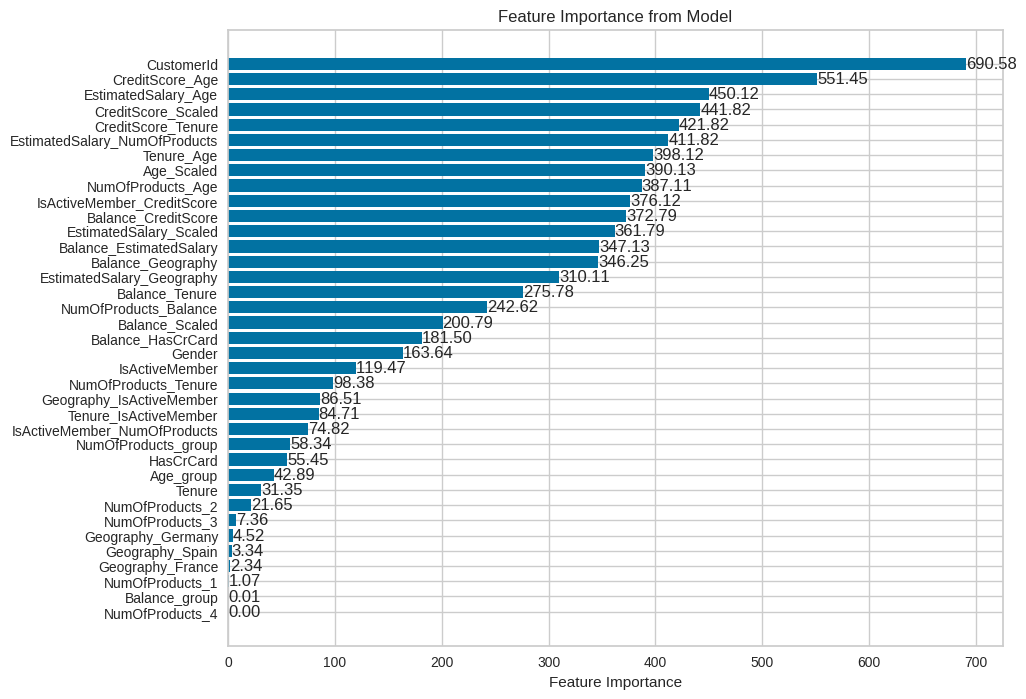

[LightGBM] [Warning] feature_fraction is set=0.8139255851821137, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8139255851821137
[LightGBM] [Warning] bagging_fraction is set=0.8082068952185747, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8082068952185747
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8139255851821137, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8139255851821137
[LightGBM] [Warning] bagging_fraction is set=0.8082068952185747, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8082068952185747
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8139255851821137, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8139255851821137
[LightGBM] [Warning] bagging

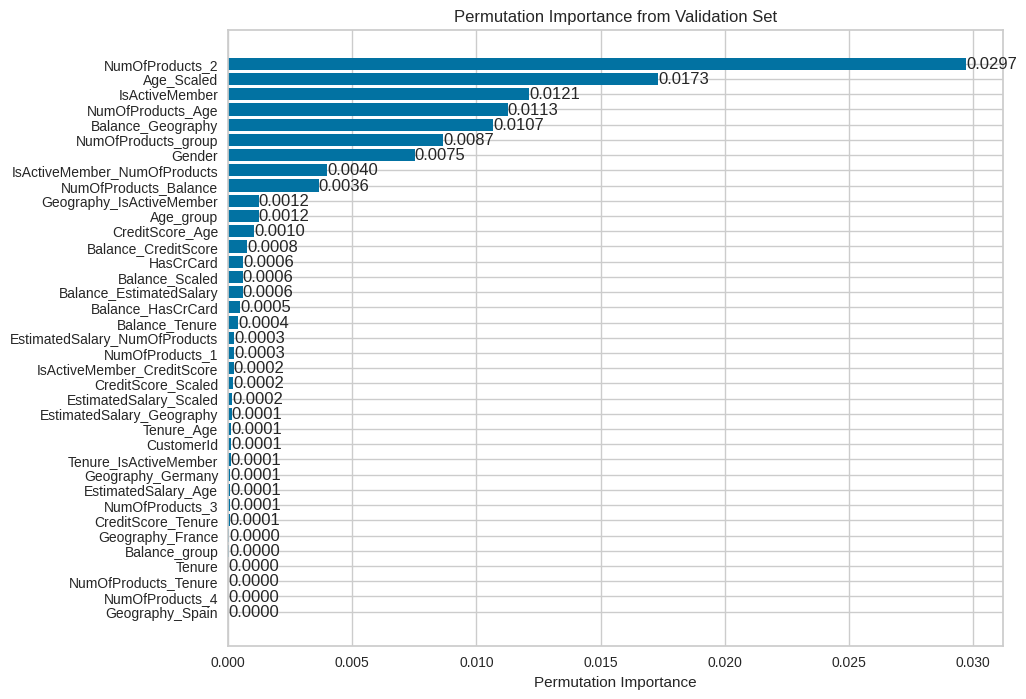

In [31]:
# 1. Feature Importance 계산 및 시각화(각 모델 feature importance 평균 사용)

def plot_feature_importance(model, model_columns):
    feature_importance = np.zeros(len(model_columns))
    for name, estimator in final_voting_model.named_estimators_.items():                            # named_estimators_ : 개별 추정기(estimator)들을 딕셔너리 형태로 저장
        if hasattr(estimator, "feature_importances_"):                                              # hasattr(객체, "속성_이름") : 객체가 속성을 갖고 있으면 True, 아니면 False 반환
            feature_importance += estimator.feature_importances_                                    # 각각의 모델 변수 중요도 더하기
    feature_importance /= len(final_voting_model.named_estimators_)                                 # 모델 개수로 나누기

    # Feature 중요도 시각화
    sorted_idx = np.argsort(feature_importance)[::-1]                                               # np.argsort() : 정렬된 값의 인덱스 반환 [start:stop:step] / [:: -1] -> 내림차순으로 변경
    sorted_features = np.array(model_columns)[sorted_idx]                                           # 변수 중요도에 따라 변수 명 정렬(인덱스따라)
    sorted_importances = feature_importance[sorted_idx]                                             # 변수 중요도에 따라 값 정렬

    plt.figure(figsize=(10, 8))
    bars = plt.barh(range(len(model_columns)), sorted_importances[::-1], align="center")            # barh : 가로 막대그래프 생성(기본적으로 y값 작은것부터 위로 쌓임) / sorted_importances[::-1] : 막대 길이 조정 / align : 막대 중심 위치
    plt.yticks(range(len(model_columns)), sorted_features[::-1])                                    # sorted_features[::-1] 사용 이유 : 위와 동일. 기본적으로 작은것부터 위로 쌓임
    plt.xlabel("Feature Importance")
    plt.title("Feature Importance from Model")

    # 막대에 값 표시
    for bar, value in zip(bars, sorted_importances[::-1]):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.2f}', va='center')    # plt.text(x, y, s, va='center') / bar.get_width() : 텍스트 x좌표, bar.get_y() + bar.get_height()/2 : 텍스트 y좌표, f'{value:.2f}', va='center' : 표시 할 텍스트

    plt.show()

# 2. Permutation Importance 계산 및 시각화
def plot_permutation_importance(model, X_valid, y_valid, feature_names):
    perm_importance = permutation_importance(
        model, X_valid, y_valid, scoring='roc_auc', n_repeats=5, random_state=42
    )

    # Feature 중요도 정렬
    sorted_idx = np.argsort(perm_importance.importances_mean)[::-1]                                 # 중요도 높은 순서로 정렬
    sorted_features = np.array(feature_names)[sorted_idx]                                           # 정렬된 변수명
    sorted_importances = perm_importance.importances_mean[sorted_idx]                               # 정렬된 변수 중요도

    # Feature 중요도 시각화
    plt.figure(figsize=(10, 8))
    bars = plt.barh(range(len(feature_names)), sorted_importances[::-1], align="center")            # 내림차순 정렬한 막대그래프
    plt.yticks(range(len(feature_names)), sorted_features[::-1])                                    # y축 변수명도 동일한 순서로 정렬
    plt.xlabel("Permutation Importance")
    plt.title("Permutation Importance from Validation Set")

    # 막대에 값 표시
    for bar, value in zip(bars, sorted_importances[::-1]):
        plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{value:.4f}', va='center')

    plt.show()

# Feature Importance 그래프 생성
plot_feature_importance(final_voting_model, train_feature.columns)

# Permutation Importance 그래프 생성
plot_permutation_importance(final_voting_model, X_valid, y_valid, train_feature.columns)

#### feature importance
- **Top 5**
    - CustomerID
    - **CreditScore_Age**
    - CreditScore_Scaled
    - CreditScore_Tenure
    - **EstimatedSalary_Age**

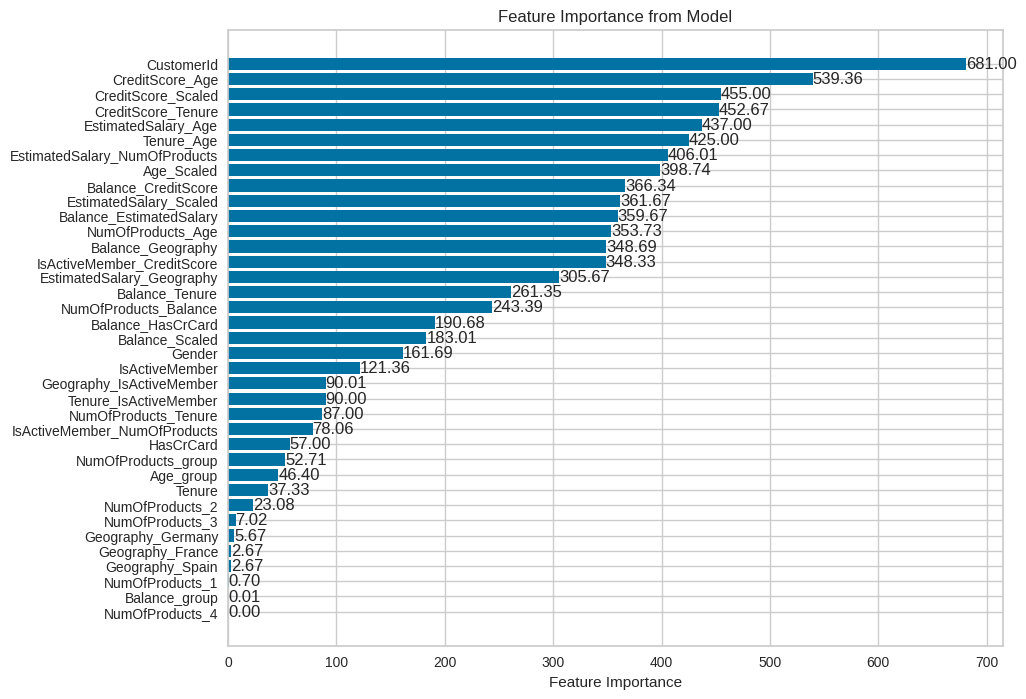

In [32]:
from IPython.display import Image

Image('/content/drive/MyDrive/파이널 프로젝트_이정수/분류/파생변수(의미)_feature_importance.png')

#### permutation importance
- **Top 5**
    - NumOfProducts_2
    - **Age_Scaled**
    - IsActiveMember
    - Gender
    - Balance_Geography

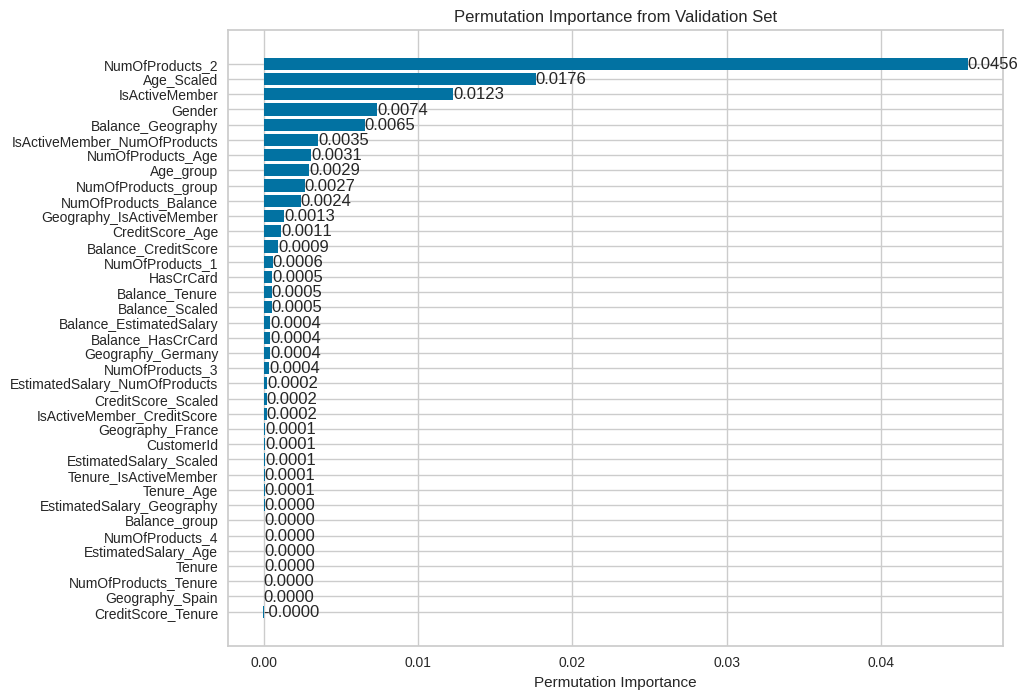

In [33]:
Image('/content/drive/MyDrive/파이널 프로젝트_이정수/분류/파생변수(의미)_permutation_importance.png')

#### 중요도 해석

- **결론**
    - Age가 포함된 변수가 공통적으로 다수 포함
    - **제거 할 변수**
        - **Balance_group**
            - Feature importance : 0.01
            - Permutation importance : 0.0000
            - VIF : 7.06
        - **CreditScore_Tenure**
            - Feature importance : 681.00
            - Permutation importance : 0.0000
            - VIF : 10.72824

# --

## 4.중요도 기반 재모델링
- 제거
    - Balance_group
    - CreditScore_Tenure

In [34]:
# 1. 전처리

train = pd.read_csv('/content/drive/MyDrive/파이널 프로젝트_이정수/분류/train.csv')
test = pd.read_csv('/content/drive/MyDrive/파이널 프로젝트_이정수/분류/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/파이널 프로젝트_이정수/분류/sample_submission.csv')

# train, test 동시 진행

# Id, Surname 제거
train.drop(columns=['id','Surname'],inplace=True)
test.drop(columns=['id','Surname'],inplace=True)

# 중복제거
train = train.drop_duplicates()

# 단일 범주 파생변수 생성
bins = [0,19,29,39,49,57,np.inf]
labels = [10,20,30,40,50,57]
train['Age_group'] = pd.cut(train['Age'], bins= bins,labels = labels,right=True)
test['Age_group'] = pd.cut(test['Age'], bins= bins,labels = labels,right=True)

# 로그 변환과 스케일링을 포함한 기능 정의
scaled_features = {
    'CreditScore': RobustScaler(),
    'EstimatedSalary': StandardScaler(),
    'Age': ('log', RobustScaler()),        # 로그 변환 후 스케일링
    'Balance': ('log1p', MinMaxScaler())   # 로그 변환 후 스케일링
}

# 스케일링 적용
for feature, scaled_info in scaled_features.items() :
  if isinstance(scaled_info, tuple) :
    log_info, scaler = scaled_info
    if log_info == 'log' :
      train_feature = np.log(train[[feature]])
      test_feature = np.log(test[[feature]])
    elif log_info == 'log1p' :
      train_feature = np.log1p(train[[feature]])
      test_feature = np.log1p(test[[feature]])
  else :
    scaler = scaled_info
    train_feature = train[[feature]]
    test_feature = test[[feature]]


  # 스케일링 적용
  scaled_feature = feature + '_Scaled'
  train[scaled_feature] = scaler.fit_transform(train_feature)
  test[scaled_feature] = scaler.transform(test_feature)

# 단일범주 파생 변수 생성2
def NumOfProducts_new_categorize(x) :
  if x == 1 :
    return 1
  elif x ==2 :
    return 2
  else :
    return 34

train['NumOfProducts_group'] = train['NumOfProducts'].apply(NumOfProducts_new_categorize)
test['NumOfProducts_group'] = test['NumOfProducts'].apply(NumOfProducts_new_categorize)

# 0 처리
# train
train['Tenure'] = train['Tenure'] + np.finfo(float).eps
test['Tenure'] = test['Tenure'] + np.finfo(float).eps
# test
train['Balance'] = train['Balance'] + np.finfo(float).eps
test['Balance'] = test['Balance'] + np.finfo(float).eps


# train, test 합치고 후에 분리 로 진행
combined = pd.concat([train,test])


# 고객 충성도(Tenure, NumOfPrudcts)
## Age + Tenure : 연령별 은행과의 관계 지속성
combined['Tenure_Age'] = combined['Tenure'] / combined['Age']

## Age + NumOfProducts : 연령별 이용 상품 수
combined['NumOfProducts_Age'] = combined['NumOfProducts'] / combined['Age']

## Balance + NumOfProducts : 잔고에 따른 이용 상품 수
combined['NumOfProducts_Balance'] = combined['NumOfProducts'] / combined['Balance']

## EstimatedSalary + NumOfProducts : 이용 상품 별 예상 소득
combined['EstimatedSalary_NumOfProducts'] = combined['EstimatedSalary'] / combined['NumOfProducts']

'''
'''

# 경제적 상황(Balance, EstimatedSalary, HasCrCard)

## Balance + EstimatedSalary : 예상 소득 대비 잔고 수준
combined['Balance_EstimatedSalary'] = combined['Balance'] / combined['EstimatedSalary']

## Balance + Tenure : 은행 이용 기간 대비 잔고
combined['Balance_Tenure'] = combined['Balance'] / combined['Tenure']

## Balance + CreditScore : 신용점수 대비 잔고
combined['Balance_CreditScore'] = combined['Balance'] / combined['CreditScore']

## Age + EstimatedSalary : 연령 대비 예상 소득
combined['EstimatedSalary_Age'] = combined['EstimatedSalary'] / combined['Age']

'''
'''
# 고객의 활동성(CreditScore, NumOfProducts, Tenure, IsActiveMember, HasCrCard)

## IsActiveMember + NumOfProducts : 활성회원과 이용 상품 수 관계 (6개 범주 만들기)
def IsActive_NumProducts(data) :
  if (data['IsActiveMember'] == 0) & (data['NumOfProducts'] == 1) :
    return 1
  elif (data['IsActiveMember'] == 0) & (data['NumOfProducts'] == 2) :
    return 2
  elif (data['IsActiveMember'] == 0) & (data['NumOfProducts'] == 3) :
    return 3
  elif (data['IsActiveMember'] == 1) & (data['NumOfProducts'] == 1) :
    return 11
  elif (data['IsActiveMember'] == 1) & (data['NumOfProducts'] == 2) :
    return 12
  else :
    return 13
combined['IsActiveMember_NumOfProducts'] = combined.apply(IsActive_NumProducts, axis=1)

## Tenure + NumOfProducts : 이용 기간 대비 이용 상품 수 ->
combined['NumOfProducts_Tenure'] = combined['NumOfProducts'] / combined['Tenure']

## IsActiveMember + CreditScore( 개인 신용점수 - 활동 여부 별 신용점수 평균)
combined['IsActiveMember_CreditScore'] = combined['CreditScore'] - combined.groupby('IsActiveMember')['CreditScore'].transform('mean')

## Tenure + IsActiveMember
combined['Tenure_IsActiveMember'] = combined['Tenure'] - combined.groupby('IsActiveMember')['Tenure'].transform('mean')

'''
'''

# 지역적 특성(Geography)
## Geography + Balance : 국가 대비 잔고 수준차이(개인잔고 - 지역별 평균 잔고)
combined['Balance_Geography'] = combined['Balance'] - combined.groupby('Geography')['Balance'].transform('mean')

## Geography + IsActiveMember : 국가 대비 고객 활동성 (6개 범주 만들기)
def IsActive_Geography(data) :
    if (data['IsActiveMember'] == 0) & (data['Geography'] == 'France') :
      return 'France_0'
    elif (data['IsActiveMember'] == 1) & (data['Geography'] == 'France') :
      return 'France_1'
    elif (data['IsActiveMember'] == 0) & (data['Geography'] == 'Germany') :
      return 'Germany_0'
    elif (data['IsActiveMember'] == 1) & (data['Geography'] == 'Germany') :
      return 'Germany_1'
    elif (data['IsActiveMember'] == 0) & (data['Geography'] == 'Spain') :
      return 'Spain_0'
    else :
      return 'Spain_1'

combined['Geography_IsActiveMember'] = combined.apply(IsActive_Geography, axis=1)

## Geography + EstimatedSalary : 개인 예상 연봉 - 지역 평균 예상 연봉
combined['EstimatedSalary_Geography'] = combined['EstimatedSalary'] - combined.groupby('Geography')['EstimatedSalary'].transform('mean')

# 리스크 관리(CreditScore, HasCrCard)
## CreditScore + Balance : 신용점수 대비 잔고 수준
combined['Balance_CreditScore'] = combined['Balance'] / combined['CreditScore']

## CreditScore + Age : 연령 별 신용점수
combined['CreditScore_Age'] = combined['CreditScore'] / combined['Age']

## Balance + HasCrCard : 신용카드 보유 여부 대비 잔고
combined['Balance_HasCrCard'] = combined['Balance'] - combined.groupby('HasCrCard')['Balance'].transform('mean')


# 인코딩
# 필요한 패키지 import(OneHotEncoder -> pd.get_dummies로 대체)
from sklearn.preprocessing import LabelEncoder
# Geography -> OneHot Encoding
combined = pd.get_dummies(combined, columns=['Geography'],dtype=int)

# Gender -> Label Encoding
encoder = LabelEncoder()
combined['Gender'] = encoder.fit_transform(combined['Gender'])

'''
- 매칭 값 확인 -
코드 :
    original_classes = encoder.classes_
    mapping = {}
    for i, original in enumerate(original_classes):
        mapping[original] = i
    print("매핑:", mapping)

결과 :
    매핑: {'Female': 0, 'Male': 1}
'''

# Tenure -> Label Encoding
encoder = LabelEncoder()
combined['Tenure'] = encoder.fit_transform(combined['Tenure'])

'''
- 매칭 값 확인 -
코드 :
    original_classes = encoder.classes_
    mapping = {}
    for i, original in enumerate(original_classes):
        mapping[original] = i
    print("매핑:", mapping)

결과 :
    매핑: {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10}
'''

# NumOfProducts -> OneHot Encoding
combined = pd.get_dummies(combined, columns=['NumOfProducts'],dtype=int)

# HasCrCard -> Label Encoding
encoder = LabelEncoder()
combined['HasCrCard'] = encoder.fit_transform(combined['HasCrCard'])

'''
- 매칭 값 확인 -
코드 :
    original_classes = encoder.classes_
    mapping = {}
    for i, original in enumerate(original_classes):
        mapping[original] = i
    print("매핑:", mapping)

결과 :
    매핑: {0.0: 0, 1.0: 1}
'''

# IsActiveMember -> Label Encoding

encoder = LabelEncoder()
combined['IsActiveMember'] = encoder.fit_transform(combined['IsActiveMember'])

'''
- 매칭 값 확인 -
코드 :
    original_classes = encoder.classes_
    mapping = {}
    for i, original in enumerate(original_classes):
        mapping[original] = i
    print("매핑:", mapping)

결과 :
    매핑: {0.0: 0, 1.0: 1}
'''

# Age_group
# train['Age_group'].unique()
Age_group_mapping = {10:1, 20:2, 30:3 , 40:4, 50:5, 57: 6}
combined['Age_group'] = combined['Age_group'].map(Age_group_mapping)

# Geography_IsActiveMember
# train['Geography_IsActiveMember'].unique() # ['France_0', 'France_1', 'Spain_1', 'Germany_0', 'Spain_0', 'Germany_1']
Geography_IsActiveMember_mapping = {'France_0':1, 'France_1':2, 'Spain_0':3, 'Spain_1':4, 'Germany_0':5, 'Germany_1':6}
combined['Geography_IsActiveMember'] = combined['Geography_IsActiveMember'].map(Geography_IsActiveMember_mapping)

# 스케일링 원 변수 제거
combined.drop(columns = ['Age','Balance','CreditScore','EstimatedSalary'],inplace=True)

train = combined.iloc[:train.shape[0]].copy()
test = combined.iloc[train.shape[0]:].copy()

# test 데이터 타겟 변수 제거
test.drop(columns = 'Exited', inplace=True)

In [35]:
# 2.모델링

# feature, target 분리
train_feature = train.drop(columns='Exited')
train_target = train['Exited']

# 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(train_feature, train_target,
                                                      test_size = 0.3,
                                                      random_state=0)

In [ ]:
# 2.모델링

# AutoML
# 인덱스 번호 새로 할당
X_train_automl = X_train.reset_index(drop=True)
y_train_automl = y_train.reset_index(drop=True)

# X_train, y_train 합치기
Xy_train_automl = pd.concat([X_train_automl, y_train_automl], axis=1)

# AutoML 모델 세팅
clf = setup(data=Xy_train_automl,
            target = 'Exited',
            train_size = 0.7,
            data_split_shuffle=True,
            session_id = 0,
            fold = 5
            )

# AutoML top5 model 설정
top5_model = compare_models(fold=5, round=3, n_select=5, sort = 'AUC', errors='ignore',verbose=True)
top5_model

,Description,Value
0,Session id,0
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(115502, 36)"
4,Transformed data shape,"(115502, 41)"
5,Transformed train set shape,"(80851, 41)"
6,Transformed test set shape,"(34651, 41)"
7,Numeric features,34
8,Categorical features,1
9,Preprocess,True


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.864,0.886,0.535,0.748,0.624,0.544,0.555,45.168
lightgbm,Light Gradient Boosting Machine,0.863,0.886,0.549,0.738,0.629,0.548,0.557,6.604
catboost,CatBoost Classifier,0.863,0.885,0.545,0.738,0.627,0.546,0.555,34.478
ada,Ada Boost Classifier,0.862,0.884,0.543,0.737,0.625,0.543,0.553,9.206
xgboost,Extreme Gradient Boosting,0.860,0.878,0.550,0.722,0.624,0.540,0.548,3.840
ridge,Ridge Classifier,0.859,0.877,0.474,0.768,0.586,0.507,0.528,0.558
lda,Linear Discriminant Analysis,0.859,0.874,0.558,0.712,0.625,0.540,0.546,0.770
rf,Random Forest Classifier,0.859,0.872,0.533,0.728,0.615,0.532,0.541,27.314
et,Extra Trees Classifier,0.855,0.865,0.536,0.706,0.609,0.522,0.530,15.020
qda,Quadratic Discriminant Analysis,0.785,0.741,0.042,0.201,0.064,0.035,0.044,0.954


Processing:   0%|          | 0/73 [00:00<?, ?it/s]

[GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=0, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=0, reg_alpha=0.0, reg_lambda=0

### optuna

- GBC
```
Best AUC: 0.8881716017412291
Best hyperparameters:
  n_estimators: 306
  learning_rate: 0.13703881640424945
  max_depth: 4
  min_samples_split: 3
  min_samples_leaf: 3
  subsample: 0.9445270800712589
  max_features: log2
  loss: exponential
  ccp_alpha: 2.8384467094309904e-05
  validation_fraction: 0.28861432470314685
  n_iter_no_change: 18
  tol: 0.003292168493890127
  min_impurity_decrease: 0.06206179531947495
  max_leaf_nodes: 63
```
- LightGBM
```
Best AUC: 0.8894890596238593
Best hyperparameters:
  num_boost_round: 787
  learning_rate: 0.01655085455833034
  num_leaves: 40
  max_depth: 9
  min_data_in_leaf: 56
  feature_fraction: 0.6418202481719244
  bagging_fraction: 0.645916077947058
  bagging_freq: 2
  min_gain_to_split: 0.5064123433302721
  lambda_l1: 0.07012143653987062
  lambda_l2: 0.09764150870955571
  tree_learner: serial
  max_bin: 386
  early_stopping_rounds: 25
  num_threads: 4
  scale_pos_weight: 3.8434903468270747
```
- AdaBoost
```
Best AUC: 0.8874169652866769
Best hyperparameters:
  n_estimators: 146
  learning_rate: 0.08520098897894984
  algorithm: SAMME.R
  random_state: 802
  max_depth: 5
  min_samples_split: 20
  min_samples_leaf: 3
  max_features: None
  max_leaf_nodes: 15
  min_impurity_decrease: 0.0003927552574830781
```
- XGBoost
```
Best AUC: 0.8877248497094786
Best hyperparameters:
  num_round: 454
  alpha: 0.40652589353810326
  base_score: 0.8480874400205671
  booster: gbtree
  colsample_bylevel: 0.8469354484548803
  colsample_bynode: 0.9995135598162135
  colsample_bytree: 0.9891525620754378
  eta: 0.27890538121311964
  eval_metric: auc
  gamma: 0.9890045644329901
  grow_policy: depthwise
  lambda: 8.316565190053003
  max_bin: 264
  max_delta_step: 9
  max_depth: 6
  max_leaves: 47
  min_child_weight: 1.3266241122837017
  objective: binary:logistic
  scale_pos_weight: 8.66718236582756
  seed: 775
  subsample: 0.8855554855188931
  verbosity: 3
  early_stopping_rounds: 31
```
- CatBoost
```
Best AUC: 0.8894422429062463
Best hyperparameters:
  iterations: 524
  learning_rate: 0.08616825811471435
  depth: 3
  l2_leaf_reg: 0.3995590038558608
  random_strength: 0.32389909847293613
  bagging_temperature: 0.09678886582783942
  grow_policy: SymmetricTree
  border_count: 96
  od_wait: 40
```


#### GBC : Gradient Boosting Classifier

In [ ]:
sampler = TPESampler(seed=0)

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'max_features': trial.suggest_categorical('max_features', ['sqrt', 'log2', None]),
        'loss': trial.suggest_categorical('loss', ['log_loss', 'exponential']),
        'ccp_alpha': trial.suggest_float('ccp_alpha', 0.0, 0.1),
        'random_state': 0,
        'validation_fraction': trial.suggest_float('validation_fraction', 0.1, 0.3),
        'n_iter_no_change': trial.suggest_int('n_iter_no_change', 5, 20),
        'tol': trial.suggest_float('tol', 1e-4, 1e-2),
        'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.1),
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 10, 100),
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    auc_list = []

    for _, (train_index, valid_index) in enumerate(cv.split(train_feature,train_target)):
        X_train, y_train = train_feature.iloc[train_index], train_target.iloc[train_index]
        X_valid, y_valid = train_feature.iloc[valid_index], train_target.iloc[valid_index]


        gbc_model = GradientBoostingClassifier(**params)
        gbc_model.fit(X_train, y_train)

        # 예측 확률 계산
        y_prob = gbc_model.predict_proba(X_valid)[:,1]
        auc_score = roc_auc_score(y_valid, y_prob)
        auc_list.append(auc_score)

    # 평균 auc 반환
    mean_auc = np.mean(auc_list)
    return mean_auc

# optuna 최적화 실행(AUC 최대화)
optuna_gbc = optuna.create_study(direction='maximize', sampler=sampler)
optuna_gbc.optimize(objective, n_trials=50)

# 최적 결과 출력
best_trial = optuna_gbc.best_trial
print(f"Best AUC: {best_trial.value}")
print("Best hyperparameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")

[I 2024-12-16 11:15:08,853] A new study created in memory with name: no-name-b2db1a0b-2c50-4896-aaed-6f7a394bf2df
[I 2024-12-16 11:17:56,991] Trial 0 finished with value: 0.8377810182626352 and parameters: {'n_estimators': 320, 'learning_rate': 0.14588597961075972, 'max_depth': 7, 'min_samples_split': 6, 'min_samples_leaf': 5, 'subsample': 0.8583576452266624, 'max_features': None, 'loss': 'exponential', 'ccp_alpha': 0.05288949197529045, 'validation_fraction': 0.21360891221878647, 'n_iter_no_change': 19, 'tol': 0.0008032569761590808, 'min_impurity_decrease': 0.008712929970154071, 'max_leaf_nodes': 11}. Best is trial 0 with value: 0.8377810182626352.
[I 2024-12-16 11:18:22,435] Trial 1 finished with value: 0.842226769841966 and parameters: {'n_estimators': 433, 'learning_rate': 0.1578497826804716, 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 8, 'subsample': 0.7845917449011728, 'max_features': 'sqrt', 'loss': 'exponential', 'ccp_alpha': 0.05218483217500717, 'validation_fra

Best AUC: 0.8881716017412291
Best hyperparameters:
  n_estimators: 306
  learning_rate: 0.13703881640424945
  max_depth: 4
  min_samples_split: 3
  min_samples_leaf: 3
  subsample: 0.9445270800712589
  max_features: log2
  loss: exponential
  ccp_alpha: 2.8384467094309904e-05
  validation_fraction: 0.28861432470314685
  n_iter_no_change: 18
  tol: 0.003292168493890127
  min_impurity_decrease: 0.06206179531947495
  max_leaf_nodes: 63


#### lightGBM : Light Gradient Boosting Machine

In [ ]:
sampler = TPESampler(seed=0)

def objective(trial):
    params = {
        'num_boost_round': trial.suggest_int('num_boost_round', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('num_leaves', 31, 128),
        'max_depth': trial.suggest_int('max_depth', -1, 15),
        'min_data_in_leaf': trial.suggest_int('min_data_in_leaf', 20, 100),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.6, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.6, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_gain_to_split': trial.suggest_float('min_gain_to_split', 0.0, 1.0),
        'lambda_l1': trial.suggest_float('lambda_l1', 0.0, 0.1),
        'lambda_l2': trial.suggest_float('lambda_l2', 0.0, 0.1),
        'tree_learner': trial.suggest_categorical('tree_learner', ['serial', 'feature', 'data', 'voting']),
        'max_bin': trial.suggest_int('max_bin', 255, 512),
        'early_stopping_rounds': trial.suggest_int('early_stopping_rounds', 10, 50),
        'metric': 'auc',
        'num_threads': trial.suggest_int('num_threads', 1, 8),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 1.0, 5.0),
        'verbosity': 0
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    auc_list = []

    for _, (train_index, valid_index) in enumerate(cv.split(train_feature,train_target)):
        X_train, y_train = train_feature.iloc[train_index], train_target.iloc[train_index]
        X_valid, y_valid = train_feature.iloc[valid_index], train_target.iloc[valid_index]

        # LightGBM 모델 학습
        train_data = lgb.Dataset(X_train, label=y_train)
        valid_data = lgb.Dataset(X_valid, label=y_valid)

        # lightGBM 모델 학습
        lgb_model = lgb.train(
            params,
            train_data,
            valid_sets = [train_data, valid_data]
        )

        # 예측 확률 계산
        y_prob = lgb_model.predict(X_valid)
        auc_score = roc_auc_score(y_valid, y_prob)
        auc_list.append(auc_score)

    # 평균 auc 반환
    mean_auc = np.mean(auc_list)
    return mean_auc

# optuna 최적화 실행(AUC 최대화)
optuna_lgb = optuna.create_study(direction='maximize', sampler=sampler)
optuna_lgb.optimize(objective, n_trials=50)

# 최적 결과 출력
best_trial = optuna_lgb.best_trial
print(f"Best AUC: {best_trial.value}")
print("Best hyperparameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")

#### XGBoost : Extreme Gradient Boosting

In [ ]:
sampler = TPESampler(seed=0)

def objective(trial):
    params = {
        'num_round': trial.suggest_int('num_round', 100, 1000),
        'alpha': trial.suggest_float('alpha', 0.0, 1.0),
        'base_score': trial.suggest_float('base_score', 0.0, 1.0),
        'booster': trial.suggest_categorical('booster', ['gbtree']),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.1, 1.0),
        'colsample_bynode': trial.suggest_float('colsample_bynode', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
        'eta': trial.suggest_float('eta', 0.01, 0.3),
        'eval_metric': trial.suggest_categorical('eval_metric', ['auc']),
        'gamma': trial.suggest_float('gamma', 0.0, 1.0),
        'grow_policy': trial.suggest_categorical('grow_policy', ['depthwise', 'lossguide']),
        'lambda': trial.suggest_float('lambda', 0.0, 10.0),
        'max_bin': trial.suggest_int('max_bin', 10, 512),
        'max_delta_step': trial.suggest_int('max_delta_step', 0, 10),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'max_leaves': trial.suggest_int('max_leaves', 0, 50),
        'min_child_weight': trial.suggest_float('min_child_weight', 0.1, 10.0),
        'objective': trial.suggest_categorical('objective', ['binary:logistic']),
        'scale_pos_weight': trial.suggest_float('scale_pos_weight', 0.1, 10.0),
        'seed': trial.suggest_int('seed', 0, 1000),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'verbosity': trial.suggest_int('verbosity', 0, 3),
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    auc_list = []

    for _, (train_index, valid_index) in enumerate(cv.split(train_feature,train_target)):
        X_train, y_train = train_feature.iloc[train_index], train_target.iloc[train_index]
        X_valid, y_valid = train_feature.iloc[valid_index], train_target.iloc[valid_index]

        dtrain = xgb.DMatrix(X_train, label=y_train,enable_categorical=True)
        dvalid = xgb.DMatrix(X_valid, label=y_valid,enable_categorical=True)

        xgb_model = xgb.train(
            params,
            dtrain,
            evals=[(dtrain, 'train'), (dvalid, 'valid')],
            early_stopping_rounds=trial.suggest_int('early_stopping_rounds', 10, 100)
        )

        # 예측 확률 계산
        y_prob = xgb_model.predict(dvalid)
        auc_score = roc_auc_score(y_valid, y_prob)
        auc_list.append(auc_score)

    # 평균 auc 반환
    mean_auc = np.mean(auc_list)
    return mean_auc

# optuna 최적화 실행(AUC 최대화)
optuna_xgb = optuna.create_study(direction='maximize', sampler=sampler)
optuna_xgb.optimize(objective, n_trials=50)

# 최적 결과 출력
best_trial = optuna_xgb.best_trial
print(f"Best AUC: {best_trial.value}")
print("Best hyperparameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")

#### Ada : Ada Boost Classifier

In [ ]:
sampler = TPESampler(seed=0)

def objective(trial):
    params = {
        # AdaBoost의 핵심 하이퍼파라미터들
        'n_estimators': trial.suggest_int('n_estimators', 10, 500),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'algorithm': trial.suggest_categorical('algorithm', ['SAMME', 'SAMME.R']),
        'random_state': trial.suggest_int('random_state', 0, 1000)
    }

    # 기본 학습기 (약한 학습기)로 결정 트리 사용 시 세부 파라미터 설정
    base_estimator_params = {
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 20),
        'max_features': trial.suggest_categorical('max_features', [None, 'sqrt', 'log2']),
        'max_leaf_nodes': trial.suggest_int('max_leaf_nodes', 10, 100, log=True),
        'min_impurity_decrease': trial.suggest_float('min_impurity_decrease', 0.0, 0.1)
    }


    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    auc_list = []

    for _, (train_index, valid_index) in enumerate(cv.split(train_feature,train_target)):
        X_train, y_train = train_feature.iloc[train_index], train_target.iloc[train_index]
        X_valid, y_valid = train_feature.iloc[valid_index], train_target.iloc[valid_index]


        base_estimator = DecisionTreeClassifier(**base_estimator_params)


        ada_model = AdaBoostClassifier(estimator=  base_estimator, **params)
        ada_model.fit(X_train,y_train)

        # 예측 확률 계산
        y_prob = ada_model.predict_proba(X_valid)[:,1]
        auc_score = roc_auc_score(y_valid, y_prob)
        auc_list.append(auc_score)

    # 평균 auc 반환
    mean_auc = np.mean(auc_list)
    return mean_auc

# optuna 최적화 실행(AUC 최대화)
optuna_ada = optuna.create_study(direction='maximize', sampler=sampler)
optuna_ada.optimize(objective, n_trials=50)

# 최적 결과 출력
best_trial = optuna_ada.best_trial
print(f"Best AUC: {best_trial.value}")
print("Best hyperparameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")

[I 2024-12-16 12:41:21,253] A new study created in memory with name: no-name-a961bcfd-5b23-4165-95da-4d80d9052dc0
[I 2024-12-16 12:48:01,634] Trial 0 finished with value: 0.7894803361096894 and parameters: {'n_estimators': 279, 'learning_rate': 0.269388301928541, 'algorithm': 'SAMME', 'random_state': 424, 'max_depth': 7, 'min_samples_split': 10, 'min_samples_leaf': 18, 'max_features': None, 'max_leaf_nodes': 33, 'min_impurity_decrease': 0.056804456109393234}. Best is trial 0 with value: 0.7894803361096894.
[I 2024-12-16 13:04:45,781] Trial 1 finished with value: 0.8183029615874545 and parameters: {'n_estimators': 464, 'learning_rate': 0.013869861245357327, 'algorithm': 'SAMME', 'random_state': 833, 'max_depth': 8, 'min_samples_split': 18, 'min_samples_leaf': 20, 'max_features': None, 'max_leaf_nodes': 13, 'min_impurity_decrease': 0.06399210213275239}. Best is trial 1 with value: 0.8183029615874545.
[I 2024-12-16 13:05:01,092] Trial 2 finished with value: 0.716677723953646 and parameter

KeyboardInterrupt: 

#### Catboost : CatBoost Classifier

- 런타임 문제로 vscode에서 작동

In [ ]:
sampler = TPESampler(seed=0)

def objective(trial):
    # 하이퍼파라미터 정의
    params = {
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "learning_rate": trial.suggest_loguniform("learning_rate", 1e-4, 1.0),
        "depth": trial.suggest_int("depth", 1, 16),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-2, 10.0),
        "random_strength": trial.suggest_loguniform("random_strength", 1e-2, 10.0),
        "bagging_temperature": trial.suggest_loguniform("bagging_temperature", 1e-5, 10.0),
        "grow_policy": trial.suggest_categorical("grow_policy", ["SymmetricTree", "Depthwise", "Lossguide"]),
        "border_count": trial.suggest_int("border_count", 1, 255),
        "thread_count": -1,
        "random_seed": 42,
        "eval_metric": "AUC",
        "verbose": 0,
        "od_type": "Iter",
        "od_wait": trial.suggest_int("od_wait", 10, 50),
        "task_type": "CPU",
        "loss_function": "Logloss"
    }

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)
    auc_list = []

    # 범주형 컬럼 자동 감지
    cat_features_indices = [
        train_feature.columns.get_loc(col)
        for col in train_feature.select_dtypes(include=['category']).columns
    ]

    for _, (train_index, valid_index) in enumerate(cv.split(train_feature, train_target)):
        X_train, y_train = train_feature.iloc[train_index], train_target.iloc[train_index]
        X_valid, y_valid = train_feature.iloc[valid_index], train_target.iloc[valid_index]

        # CatBoostClassifier 초기화 및 학습
        cat_model = CatBoostClassifier(**params)
        cat_model.fit(
            X_train, y_train,
            eval_set=(X_valid, y_valid),
            early_stopping_rounds=50,
            verbose=0,
            cat_features=cat_features_indices  # 범주형 컬럼 지정
        )

        # 예측 확률 계산
        y_score = cat_model.predict_proba(X_valid)[:, 1]
        auc_score = roc_auc_score(y_valid, y_score)
        auc_list.append(auc_score)

    # 평균 auc 반환
    mean_auc = np.mean(auc_list)
    return mean_auc

# optuna 최적화 실행(AUC 최대화)
optuna_cat = optuna.create_study(direction='maximize', sampler=sampler)
optuna_cat.optimize(objective, n_trials=50)

# 최적 결과 출력
best_trial = optuna_cat.best_trial
print(f"Best AUC: {best_trial.value}")
print("Best hyperparameters:")
for key, value in best_trial.params.items():
    print(f"  {key}: {value}")


### 보팅

#### 조합 생성

In [36]:
from itertools import combinations

models = ['lightgbm','gbc','ada','xgboost','catboost']

model_combinations = []
for i in range(1,len(models) + 1) :
  model_combinations.extend(combinations(models,i))


for combo in model_combinations :
  print(combo)

('lightgbm',)
('gbc',)
('ada',)
('xgboost',)
('catboost',)
('lightgbm', 'gbc')
('lightgbm', 'ada')
('lightgbm', 'xgboost')
('lightgbm', 'catboost')
('gbc', 'ada')
('gbc', 'xgboost')
('gbc', 'catboost')
('ada', 'xgboost')
('ada', 'catboost')
('xgboost', 'catboost')
('lightgbm', 'gbc', 'ada')
('lightgbm', 'gbc', 'xgboost')
('lightgbm', 'gbc', 'catboost')
('lightgbm', 'ada', 'xgboost')
('lightgbm', 'ada', 'catboost')
('lightgbm', 'xgboost', 'catboost')
('gbc', 'ada', 'xgboost')
('gbc', 'ada', 'catboost')
('gbc', 'xgboost', 'catboost')
('ada', 'xgboost', 'catboost')
('lightgbm', 'gbc', 'ada', 'xgboost')
('lightgbm', 'gbc', 'ada', 'catboost')
('lightgbm', 'gbc', 'xgboost', 'catboost')
('lightgbm', 'ada', 'xgboost', 'catboost')
('gbc', 'ada', 'xgboost', 'catboost')
('lightgbm', 'gbc', 'ada', 'xgboost', 'catboost')


#### 가중치

In [37]:
roc_score = {
    'lightgbm' : 0.8894890596238593,
    'gbc' : 0.8881716017412291,
    'ada' : 0.8874169652866769,
    'xgboost' : 0.8877248497094786,
    'catboost' : 0.8894422429062463
}

total_roc = sum(roc_score.values())
weights = {model : roc_score[model] / total_roc for model in roc_score}

#### 소프트 보팅 구현

In [ ]:
# 범주형 컬럼 자동 감지
cat_features_indices = [
    train_feature.columns.get_loc(col)
    for col in train_feature.select_dtypes(include=['category']).columns
]


models_dict = {
    'lightgbm': LGBMClassifier(
        n_estimators=787,
        learning_rate=0.01655085455833034,
        num_leaves=40,
        max_depth=9,
        min_data_in_leaf=56,
        feature_fraction=0.6418202481719244,
        bagging_fraction=0.645916077947058,
        bagging_freq=2,
        min_split_gain=0.5064123433302721,
        reg_alpha=0.07012143653987062,
        reg_lambda=0.09764150870955571,
        tree_learner='serial',
        max_bin=386,
        num_threads=4,
        scale_pos_weight=3.8434903468270747
    ),
    'gbc': GradientBoostingClassifier(
        n_estimators=306,
        learning_rate=0.13703881640424945,
        max_depth=4,
        min_samples_split=3,
        min_samples_leaf=3,
        subsample=0.9445270800712589,
        max_features='log2',
        loss='exponential',
        ccp_alpha=2.8384467094309904e-05,
        validation_fraction=0.28861432470314685,
        n_iter_no_change=18,
        tol=0.003292168493890127,
        min_impurity_decrease=0.06206179531947495,
        max_leaf_nodes=63
    ),
    'ada': AdaBoostClassifier(
        estimator=DecisionTreeClassifier(
            max_depth=5,
            min_samples_split=20,
            min_samples_leaf=3,
            max_features=None,
            max_leaf_nodes=15,
            min_impurity_decrease=0.0003927552574830781
        ),
        n_estimators=146,
        learning_rate=0.08520098897894984,
        algorithm='SAMME.R',
        random_state=802
    ),
    'xgboost': XGBClassifier(
        n_estimators=454,
        alpha=0.40652589353810326,
        base_score=0.8480874400205671,
        booster='gbtree',
        colsample_bylevel=0.8469354484548803,
        colsample_bynode=0.9995135598162135,
        colsample_bytree=0.9891525620754378,
        learning_rate=0.27890538121311964,
        eval_metric='auc',
        gamma=0.9890045644329901,
        grow_policy='depthwise',
        reg_lambda=8.316565190053003,
        max_bin=264,
        max_delta_step=9,
        max_depth=6,
        max_leaves=47,
        min_child_weight=1.3266241122837017,
        objective='binary:logistic',
        scale_pos_weight=8.66718236582756,
        seed=775,
        subsample=0.8855554855188931,
        verbosity=3,
        enable_categorical=True
    ),
    'catboost': CatBoostClassifier(
        iterations=524,
        learning_rate=0.08616825811471435,
        depth=3,
        l2_leaf_reg=0.3995590038558608,
        random_strength=0.32389909847293613,
        bagging_temperature=0.09678886582783942,
        grow_policy='SymmetricTree',
        border_count=96,
        od_wait=40,
        cat_features=cat_features_indices,
        verbose=0,
        random_state=42
    )
}


# 소프트 보팅 성능 평가
best_combo = None
best_auc = 0
results = []

# 교차검증 설정
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for combo in model_combinations:
    estimators = [(name, models_dict[name]) for name in combo]
    weights_for_combo = [weights[name] for name in combo]

    voting_clf = VotingClassifier(
        estimators=estimators,
        voting='soft',
        weights=weights_for_combo
    )

    roc_list = []  # 교차검증 roc 기록

    # 교차 검증 루프
    for train_idx, valid_idx in cv.split(train_feature, train_target):
        X_train, y_train = train_feature.iloc[train_idx], train_target.iloc[train_idx]
        X_valid, y_valid = train_feature.iloc[valid_idx], train_target.iloc[valid_idx]

        # CatBoost용 범주형 데이터 처리
        if 'catboost' in combo:
            X_train = X_train.copy()
            X_valid = X_valid.copy()
            for col in train_feature.select_dtypes(include=['category']).columns:
                X_train[col] = X_train[col].cat.codes
                X_valid[col] = X_valid[col].cat.codes

        # 모델 학습
        voting_clf.fit(X_train, y_train)

        # 예측 및 ROC 계산
        y_prob = voting_clf.predict_proba(X_valid)[:, 1]
        roc = roc_auc_score(y_valid, y_prob)
        roc_list.append(roc)

    # 교차 검증 평균 AUC 계산
    mean_roc = sum(roc_list) / len(roc_list)

    # 결과 저장
    results.append({
        "combination": combo,
        "mean_roc": mean_roc,
        "roc_per_fold": roc_list,  # 폴드별 점수 추가
        "weights": weights_for_combo
    })

# 결과 정렬 (ROC 기준 내림차순)
results = sorted(results, key=lambda x: x["mean_roc"], reverse=True)

# 모든 결과 출력
print("=" * 50)
print("All Voting Model Results:")
print("=" * 50)
for result in results:
    print(f"Combination: {result['combination']}, Mean ROC: {result['mean_roc']:.4f}, "
          f"Fold AUCs: {result['roc_per_fold']}, Weights: {result['weights']}")

# 최적의 결과 출력
best_result = results[0]  # 가장 높은 점수
print("=" * 50)
print(f"Best Model Combination: {best_result['combination']}")
print(f"Best AUC: {best_result['mean_roc']:.4f}")
print(f"Fold AUCs: {best_result['roc_per_fold']}")
print(f"Best Weights: {best_result['weights']}")
print("=" * 50)

### 최종모델

```
Best Model Combination: ('lightgbm', 'ada', 'catboost')
Best AUC: 0.8897
Fold AUCs: [0.887680390844541, 0.8901420151662042, 0.8925261036359157, 0.8896599080597734, 0.8885884801161994]
Best Weights: [0.20023414193411043, 0.1997676898433026, 0.2002236029565053]
```

- 모델 생성
```
Final Model AUC Score: 0.8907
```

In [38]:
# feature, target 분리
train_feature = train.drop(columns='Exited')
train_target = train['Exited']

# 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(train_feature, train_target,
                                                      test_size = 0.3,
                                                      random_state=0)

# 범주형 컬럼 자동 감지
cat_features_indices = [
    train_feature.columns.get_loc(col)
    for col in train_feature.select_dtypes(include=['category']).columns
]

final_models = {
    'lightgbm': LGBMClassifier(
        n_estimators=787,
        learning_rate=0.01655085455833034,
        num_leaves=40,
        max_depth=9,
        min_data_in_leaf=56,
        feature_fraction=0.6418202481719244,
        bagging_fraction=0.645916077947058,
        bagging_freq=2,
        min_split_gain=0.5064123433302721,
        reg_alpha=0.07012143653987062,
        reg_lambda=0.09764150870955571,
        tree_learner='serial',
        max_bin=386,
        num_threads=4,
        scale_pos_weight=3.8434903468270747
    ),
    'ada': AdaBoostClassifier(
        estimator=DecisionTreeClassifier(
            max_depth=5,
            min_samples_split=20,
            min_samples_leaf=3,
            max_features=None,
            max_leaf_nodes=15,
            min_impurity_decrease=0.0003927552574830781
        ),
        n_estimators=146,
        learning_rate=0.08520098897894984,
        algorithm='SAMME.R',
        random_state=802
    )
    ,
    'catboost': CatBoostClassifier(
        iterations=524,
        learning_rate=0.08616825811471435,
        depth=3,
        l2_leaf_reg=0.3995590038558608,
        random_strength=0.32389909847293613,
        bagging_temperature=0.09678886582783942,
        grow_policy='SymmetricTree',
        border_count=96,
        od_wait=40,
        cat_features=cat_features_indices,
        verbose=0,
        random_state=42
    )
}

# 소프트 보팅 모델 생성
final_voting_model = VotingClassifier(
    estimators=[('lightgbm', final_models['lightgbm']), ('ada', final_models['ada']),('catboost', final_models['catboost'])],
    voting='soft',
    weights=[0.20023414193411043, 0.1997676898433026, 0.2002236029565053]  # 최적 가중치 적용
)

# 학습
final_voting_model.fit(X_train, y_train)

# 예측
y_prob = final_voting_model.predict_proba(X_valid)[:, 1]
auc_score = roc_auc_score(y_valid, y_prob)

# 결과 출력
print(f"Final Model AUC Score: {auc_score:.4f}")

[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] feature_fraction is set=0.6418202481719244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6418202481719244
[LightGBM] [Warning] bagging_fraction is set=0.645916077947058, subsample=1.0 will be ignored. Current value: bagging_fraction=0.645916077947058
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] feature_fraction is set=0.6418202481719244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6418202481719244
[LightGBM] [Warning] bagging_fraction is set=0.645916077947058, subsample=1.0 will be ignored. Current value: bagging_fraction=0.645916077947058
[LightGBM] [Warning] bagging_freq is set=2, subsam

#### 중요도 기반 재모델링 제출 파일 생성

In [ ]:
# 테스트 데이터 예측
test_prob = final_voting_model.predict_proba(test)[:, 1]

submission['Exited'] = test_prob
submission.to_csv('third_mean_edit_submission.csv',index=False)

[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] feature_fraction is set=0.6418202481719244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6418202481719244
[LightGBM] [Warning] bagging_fraction is set=0.645916077947058, subsample=1.0 will be ignored. Current value: bagging_fraction=0.645916077947058
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


# 최종 모델_1
- 성능 : Final Model AUC Score: 0.8905

In [ ]:
# 기본 패키지
import pandas as pd  # 데이터프레임 생성 및 조작
import numpy as np  # 수치 계산 및 배열 처리

# 시각화
import matplotlib.pyplot as plt  # 기본적인 시각화 도구
import seaborn as sns  # 고급 시각화 도구 (matplotlib 기반)

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder  # 레이블 인코딩
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler  # 데이터 스케일링
# pd.get_dummies로 OneHotEncoder 대체 가능

# 데이터 분할
from sklearn.model_selection import train_test_split  # 데이터 분리
from sklearn.model_selection import StratifiedKFold  # 층화 교차 검증

# 필요한 패키지 import(분산팽창계수(VIF))
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 머신러닝 모델들
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting 모델
from sklearn.ensemble import RandomForestClassifier  # Random Forest 모델
from sklearn.ensemble import AdaBoostClassifier  # AdaBoost 모델
from sklearn.tree import DecisionTreeClassifier  # 의사결정 트리 모델

# LightGBM
from lightgbm import LGBMClassifier  # LightGBM 분류기
import lightgbm as lgb  # LightGBM 라이브러리

# XGBoost
from xgboost import XGBClassifier  # XGBoost 분류기
import xgboost as xgb  # XGBoost 라이브러리

# CatBoost
from catboost import CatBoostClassifier, Pool  # CatBoost 분류기 및 데이터 준비 객체
from catboost.utils import eval_metric  # CatBoost 평가 지표 계산

# 성능 평가 지표
from sklearn.metrics import roc_auc_score  # ROC AUC 점수 계산

# 모델 앙상블
from sklearn.ensemble import VotingClassifier  # 앙상블 학습을 위한 VotingClassifier

# 기타 도구
from itertools import combinations  # 조합 생성
from sklearn.inspection import permutation_importance  # 변수 중요도 계산 (Permutation Importance)

# 출력 관련
from IPython.display import Image  # Jupyter Notebook에서 이미지 표시

# PyCaret: AutoML (자동화된 머신러닝 워크플로우)
from pycaret.classification import *

# 설정
pd.set_option('display.max_columns', None)  # 최대 컬럼 설정

In [ ]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/파이널 프로젝트_이정수/분류/train.csv')
test = pd.read_csv('/content/drive/MyDrive/파이널 프로젝트_이정수/분류/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/파이널 프로젝트_이정수/분류/sample_submission.csv')

# 변수 제거
# train, test 동시 진행
# Id, Surname 제거
train.drop(columns=['id','Surname'],inplace=True)
test.drop(columns=['id','Surname'],inplace=True)

# 중복치 제거
train = train.drop_duplicates()

# Age 파생변수
bins = [0,19,29,39,49,57,np.inf]
labels = [10,20,30,40,50,57]
train['Age_group'] = pd.cut(train['Age'], bins= bins,labels = labels,right=True)
test['Age_group'] = pd.cut(test['Age'], bins= bins,labels = labels,right=True)

#Balance 파생변수
train['Balance_group'] = train['Balance'].apply(lambda x: 0 if x == 0 else 1)
test['Balance_group'] = test['Balance'].apply(lambda x: 0 if x == 0 else 1)

#스케일링
# 로그 변환과 스케일링을 포함한 기능 정의
scaled_features = {
    'CreditScore': RobustScaler(),
    'EstimatedSalary': StandardScaler(),
    'Age': ('log', RobustScaler()),        # 로그 변환 후 스케일링
    'Balance': ('log1p', MinMaxScaler())   # 로그 변환 후 스케일링
}

# 스케일링 적용
for feature, scaled_info in scaled_features.items() :
  if isinstance(scaled_info, tuple) :
    log_info, scaler = scaled_info
    if log_info == 'log' :
      train_feature = np.log(train[[feature]])
      test_feature = np.log(test[[feature]])
    elif log_info == 'log1p' :
      train_feature = np.log1p(train[[feature]])
      test_feature = np.log1p(test[[feature]])
  else :
    scaler = scaled_info
    train_feature = train[[feature]]
    test_feature = test[[feature]]


  # 스케일링 적용
  scaled_feature = feature + '_Scaled'
  train[scaled_feature] = scaler.fit_transform(train_feature)
  test[scaled_feature] = scaler.transform(test_feature)

#NumOfProducts 파생변수
def NumOfProducts_new_categorize(x) :
  if x == 1 :
    return 1
  elif x ==2 :
    return 2
  else :
    return 34

train['NumOfProducts_group'] = train['NumOfProducts'].apply(NumOfProducts_new_categorize)
test['NumOfProducts_group'] = test['NumOfProducts'].apply(NumOfProducts_new_categorize)
#변수 0 처리
# train
train['Tenure'] = train['Tenure'] + np.finfo(float).eps
test['Tenure'] = test['Tenure'] + np.finfo(float).eps
# test
train['Balance'] = train['Balance'] + np.finfo(float).eps
test['Balance'] = test['Balance'] + np.finfo(float).eps

# 파생 변수 생성
# train, test 합치고 후에 분리 로 진행
combined = pd.concat([train,test])


# 고객 충성도(Tenure, NumOfPrudcts)
## Age + Tenure : 연령별 은행과의 관계 지속성
combined['Tenure_Age'] = combined['Tenure'] / combined['Age']

## Age + NumOfProducts : 연령별 이용 상품 수
combined['NumOfProducts_Age'] = combined['NumOfProducts'] / combined['Age']

## Balance + NumOfProducts : 잔고에 따른 이용 상품 수
combined['NumOfProducts_Balance'] = combined['NumOfProducts'] / combined['Balance']

## EstimatedSalary + NumOfProducts : 이용 상품 별 예상 소득
combined['EstimatedSalary_NumOfProducts'] = combined['EstimatedSalary'] / combined['NumOfProducts']

'''
'''

# 경제적 상황(Balance, EstimatedSalary, HasCrCard)

## Balance + EstimatedSalary : 예상 소득 대비 잔고 수준
combined['Balance_EstimatedSalary'] = combined['Balance'] / combined['EstimatedSalary']

## Balance + Tenure : 은행 이용 기간 대비 잔고
combined['Balance_Tenure'] = combined['Balance'] / combined['Tenure']

## Balance + CreditScore : 신용점수 대비 잔고
combined['Balance_CreditScore'] = combined['Balance'] / combined['CreditScore']

## Age + EstimatedSalary : 연령 대비 예상 소득
combined['EstimatedSalary_Age'] = combined['EstimatedSalary'] / combined['Age']

'''
'''

# 고객의 활동성(CreditScore, NumOfProducts, Tenure, IsActiveMember, HasCrCard)

## IsActiveMember + NumOfProducts : 활성회원과 이용 상품 수 관계 (6개 범주 만들기)
def IsActive_NumProducts(data) :
  if (data['IsActiveMember'] == 0) & (data['NumOfProducts'] == 1) :
    return 1
  elif (data['IsActiveMember'] == 0) & (data['NumOfProducts'] == 2) :
    return 2
  elif (data['IsActiveMember'] == 0) & (data['NumOfProducts'] == 3) :
    return 3
  elif (data['IsActiveMember'] == 1) & (data['NumOfProducts'] == 1) :
    return 11
  elif (data['IsActiveMember'] == 1) & (data['NumOfProducts'] == 2) :
    return 12
  else :
    return 13
combined['IsActiveMember_NumOfProducts'] = combined.apply(IsActive_NumProducts, axis=1)

## Tenure + NumOfProducts : 이용 기간 대비 이용 상품 수 ->
combined['NumOfProducts_Tenure'] = combined['NumOfProducts'] / combined['Tenure']

## IsActiveMember + CreditScore( 개인 신용점수 - 활동 여부 별 신용점수 평균)
combined['IsActiveMember_CreditScore'] = combined['CreditScore'] - combined.groupby('IsActiveMember')['CreditScore'].transform('mean')

## Tenure + IsActiveMember
combined['Tenure_IsActiveMember'] = combined['Tenure'] - combined.groupby('IsActiveMember')['Tenure'].transform('mean')

'''
'''

# 지역적 특성(Geography)
## Geography + Balance : 국가 대비 잔고 수준차이(개인잔고 - 지역별 평균 잔고)
combined['Balance_Geography'] = combined['Balance'] - combined.groupby('Geography')['Balance'].transform('mean')

## Geography + IsActiveMember : 국가 대비 고객 활동성 (6개 범주 만들기)
def IsActive_Geography(data) :
    if (data['IsActiveMember'] == 0) & (data['Geography'] == 'France') :
      return 'France_0'
    elif (data['IsActiveMember'] == 1) & (data['Geography'] == 'France') :
      return 'France_1'
    elif (data['IsActiveMember'] == 0) & (data['Geography'] == 'Germany') :
      return 'Germany_0'
    elif (data['IsActiveMember'] == 1) & (data['Geography'] == 'Germany') :
      return 'Germany_1'
    elif (data['IsActiveMember'] == 0) & (data['Geography'] == 'Spain') :
      return 'Spain_0'
    else :
      return 'Spain_1'

combined['Geography_IsActiveMember'] = combined.apply(IsActive_Geography, axis=1)

## Geography + EstimatedSalary : 개인 예상 연봉 - 지역 평균 예상 연봉
combined['EstimatedSalary_Geography'] = combined['EstimatedSalary'] - combined.groupby('Geography')['EstimatedSalary'].transform('mean')

# 리스크 관리(CreditScore, HasCrCard)
## CreditScore + Balance : 신용점수 대비 잔고 수준
combined['Balance_CreditScore'] = combined['Balance'] / combined['CreditScore']

## CreditScore + Age : 연령 별 신용점수
combined['CreditScore_Age'] = combined['CreditScore'] / combined['Age']

## CreditScore + Tenure : 이용 기간 대비 신용점수
combined['CreditScore_Tenure'] = combined['CreditScore'] / combined['Tenure']

## Balance + HasCrCard : 신용카드 보유 여부 대비 잔고
combined['Balance_HasCrCard'] = combined['Balance'] - combined.groupby('HasCrCard')['Balance'].transform('mean')
# 인코딩
# 필요한 패키지 import(OneHotEncoder -> pd.get_dummies로 대체)
from sklearn.preprocessing import LabelEncoder
# Geography -> OneHot Encoding
combined = pd.get_dummies(combined, columns=['Geography'],dtype=int)

# Gender -> Label Encoding
encoder = LabelEncoder()
combined['Gender'] = encoder.fit_transform(combined['Gender'])

# Tenure -> Label Encoding
encoder = LabelEncoder()
combined['Tenure'] = encoder.fit_transform(combined['Tenure'])

# NumOfProducts -> OneHot Encoding
combined = pd.get_dummies(combined, columns=['NumOfProducts'],dtype=int)

# HasCrCard -> Label Encoding
encoder = LabelEncoder()
combined['HasCrCard'] = encoder.fit_transform(combined['HasCrCard'])

# IsActiveMember -> Label Encoding

encoder = LabelEncoder()
combined['IsActiveMember'] = encoder.fit_transform(combined['IsActiveMember'])

# Age_group
# train['Age_group'].unique()
Age_group_mapping = {10:1, 20:2, 30:3 , 40:4, 50:5, 57: 6}
combined['Age_group'] = combined['Age_group'].map(Age_group_mapping)

# Geography_IsActiveMember
# train['Geography_IsActiveMember'].unique() # ['France_0', 'France_1', 'Spain_1', 'Germany_0', 'Spain_0', 'Germany_1']
Geography_IsActiveMember_mapping = {'France_0':1, 'France_1':2, 'Spain_0':3, 'Spain_1':4, 'Germany_0':5, 'Germany_1':6}
combined['Geography_IsActiveMember'] = combined['Geography_IsActiveMember'].map(Geography_IsActiveMember_mapping)



# 스케일링 원 변수 제거
combined.drop(columns = ['Age','Balance','CreditScore','EstimatedSalary'],inplace=True)

train = combined.iloc[:train.shape[0]].copy()
test = combined.iloc[train.shape[0]:].copy()

# test 데이터 타겟 변수 제거
test.drop(columns = 'Exited', inplace=True)

#데이터 분리
# feature, target 분리
train_feature = train.drop(columns='Exited')
train_target = train['Exited']

# 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(train_feature, train_target,
                                                      test_size = 0.3,
                                                      random_state=0)
# 보팅 모델_1
cat_features_indices = [
    train_feature.columns.get_loc(col)
    for col in train_feature.select_dtypes(include=['category']).columns
]

final_models = {
    'lightgbm': LGBMClassifier(
        n_estimators=532,  # num_boost_round 대신 n_estimators로 변경
        learning_rate=0.04137208387151803,
        num_leaves=46,
        max_depth=-1,  # 깊이 제한 없음
        min_child_samples=86,
        feature_fraction=0.8139255851821137,
        bagging_fraction=0.8082068952185747,
        bagging_freq=4,
        min_split_gain=0.5814034631622789,  # min_gain_to_split
        reg_alpha=0.07098715189710325,  # lambda_l1
        reg_lambda=0.07241610219010308,  # lambda_l2
        tree_learner='feature',
        max_bin=343,
        num_threads=3,
        scale_pos_weight=2.872248166434921
    ),
    'ada': AdaBoostClassifier(
        estimator=DecisionTreeClassifier(
            max_depth=8,
            min_samples_split=3,
            min_samples_leaf=6,
            max_features='log2',
            max_leaf_nodes=16,
            min_impurity_decrease=0.00026999077869702197
        ),
        n_estimators=312,
        learning_rate=0.06668653847352878,
        algorithm='SAMME',
        random_state=853
    ),
    'catboost': CatBoostClassifier(
        iterations=193,
        learning_rate=0.05731626408645584,
        depth=5,
        l2_leaf_reg=0.12172037289908884,
        random_strength=0.11159304953837404,
        bagging_temperature=2.0950687664171803,
        grow_policy='Lossguide',
        border_count=147,
        od_wait=40,
        cat_features=cat_features_indices,  # 범주형 컬럼 인덱스 추가
        verbose=0
    )
}

# 소프트 보팅 모델 생성
final_voting_model_1 = VotingClassifier(
    estimators=[('lightgbm', final_models['lightgbm']), ('ada', final_models['ada']),('catboost', final_models['catboost'])],
    voting='soft',
    weights=[0.20020323686045985, 0.1998279716810968, 0.20019997431761935]  # 최적 가중치 적용
)

# 학습
final_voting_model_1.fit(X_train, y_train)

# 예측
y_prob = final_voting_model_1.predict_proba(X_valid)[:, 1]
auc_score = roc_auc_score(y_valid, y_prob)

# 결과 출력
print(f"Final Model AUC Score: {auc_score:.4f}")

# 제출 파일 생성
# 테스트 데이터 예측
test_prob = final_voting_model_1.predict_proba(test)[:, 1]

submission['Exited'] = test_prob
submission.to_csv('third_mean_noedit_submission.csv',index=False)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
<ipython-input-2-3dbebcc2defc>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age_group'] = pd.cut(train['Age'], bins= bins,labels = labels,right=True)
<ipython-input-2-3dbebcc2defc>:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gui

[LightGBM] [Warning] feature_fraction is set=0.8139255851821137, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8139255851821137
[LightGBM] [Warning] bagging_fraction is set=0.8082068952185747, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8082068952185747
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] feature_fraction is set=0.8139255851821137, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8139255851821137
[LightGBM] [Warning] bagging_fraction is set=0.8082068952185747, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8082068952185747
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Info] Number of positive: 24399, number of negative: 91103
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011392 seconds.
You can

# 최종모델_2
- 성능 : Final Model AUC Score: 0.8907

In [ ]:
# 기본 패키지
import pandas as pd  # 데이터프레임 생성 및 조작
import numpy as np  # 수치 계산 및 배열 처리

# 시각화
import matplotlib.pyplot as plt  # 기본적인 시각화 도구
import seaborn as sns  # 고급 시각화 도구 (matplotlib 기반)

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder  # 레이블 인코딩
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler  # 데이터 스케일링
# pd.get_dummies로 OneHotEncoder 대체 가능

# 데이터 분할
from sklearn.model_selection import train_test_split  # 데이터 분리
from sklearn.model_selection import StratifiedKFold  # 층화 교차 검증

# 필요한 패키지 import(분산팽창계수(VIF))
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 머신러닝 모델들
from sklearn.ensemble import GradientBoostingClassifier  # Gradient Boosting 모델
from sklearn.ensemble import RandomForestClassifier  # Random Forest 모델
from sklearn.ensemble import AdaBoostClassifier  # AdaBoost 모델
from sklearn.tree import DecisionTreeClassifier  # 의사결정 트리 모델

# LightGBM
from lightgbm import LGBMClassifier  # LightGBM 분류기
import lightgbm as lgb  # LightGBM 라이브러리

# XGBoost
from xgboost import XGBClassifier  # XGBoost 분류기
import xgboost as xgb  # XGBoost 라이브러리

# CatBoost
from catboost import CatBoostClassifier, Pool  # CatBoost 분류기 및 데이터 준비 객체
from catboost.utils import eval_metric  # CatBoost 평가 지표 계산

# 성능 평가 지표
from sklearn.metrics import roc_auc_score  # ROC AUC 점수 계산

# 모델 앙상블
from sklearn.ensemble import VotingClassifier  # 앙상블 학습을 위한 VotingClassifier

# 기타 도구
from itertools import combinations  # 조합 생성
from sklearn.inspection import permutation_importance  # 변수 중요도 계산 (Permutation Importance)

# 출력 관련
from IPython.display import Image  # Jupyter Notebook에서 이미지 표시

# PyCaret: AutoML (자동화된 머신러닝 워크플로우)
from pycaret.classification import *

# 설정
pd.set_option('display.max_columns', None)  # 최대 컬럼 설정

In [ ]:
# 데이터 불러오기
train = pd.read_csv('/content/drive/MyDrive/파이널 프로젝트_이정수/분류/train.csv')
test = pd.read_csv('/content/drive/MyDrive/파이널 프로젝트_이정수/분류/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/파이널 프로젝트_이정수/분류/sample_submission.csv')

# 변수 제거
# train, test 동시 진행
# Id, Surname 제거
train.drop(columns=['id','Surname'],inplace=True)
test.drop(columns=['id','Surname'],inplace=True)

# 중복치 제거
train = train.drop_duplicates()

# Age 파생변수
bins = [0,19,29,39,49,57,np.inf]
labels = [10,20,30,40,50,57]
train['Age_group'] = pd.cut(train['Age'], bins= bins,labels = labels,right=True)
test['Age_group'] = pd.cut(test['Age'], bins= bins,labels = labels,right=True)

#스케일링
# 로그 변환과 스케일링을 포함한 기능 정의
scaled_features = {
    'CreditScore': RobustScaler(),
    'EstimatedSalary': StandardScaler(),
    'Age': ('log', RobustScaler()),        # 로그 변환 후 스케일링
    'Balance': ('log1p', MinMaxScaler())   # 로그 변환 후 스케일링
}

# 스케일링 적용
for feature, scaled_info in scaled_features.items() :
  if isinstance(scaled_info, tuple) :
    log_info, scaler = scaled_info
    if log_info == 'log' :
      train_feature = np.log(train[[feature]])
      test_feature = np.log(test[[feature]])
    elif log_info == 'log1p' :
      train_feature = np.log1p(train[[feature]])
      test_feature = np.log1p(test[[feature]])
  else :
    scaler = scaled_info
    train_feature = train[[feature]]
    test_feature = test[[feature]]


  # 스케일링 적용
  scaled_feature = feature + '_Scaled'
  train[scaled_feature] = scaler.fit_transform(train_feature)
  test[scaled_feature] = scaler.transform(test_feature)

#NumOfProducts 파생변수
def NumOfProducts_new_categorize(x) :
  if x == 1 :
    return 1
  elif x ==2 :
    return 2
  else :
    return 34

train['NumOfProducts_group'] = train['NumOfProducts'].apply(NumOfProducts_new_categorize)
test['NumOfProducts_group'] = test['NumOfProducts'].apply(NumOfProducts_new_categorize)
#변수 0 처리
# train
train['Tenure'] = train['Tenure'] + np.finfo(float).eps
test['Tenure'] = test['Tenure'] + np.finfo(float).eps
# test
train['Balance'] = train['Balance'] + np.finfo(float).eps
test['Balance'] = test['Balance'] + np.finfo(float).eps

# 파생 변수 생성
# train, test 합치고 후에 분리 로 진행
combined = pd.concat([train,test])


# 고객 충성도(Tenure, NumOfPrudcts)
## Age + Tenure : 연령별 은행과의 관계 지속성
combined['Tenure_Age'] = combined['Tenure'] / combined['Age']

## Age + NumOfProducts : 연령별 이용 상품 수
combined['NumOfProducts_Age'] = combined['NumOfProducts'] / combined['Age']

## Balance + NumOfProducts : 잔고에 따른 이용 상품 수
combined['NumOfProducts_Balance'] = combined['NumOfProducts'] / combined['Balance']

## EstimatedSalary + NumOfProducts : 이용 상품 별 예상 소득
combined['EstimatedSalary_NumOfProducts'] = combined['EstimatedSalary'] / combined['NumOfProducts']

'''
'''

# 경제적 상황(Balance, EstimatedSalary, HasCrCard)

## Balance + EstimatedSalary : 예상 소득 대비 잔고 수준
combined['Balance_EstimatedSalary'] = combined['Balance'] / combined['EstimatedSalary']

## Balance + Tenure : 은행 이용 기간 대비 잔고
combined['Balance_Tenure'] = combined['Balance'] / combined['Tenure']

## Balance + CreditScore : 신용점수 대비 잔고
combined['Balance_CreditScore'] = combined['Balance'] / combined['CreditScore']

## Age + EstimatedSalary : 연령 대비 예상 소득
combined['EstimatedSalary_Age'] = combined['EstimatedSalary'] / combined['Age']

# 고객의 활동성(CreditScore, NumOfProducts, Tenure, IsActiveMember, HasCrCard)

## IsActiveMember + NumOfProducts : 활성회원과 이용 상품 수 관계 (6개 범주 만들기)
def IsActive_NumProducts(data) :
  if (data['IsActiveMember'] == 0) & (data['NumOfProducts'] == 1) :
    return 1
  elif (data['IsActiveMember'] == 0) & (data['NumOfProducts'] == 2) :
    return 2
  elif (data['IsActiveMember'] == 0) & (data['NumOfProducts'] == 3) :
    return 3
  elif (data['IsActiveMember'] == 1) & (data['NumOfProducts'] == 1) :
    return 11
  elif (data['IsActiveMember'] == 1) & (data['NumOfProducts'] == 2) :
    return 12
  else :
    return 13
combined['IsActiveMember_NumOfProducts'] = combined.apply(IsActive_NumProducts, axis=1)

## Tenure + NumOfProducts : 이용 기간 대비 이용 상품 수 ->
combined['NumOfProducts_Tenure'] = combined['NumOfProducts'] / combined['Tenure']

## IsActiveMember + CreditScore( 개인 신용점수 - 활동 여부 별 신용점수 평균)
combined['IsActiveMember_CreditScore'] = combined['CreditScore'] - combined.groupby('IsActiveMember')['CreditScore'].transform('mean')

## Tenure + IsActiveMember
combined['Tenure_IsActiveMember'] = combined['Tenure'] - combined.groupby('IsActiveMember')['Tenure'].transform('mean')

'''
'''

# 지역적 특성(Geography)
## Geography + Balance : 국가 대비 잔고 수준차이(개인잔고 - 지역별 평균 잔고)
combined['Balance_Geography'] = combined['Balance'] - combined.groupby('Geography')['Balance'].transform('mean')

## Geography + IsActiveMember : 국가 대비 고객 활동성 (6개 범주 만들기)
def IsActive_Geography(data) :
    if (data['IsActiveMember'] == 0) & (data['Geography'] == 'France') :
      return 'France_0'
    elif (data['IsActiveMember'] == 1) & (data['Geography'] == 'France') :
      return 'France_1'
    elif (data['IsActiveMember'] == 0) & (data['Geography'] == 'Germany') :
      return 'Germany_0'
    elif (data['IsActiveMember'] == 1) & (data['Geography'] == 'Germany') :
      return 'Germany_1'
    elif (data['IsActiveMember'] == 0) & (data['Geography'] == 'Spain') :
      return 'Spain_0'
    else :
      return 'Spain_1'

combined['Geography_IsActiveMember'] = combined.apply(IsActive_Geography, axis=1)

## Geography + EstimatedSalary : 개인 예상 연봉 - 지역 평균 예상 연봉
combined['EstimatedSalary_Geography'] = combined['EstimatedSalary'] - combined.groupby('Geography')['EstimatedSalary'].transform('mean')

# 리스크 관리(CreditScore, HasCrCard)
## CreditScore + Balance : 신용점수 대비 잔고 수준
combined['Balance_CreditScore'] = combined['Balance'] / combined['CreditScore']

## CreditScore + Age : 연령 별 신용점수
combined['CreditScore_Age'] = combined['CreditScore'] / combined['Age']

## Balance + HasCrCard : 신용카드 보유 여부 대비 잔고
combined['Balance_HasCrCard'] = combined['Balance'] - combined.groupby('HasCrCard')['Balance'].transform('mean')


# 인코딩
# 필요한 패키지 import(OneHotEncoder -> pd.get_dummies로 대체)
from sklearn.preprocessing import LabelEncoder
# Geography -> OneHot Encoding
combined = pd.get_dummies(combined, columns=['Geography'],dtype=int)

# Gender -> Label Encoding
encoder = LabelEncoder()
combined['Gender'] = encoder.fit_transform(combined['Gender'])

# Tenure -> Label Encoding
encoder = LabelEncoder()
combined['Tenure'] = encoder.fit_transform(combined['Tenure'])

# NumOfProducts -> OneHot Encoding
combined = pd.get_dummies(combined, columns=['NumOfProducts'],dtype=int)

# HasCrCard -> Label Encoding
encoder = LabelEncoder()
combined['HasCrCard'] = encoder.fit_transform(combined['HasCrCard'])

# IsActiveMember -> Label Encoding

encoder = LabelEncoder()
combined['IsActiveMember'] = encoder.fit_transform(combined['IsActiveMember'])

# Age_group
# train['Age_group'].unique()
Age_group_mapping = {10:1, 20:2, 30:3 , 40:4, 50:5, 57: 6}
combined['Age_group'] = combined['Age_group'].map(Age_group_mapping)

# Geography_IsActiveMember
# train['Geography_IsActiveMember'].unique() # ['France_0', 'France_1', 'Spain_1', 'Germany_0', 'Spain_0', 'Germany_1']
Geography_IsActiveMember_mapping = {'France_0':1, 'France_1':2, 'Spain_0':3, 'Spain_1':4, 'Germany_0':5, 'Germany_1':6}
combined['Geography_IsActiveMember'] = combined['Geography_IsActiveMember'].map(Geography_IsActiveMember_mapping)



# 스케일링 원 변수 제거
combined.drop(columns = ['Age','Balance','CreditScore','EstimatedSalary'],inplace=True)

train = combined.iloc[:train.shape[0]].copy()
test = combined.iloc[train.shape[0]:].copy()

# test 데이터 타겟 변수 제거
test.drop(columns = 'Exited', inplace=True)

#데이터 분리
# feature, target 분리
train_feature = train.drop(columns='Exited')
train_target = train['Exited']

# 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(train_feature, train_target,
                                                      test_size = 0.3,
                                                      random_state=0)
# 보팅 모델_1
cat_features_indices = [
    train_feature.columns.get_loc(col)
    for col in train_feature.select_dtypes(include=['category']).columns
]

final_models = {
    'lightgbm': LGBMClassifier(
        n_estimators=787,  # num_boost_round 대신 n_estimators로 변경
        learning_rate=0.01655085455833034,
        num_leaves=40,
        max_depth=9,
        min_data_in_leaf=56,
        feature_fraction=0.6418202481719244,
        bagging_fraction=0.645916077947058,
        bagging_freq=2,
        min_split_gain=0.5064123433302721,  # min_gain_to_split
        reg_alpha=0.07012143653987062,  # lambda_l1
        reg_lambda=0.09764150870955571,  # lambda_l2
        tree_learner='serial',
        max_bin=386,
        num_threads=4,
        scale_pos_weight=3.8434903468270747
    ),
    'ada': AdaBoostClassifier(
        estimator=DecisionTreeClassifier(
            max_depth=5,
            min_samples_split=20,
            min_samples_leaf=3,
            max_features=None,
            max_leaf_nodes=15,
            min_impurity_decrease=0.0003927552574830781
        ),
        n_estimators=146,
        learning_rate=0.08520098897894984,
        algorithm='SAMME.R',
        random_state=802
    )
    ,
    'catboost': CatBoostClassifier(
        iterations=524,
        learning_rate=0.08616825811471435,
        depth=3,
        l2_leaf_reg=0.3995590038558608,
        random_strength=0.32389909847293613,
        bagging_temperature=0.09678886582783942,
        grow_policy='SymmetricTree',
        border_count=96,
        od_wait=40,
        cat_features=cat_features_indices,
        verbose=0,  # 학습 출력 비활성화
        random_state=42
    )
}

# 소프트 보팅 모델 생성
final_voting_model_2 = VotingClassifier(
    estimators=[('lightgbm', final_models['lightgbm']), ('ada', final_models['ada']),('catboost', final_models['catboost'])],
    voting='soft',
    weights=[0.20023414193411043, 0.1997676898433026, 0.2002236029565053]  # 최적 가중치 적용
)

# 학습
final_voting_model_2.fit(X_train, y_train)

# 예측
y_prob = final_voting_model_2.predict_proba(X_valid)[:, 1]
auc_score = roc_auc_score(y_valid, y_prob)

# 결과 출력
print(f"Final Model AUC Score: {auc_score:.4f}")

# 제출 파일 생성
# 테스트 데이터 예측
test_prob = final_voting_model_2.predict_proba(test)[:, 1]

submission['Exited'] = test_prob
submission.to_csv('third_mean_edit_submission.csv',index=False)


<ipython-input-3-ac50f4233a69>:72: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age_group'] = pd.cut(train['Age'], bins= bins,labels = labels,right=True)
<ipython-input-3-ac50f4233a69>:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[scaled_feature] = scaler.fit_transform(train_feature)


[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] feature_fraction is set=0.6418202481719244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6418202481719244
[LightGBM] [Warning] bagging_fraction is set=0.645916077947058, subsample=1.0 will be ignored. Current value: bagging_fraction=0.645916077947058
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] feature_fraction is set=0.6418202481719244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6418202481719244
[LightGBM] [Warning] bagging_fraction is set=0.645916077947058, subsample=1.0 will be ignored. Current value: bagging_fraction=0.645916077947058
[LightGBM] [Warning] bagging_freq is set=2, subsam

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] feature_fraction is set=0.6418202481719244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6418202481719244
[LightGBM] [Warning] bagging_fraction is set=0.645916077947058, subsample=1.0 will be ignored. Current value: bagging_fraction=0.645916077947058
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Final Model AUC Score: 0.8907
[LightGBM] [Warning] min_data_in_leaf is set=56, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=56
[LightGBM] [Warning] feature_fraction is set=0.6418202481719244, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6418202481719244
[LightGBM] [Warning] bagging_fraction is set=0.645916077947058, subsample=1.0 will be ignored. Current value: bagging_fraction=0.645916077947058
[LightGBM] [Warning]